# Sports Car Inventory: Models, Prices, and Specifications

### Problem Statement:
The goal of this project is to create and manage a relational database that stores and processes car sales information, including manufacturers, car models, sales data, and countries. The dataset is fictional and built from scratch to simulate real-world scenarios involving car sales, where various queries can be applied to analyze the data and draw insights. This type of database structure can be useful for car dealerships, manufacturers, or analysts looking to understand sales trends, car performance, and regional sales distribution.

### Objectives:
Create a well-structured database to store data for car manufacturers, car models, and sales information.
Utilize SQL queries to retrieve, manipulate, and analyze the data to gain business insights such as most popular car models, total revenue generated by sales, or identifying unsold cars.
Apply SQL concepts like JOINs, GROUP BY, and HAVING to answer complex business queries and enhance decision-making.

### Steps:
**1. Database Design and Creation**

**Create Database:** The database GlobalCarDetails was designed to store information about car manufacturers, models, sales, and countries. This allows for the tracking of car sales globally and across different manufacturers.

**Normalization:** Tables were designed to ensure a normalized structure, where redundant data is minimized, and foreign keys maintain relationships between tables.
Key Tables Created:

**Manufacturers Table:** Stores manufacturer details like ManufacturerID,Name and country.

**Models Table:** Lists car models with a link to the manufacturer and stores ModelID and ModelName.

**Cars Table:** Stores detailed information about each car, including price, CarID, ManufacturerId, ModelID and year of manufacture.

**Countries Table:** Stores the countries where sales occur ad contains CountrID and CountryName.

**Car_Sales Table:** Contains all sales transactions, linking cars to sales data and countries. Conatins SaleI, CarId, SaleDate, SalePrice, CountryID.

### 2. Data Insertion
After creating the tables, data was inserted into each table using SQL's INSERT statements. For example, manufacturers like Audi, BMW, and Toyota were inserted, and car models like Q5 and Corolla were linked to their respective manufacturers.
Data Validation: Queries were run after data insertion to ensure data accuracy, such as retrieving all records from the Manufacturers and Models tables to verify entries.

### 3. Querying the Data
Several SQL queries were developed to interact with and analyze the data. Here's a breakdown of key query categories:

**Basic Queries:**
Retrieve all car models.

Filter cars by price or year of manufacture.

Sort car sales based on price in descending order.

Use LIMIT to fetch a subset of sales.

Implement aliases for readability, such as renaming columns in the output.


**Aggregate Functions:**
Find the total number of manufacturers (COUNT()).

Get the maximum price of a car (MAX()).

Calculate the total sales revenue (SUM()).

Determine the average price of cars and sales (AVG()).



**Conditional Queries:**
Use WHERE clauses to filter results, such as finding cars with prices greater than $3,000,000 or cars sold in 2024.

Use BETWEEN to find cars within a price range or sales within a specific date range.

Employ LIKE for pattern matching, e.g., finding car models that start with 'C'.


**Joins and Relationships:**

Utilize INNER JOIN to combine related tables. For instance, join the Cars and Manufacturers tables to display car details along with the manufacturer's name.

Use JOINs to answer complex questions like "Which car models were sold in Germany?" or "What is the total revenue from car sales in each year?"

**Grouping and Aggregation:**

Group by ManufacturerID to find the number of car models produced by each manufacturer.
Group by CountryID and use MAX(SalePrice) to identify the most expensive car sold in each country.
Group by year to calculate total revenue or count of cars sold for each year.
Complex Queries:

Identify unsold cars by using subqueries (WHERE CarID NOT IN (SELECT CarID FROM Car_Sales)).

Find the manufacturer with the most car models using GROUP BY and ORDER BY with LIMIT 1.

### 4. Results and Insights
**Top Manufacturers:** Queries showed that manufacturers like Audi and BMW were leading in terms of car models and sales.

**Most Popular Cars:** Cars with higher prices tended to have more sales, with certain models being sold across multiple countries.

**Unsold Inventory:** Queries revealed which cars remained unsold, which could help manufacturers and dealers adjust their marketing strategies.

**Sales Trends:** Queries grouped by year and country provided insight into regional demand for cars, allowing businesses to tailor their inventory and pricing strategies accordingly.

### 5. Documentation and Future Scope
This project documented each step, including table creation, data insertion, and querying techniques. 

This ensures that the database structure can be easily understood, maintained, and expanded.

Next Steps: This project could be expanded by integrating real-time data updates or by creating visual dashboards using tools like Tableau or Power BI to present sales trends and manufacturer performance.

### Connecting MySql to Python

In [1]:
pip install mysql-connector-python pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


### Connecting to MySQL Database for Global Car Details

In [2]:
import mysql.connector
import pandas as pd

# Establish the connection
connection = mysql.connector.connect(
    host='localhost',
    user='root',      # Replace with your MySQL username
    password='Pass@1234',  # Replace with your MySQL password
    database='globalcardetails'
)

# Create a cursor object
cursor = connection.cursor()

C:\Users\Gouthum\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Fetching and Displaying Data from MySQL Using Pandas

In [3]:
# Fetchig manufacturers table from globalcardetails dataset
query = "SELECT * FROM Manufacturers;"
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df.head()

ManufacturerID     Name      Country
0             101     Audi      Germany
1             102      BMW      Germany
2             103   Toyota        Japan
3             104     Ford          USA
4             105  Hyundai  South Korea

In [4]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for the plots
sns.set(style="whitegrid")

### Extracting and Displaying Car Details from Global Car Details Dataset

In [5]:
# Fetching the Cars table data from globalcardetails dataset
query = "SELECT * FROM Cars;"

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a pandas DataFrame for better readability
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      1             101     1001  1990  2500000.00
1      2             102     1002  1987  3500000.00
2      3             103     1003  1965  5000000.00
3      4             104     1004  1999  2200000.00
4      5             105     1005  2000  3500000.00
5      6             106     1006  1980  5500000.00

### Visualizing Car Prices Over Different Years

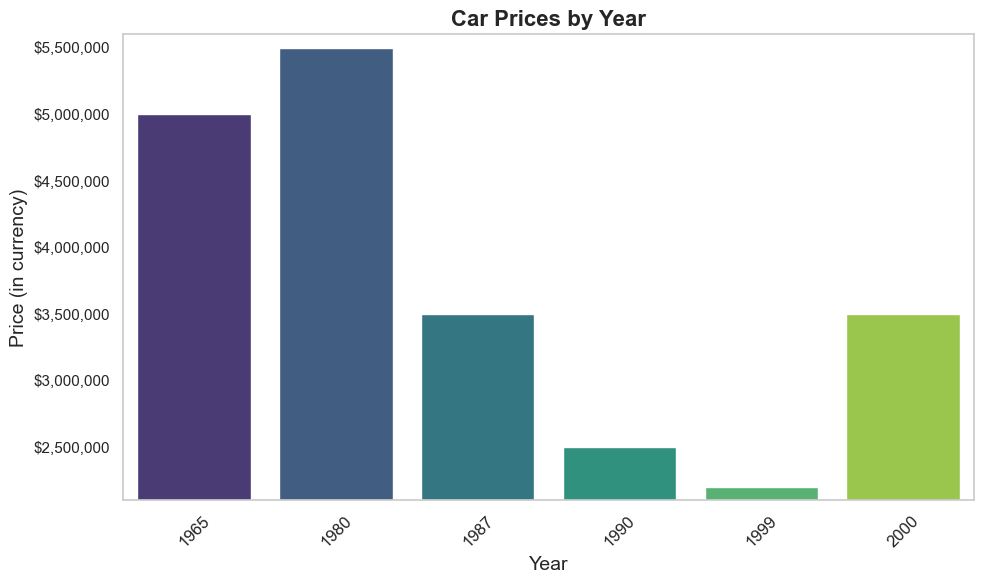

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# Sample data to demonstrate
import pandas as pd
data = {
    'Year': [1990, 1987, 1965, 1999, 2000, 1980],
    'Price': [2500000.00, 3500000.00, 5000000.00, 2200000.00, 3500000.00, 5500000.00]
}
df = pd.DataFrame(data)

# Create a bar plot for Car Prices by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Price', data=df, palette='viridis')

# Add titles and labels
plt.title('Car Prices by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (in currency)', fontsize=14)

# Customize x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Ensure y-axis shows prices with proper formatting
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Adjust y-axis limits to ensure all prices are visible
plt.ylim(df['Price'].min() - 100000, df['Price'].max() + 100000)

# Remove background grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Prices_By_Year.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Interactive Scatter Plot of Car Prices and Year with Model and Manufacturer Details

In [7]:
import pandas as pd
import plotly.express as px

# Updated sample data to include ModelID and ManufacturerID
data = {
    'Year': [1990, 1987, 1965, 1999, 2000, 1980],
    'Price': [2500000.00, 3500000.00, 5000000.00, 2200000.00, 3500000.00, 5500000.00],
    'ModelID': [1001, 1002, 1003, 1004, 1005, 1006],
    'ManufacturerID': [101, 102, 103, 104, 105, 106]
}
df = pd.DataFrame(data)

# Scatter Plot
fig = px.scatter(df, x='Year', y='Price', size='ModelID', color='ManufacturerID',
                 labels={'Year': 'Year of Manufacture', 'Price': 'Car Price', 'ModelID': 'Model ID', 'ManufacturerID': 'Manufacturer ID'},
                 title='Car Prices vs. Year with Model ID as Size')

fig.update_layout(
    title_font=dict(size=24, family='Arial', color='darkblue'),
    yaxis=dict(title='Price', tickformat=".2f"),  # Show Price in two decimal places
    xaxis=dict(title='Year'),
    showlegend=True
)
save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Prices_By_Year_With_ModelId_As_Size.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
fig.show()

<Figure size 640x480 with 0 Axes>

# Query2: Find the car price more than 2500000

In [8]:
# It will fetch the car price more than 2500000
# Updated SQL query to join Cars and Manufacturers tables
query2 = """
SELECT Cars.*, Manufacturers.Name
FROM Cars
JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE Cars.Price > 2500000;
"""

# Execute the query
cursor.execute(query2)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df.head()

CarID  ManufacturerID  ModelID  Year       Price     Name
0      2             102     1002  1987  3500000.00      BMW
1      3             103     1003  1965  5000000.00   Toyota
2      5             105     1005  2000  3500000.00  Hyundai
3      6             106     1006  1980  5500000.00     Fiat

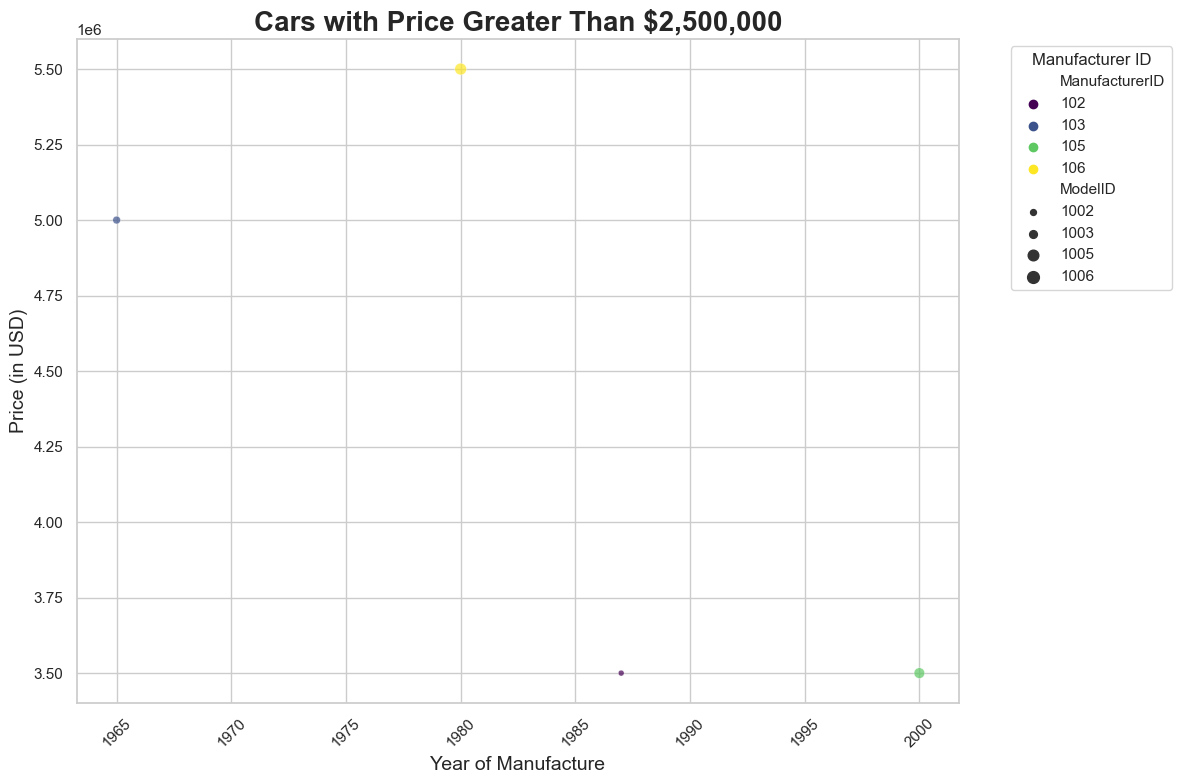

In [9]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df,
    x='Year',              # Replace with the actual column name for the year
    y='Price',             # Replace with the actual column name for the price
    hue='ManufacturerID',  # Color based on Manufacturer ID
    size='ModelID',        # Size based on Model ID
    palette='viridis',
    alpha=0.7
)

# Customize the plot
plt.title('Cars with Price Greater Than $2,500,000', fontsize=20, fontweight='bold')
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)
plt.legend(title='Manufacturer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Prices_gt250000.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
# Show the plot
plt.show()

In [10]:
# Create a bar chart
fig = px.bar(
    df,
    x='ModelID',        # Replace with the actual column name for the model
    y='Price',          # Replace with the actual column name for the price
    color='ManufacturerID',  # Color by manufacturer ID
    title='Price Comparison of Cars Greater Than $2,500,000',
    labels={
        'ModelID': 'Model ID',
        'Price': 'Price (in USD)',
        'ManufacturerID': 'Manufacturer ID'
    }
)

# Customize the layout
fig.update_layout(
    title_font=dict(size=24, family='Arial', color='darkblue'),
    xaxis=dict(title='Model ID'),
    yaxis=dict(title='Price (in USD)'),
    legend_title_text='Manufacturer ID'
)
save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Prices_gt2500000(2).jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
# Show the plot
fig.show()

<Figure size 640x480 with 0 Axes>

### Car Prices By ManufacturerId

In [97]:
# Create a histogram
fig = px.histogram(
    df,
    x='Price',                  # Price for x-axis
    color='ManufacturerID',     # Color by Manufacturer ID
    title='Car Prices by ManufacturerID',
    labels={
        'Price': 'Price (in USD)',
        'ManufacturerID': 'Manufacturer ID'
    }
)

# Customize the layout
fig.update_layout(
    title_font=dict(size=24, family='Arial', color='darkblue'),
    xaxis=dict(title='Price (in USD)'),
    yaxis=dict(title='Count'),
    showlegend=True
)

# Show the plot
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### Price Distribution Of Cars By ManufactureID

In [98]:
import pandas as pd
import plotly.express as px

# Assuming 'df' is already populated with the results from your query
# df = pd.DataFrame(results, columns=columns)  # This was done earlier

# Create a box plot
fig = px.box(
    df,
    x='ManufacturerID',   # Replace with the actual column name for the manufacturer
    y='Price',            # Replace with the actual column name for the price
    points="all",         # Show all points including outliers
    title='Price Distribution of Cars by Manufacturer',
    labels={
        'ManufacturerID': 'Manufacturer ID',
        'Price': 'Price (in USD)'
    }
)

# Customize the layout
fig.update_layout(
    title_font=dict(size=24, family='Arial', color='darkblue'),
    xaxis=dict(title='Manufacturer ID'),
    yaxis=dict(title='Price (in USD)'),
    showlegend=False
)

# Show the plot
fig.show()


### Car Prices VS Year Of Manufacturer

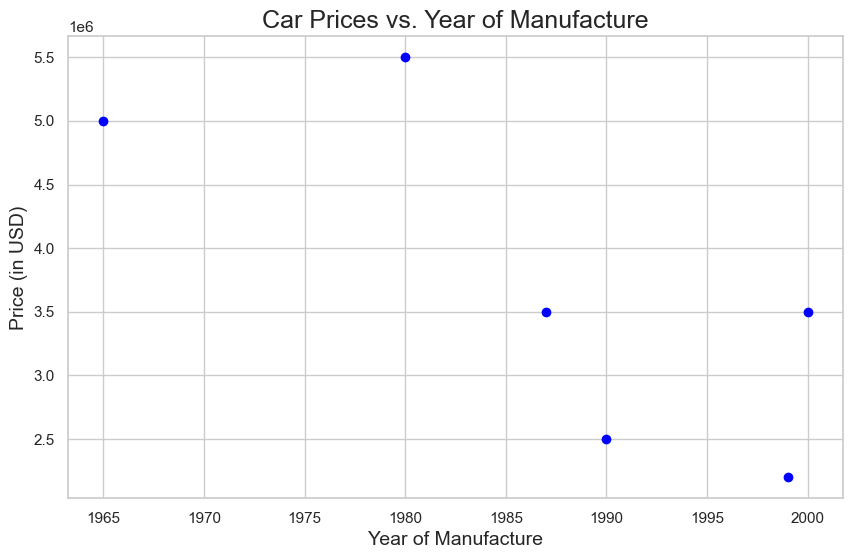

In [50]:
import matplotlib.pyplot as plt

# Assuming 'df' is already populated with the results from your query
# df = pd.DataFrame(results, columns=columns)  # This was done earlier

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'], c='blue', marker='o')

# Add titles and labels
plt.title('Car Prices vs. Year of Manufacture', fontsize=18)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Prices_VS_YearOfManufacturer.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
# Show the plot
plt.grid(True)
plt.show()

### Trend Of Car Prices Over Year

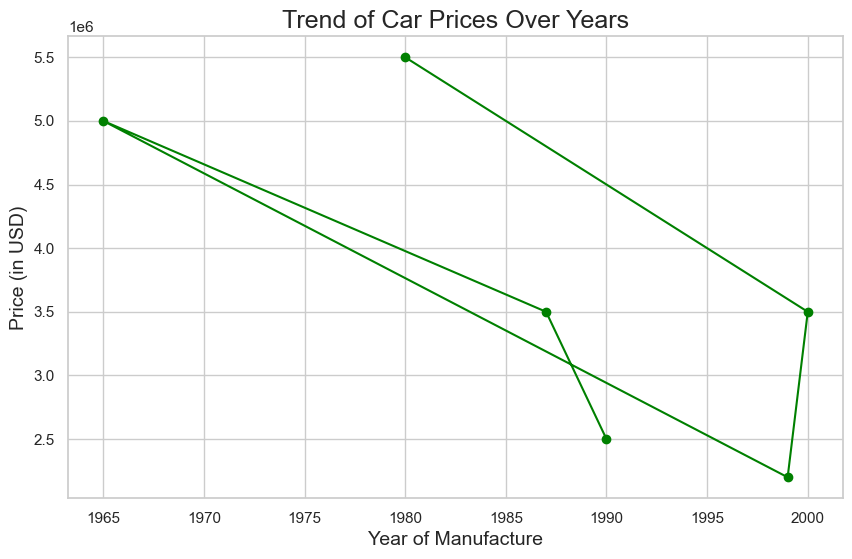

In [51]:
import matplotlib.pyplot as plt

# Assuming 'df' is already populated with the results from your query
# df = pd.DataFrame(results, columns=columns)  # This was done earlier

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Price'], marker='o', linestyle='-', color='green')

# Add titles and labels
plt.title('Trend of Car Prices Over Years', fontsize=18)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Trend_Of_Car_Prices_Over_Year.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
# Show the plot
plt.grid(True)
plt.show()

### Query3 Car Price gt 5000000

In [52]:
# Define the query
query3 = "SELECT * FROM Cars WHERE Price < 5000000;"
cursor.execute(query3)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df.head()

CarID  ManufacturerID  ModelID  Year       Price
0      1             101     1001  1990  2500000.00
1      2             102     1002  1987  3500000.00
2      4             104     1004  1999  2200000.00
3      5             105     1005  2000  3500000.00

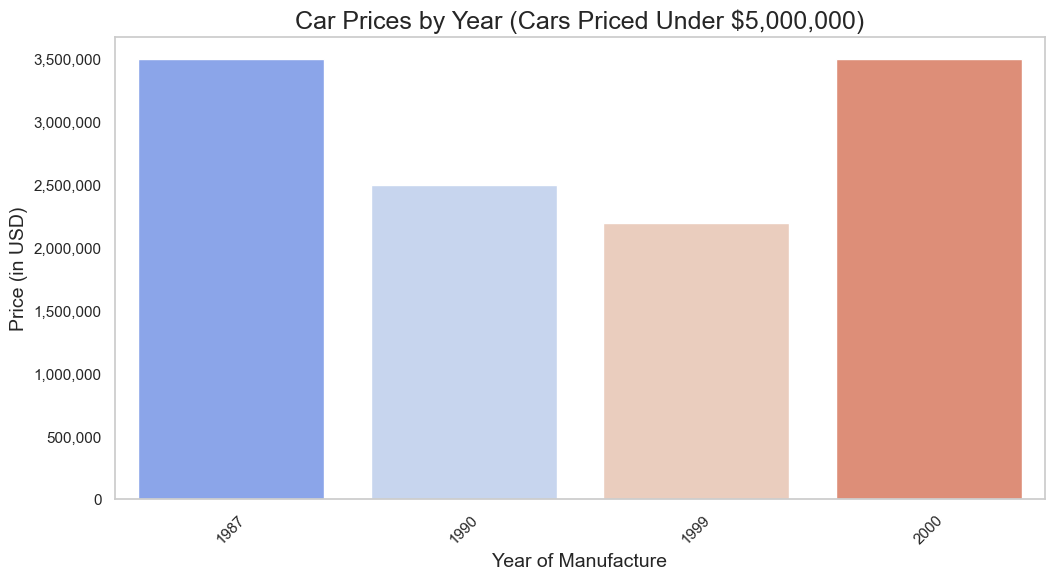

In [54]:
# Create a bar plot for Car Prices by Year for cars priced under $5,000,000
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Price', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Car Prices by Year (Cars Priced Under $5,000,000)', fontsize=18)
plt.xlabel('Year of Manufacture', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.grid(False)  # Remove grid lines

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Prices_Under_5000000_By_Year.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### Query4: Basic Query- Find only 3car sales Limit

In [72]:
# Define the query to fetch only 3 car sales records
query4 = "SELECT * FROM car_sales LIMIT 3;"
cursor.execute(query4)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

SaleID  CarID    SaleDate   SalePrice  CountryID
0     221      1  2024-01-15  1900000.00         11
1     222      2  2024-02-20  2900000.00         12
2     223      3  2024-03-10   430000.00         13

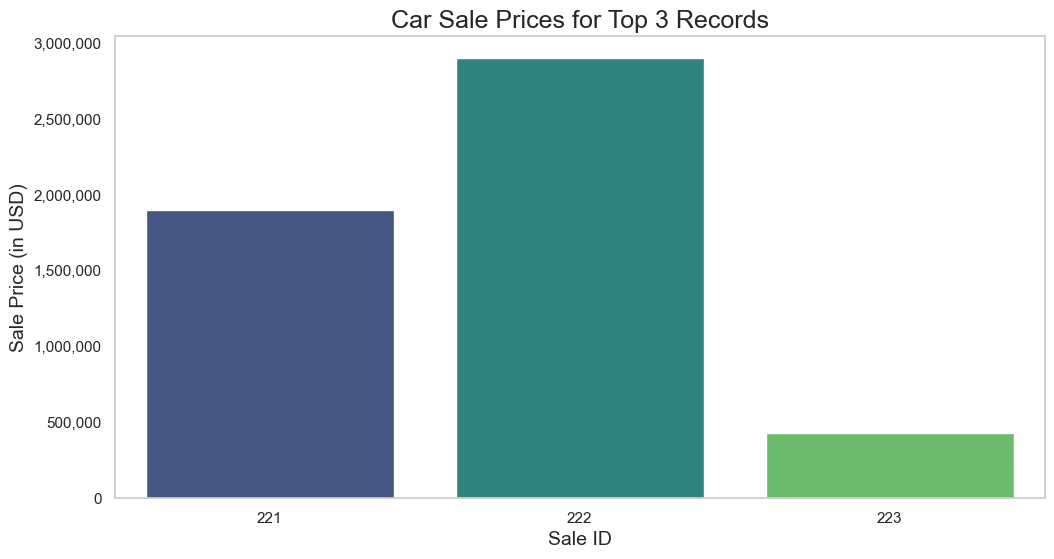

In [73]:
# Create a bar plot for the car sales records
plt.figure(figsize=(12, 6))
sns.barplot(x=df['SaleID'], y=df['SalePrice'], palette='viridis')

# Add titles and labels
plt.title('Car Sale Prices for Top 3 Records', fontsize=18)
plt.xlabel('Sale ID', fontsize=14)
plt.ylabel('Sale Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.grid(False)  # Remove grid lines

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Sale_Prices_Top3_Records.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

###  Define the query to list all car sales, starting with the most expensive sale

In [74]:
query6 = "SELECT * FROM car_sales ORDER BY SalePrice DESC;"
cursor.execute(query6)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df.head()

SaleID  CarID    SaleDate   SalePrice  CountryID
0     225      5  2024-02-15  4300000.00         15
1     222      2  2024-02-20  2900000.00         12
2     221      1  2024-01-15  1900000.00         11
3     224      4  2024-01-25  1700000.00         14
4     223      3  2024-03-10   430000.00         13

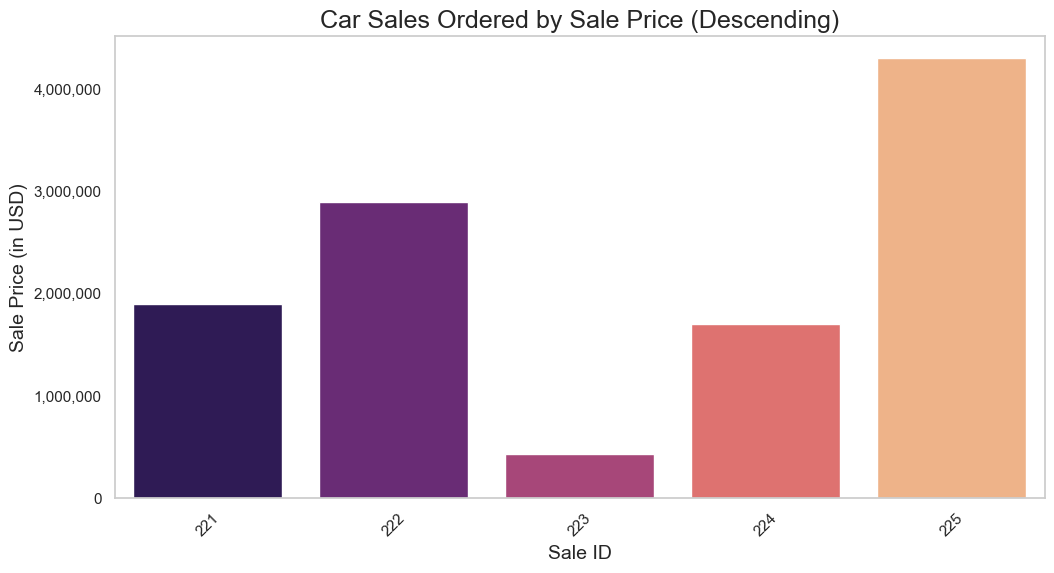

In [75]:
# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='SaleID', y='SalePrice', data=df, palette='magma')

# Add titles and labels
plt.title('Car Sales Ordered by Sale Price (Descending)', fontsize=18)
plt.xlabel('Sale ID', fontsize=14)
plt.ylabel('Sale Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car_Sale_Ordered_By_Sale_Price(Descending.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### Define the query to display all records from the Manufacturers table


In [79]:
query1 = "SELECT * FROM MANUFACTURERS;"
cursor.execute(query1)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ManufacturerID     Name      Country
0             101     Audi      Germany
1             102      BMW      Germany
2             103   Toyota        Japan
3             104     Ford          USA
4             105  Hyundai  South Korea
5             106     Fiat        Italy

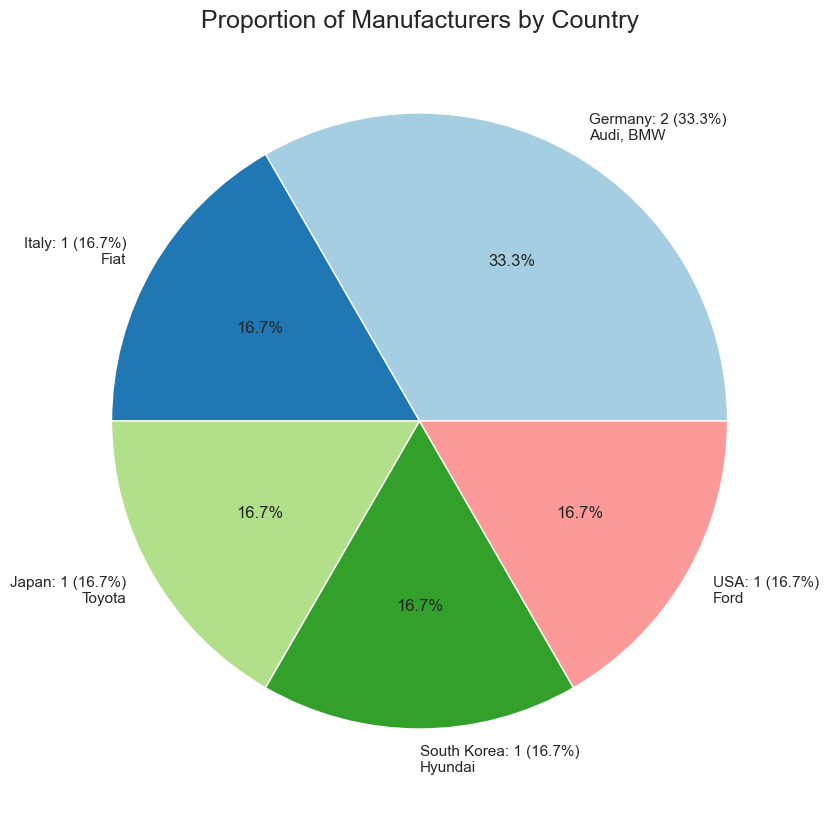

In [80]:
import matplotlib.pyplot as plt

# Group by country and count the number of manufacturers
country_counts = df.groupby('Country')['ManufacturerID'].count()

# Create custom labels combining manufacturer names, car names, and percentages
labels = [f'{country}: {count} ({percentage:.1f}%)\n{", ".join(df[df["Country"] == country]["Name"])}' 
          for country, count, percentage in zip(country_counts.index, country_counts.values, country_counts / country_counts.sum() * 100)]

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(country_counts))))

# Add title
plt.title('Proportion of Manufacturers by Country', fontsize=18)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Proportion of Manufacturers by Country.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

###  Define the query to display all records from the Manufacturers table


In [81]:
query7 = "SELECT Name,Country FROM MANUFACTURERS;"
cursor.execute(query7)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

Name      Country
0     Audi      Germany
1      BMW      Germany
2   Toyota        Japan
3     Ford          USA
4  Hyundai  South Korea
5     Fiat        Italy

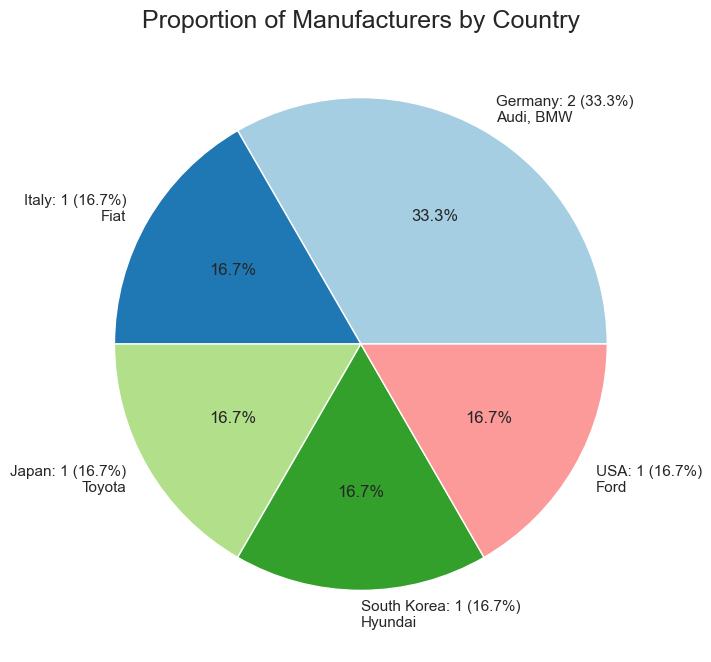

In [82]:
# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(country_counts))))

# Add title
plt.title('Proportion of Manufacturers by Country', fontsize=18)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Proportion of Manufacturers by Countryy.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
# Show the plot
plt.show()

### -- 3)Retrieve the ModelID and ModelName from the Models table


In [83]:
# Define the query to display all records from the Manufacturers table
query8 = "SELECT ModelID, ModelName FROM Models;"
cursor.execute(query8)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ModelID ModelName
0     1001        Q5
1     1002        X5
2     1003   Corolla
3     1004   Mustang
4     1005     Verna
5     1006      CR-V

In [84]:
import pandas as pd

# Define the query to display all records from the Models table
query8 = "SELECT ModelID, ModelName FROM Models;"
cursor.execute(query8)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Drop extra columns if they exist (in this case, columns with numeric names)
df = df.loc[:, ~df.columns.str.match(r'^\d+$')]

# Display the DataFrame
df


ModelID ModelName
0     1001        Q5
1     1002        X5
2     1003   Corolla
3     1004   Mustang
4     1005     Verna
5     1006      CR-V

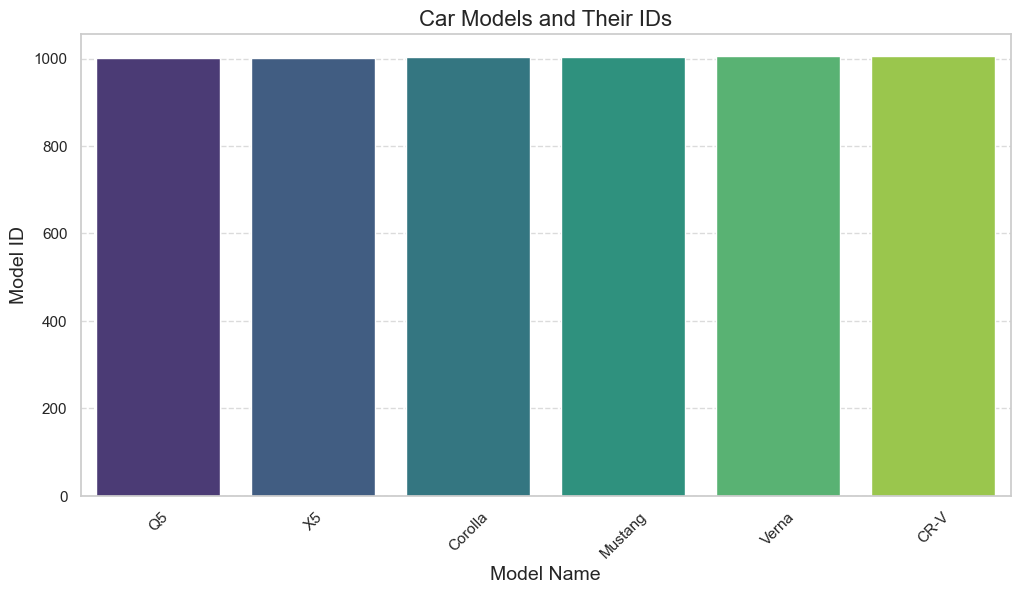

In [85]:
# Plot the graph without displaying the index
plt.figure(figsize=(12, 6))

# Create a bar plot of ModelName versus ModelID
sns.barplot(x='ModelName', y='ModelID', data=df, palette='viridis')

# Add titles and labels
plt.title('Car Models and Their IDs', fontsize=16)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Model ID', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better visibility

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'CarModels and Their IDS.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

###  Define the query to display all records from the Models table Where Year gt 1995


In [87]:
import pandas as pd

# Define the query to display all records from the Models table
query9 = "SELECT * FROM Cars WHERE Year > 1995;"
cursor.execute(query9)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Drop extra columns if they exist (in this case, columns with numeric names)
df = df.loc[:, ~df.columns.str.match(r'^\d+$')]

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      4             104     1004  1999  2200000.00
1      5             105     1005  2000  3500000.00

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_13240\3261435816.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




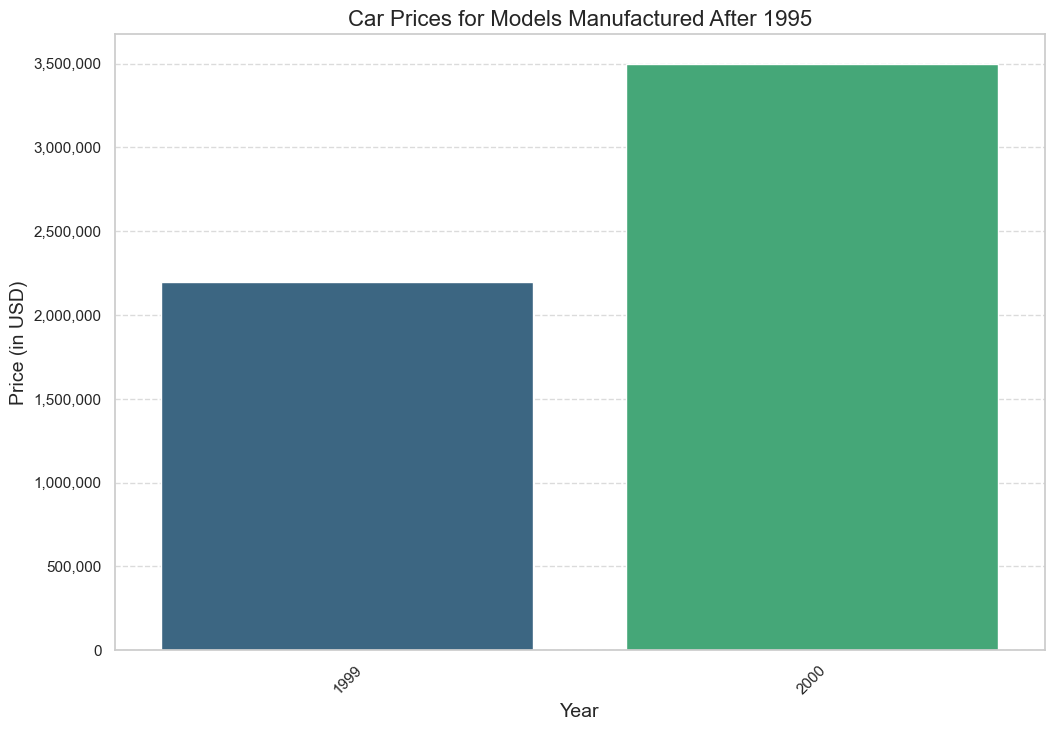

In [88]:
# Plot a bar chart of Car Models and their Prices
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Price', data=df, palette='viridis', ci=None)

# Add titles and labels
plt.title('Car Prices for Models Manufactured After 1995', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better visibility
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Prices for Models Manufactuered after 1995.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Query10)Display all car models where car price gt 3000000.


In [89]:
# Define the query to display all records from the Models table
query10 = "SELECT * FROM Cars WHERE Price > 3000000;"
cursor.execute(query10)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Drop extra columns if they exist (in this case, columns with numeric names)
df = df.loc[:, ~df.columns.str.match(r'^\d+$')]

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      2             102     1002  1987  3500000.00
1      3             103     1003  1965  5000000.00
2      5             105     1005  2000  3500000.00
3      6             106     1006  1980  5500000.00

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_13240\1810467233.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




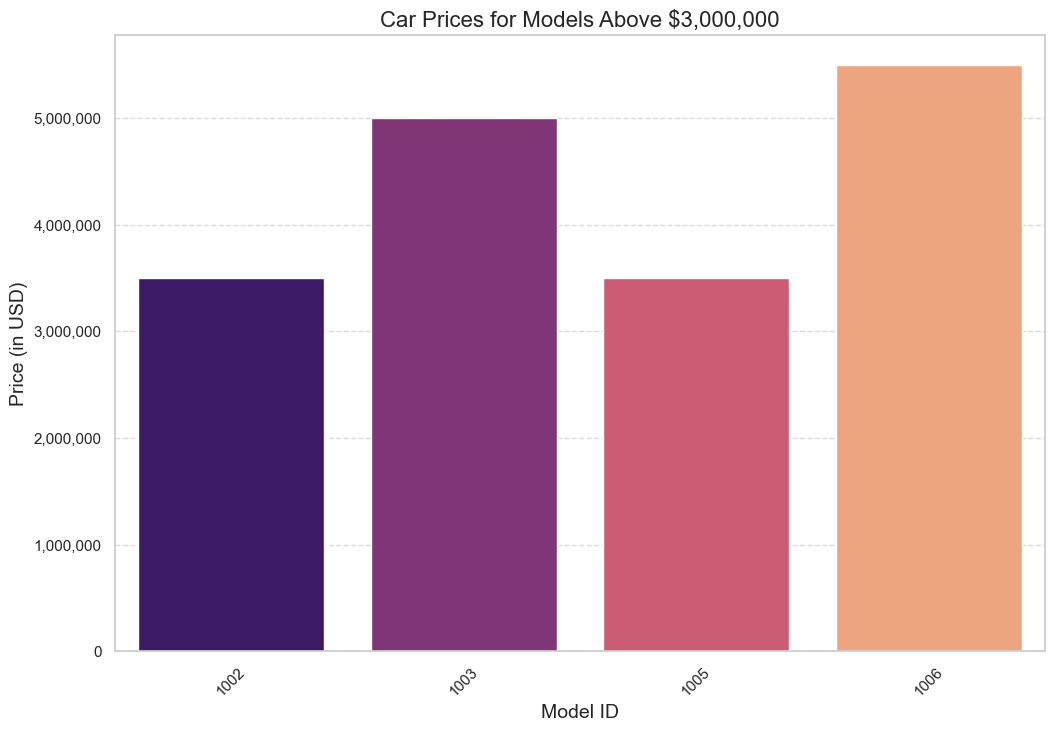

In [90]:
# Plot a bar chart of Car Models and their Prices
plt.figure(figsize=(12, 8))
sns.barplot(x='ModelID', y='Price', data=df, palette='magma', ci=None)

# Add titles and labels
plt.title('Car Prices for Models Above $3,000,000', fontsize=16)
plt.xlabel('Model ID', fontsize=14)
plt.ylabel('Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid lines for better visibility
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Prices for model gt 3000000.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### Define the query to count the number of manufacturers


In [91]:
query12 = "SELECT COUNT(*) FROM Manufacturers;"
cursor.execute(query12)

# Fetch the result
result = cursor.fetchone()

# Display the count
manufacturer_count = result[0]
print(f"Total number of manufacturers: {manufacturer_count}")

Total number of manufacturers: 6


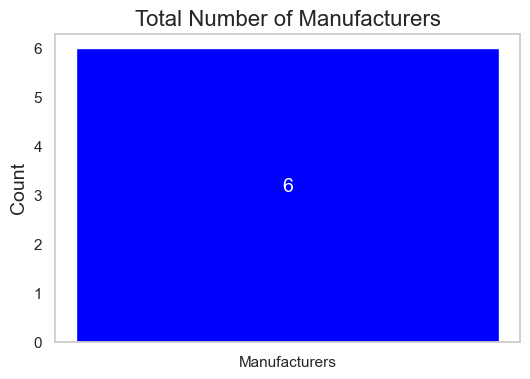

In [92]:
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Manufacturers'], [manufacturer_count], color='blue')

# Add title and labels
plt.title('Total Number of Manufacturers', fontsize=16)
plt.ylabel('Count', fontsize=14)

# Display the count on top of the bar
plt.text(0, manufacturer_count / 2, str(manufacturer_count), ha='center', va='bottom', fontsize=14, color='white')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Total Number Of Manufacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### Define the query to find the maximum price of all cars


In [93]:
query13 = "SELECT MAX(Price) FROM Cars;"
cursor.execute(query13)

# Fetch the result
result = cursor.fetchone()

# Extract the maximum price
max_price = result[0]

In [94]:
max_price

Decimal('5500000.00')

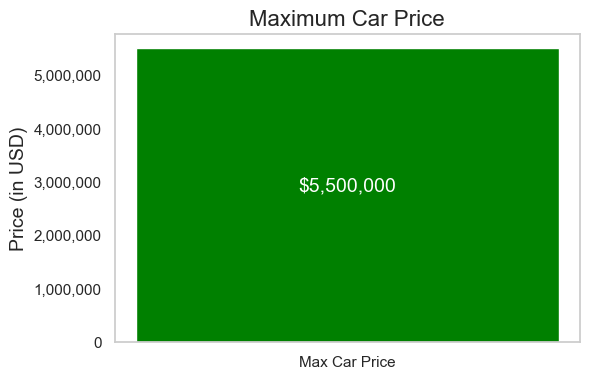

In [95]:
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Max Car Price'], [max_price], color='green')

# Add title and labels
plt.title('Maximum Car Price', fontsize=16)
plt.ylabel('Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the price on top of the bar
plt.text(0, max_price / 2, f'${int(max_price):,}', ha='center', va='bottom', fontsize=14, color='white')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Maximumcarprice.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### Query13)Car Prices By Manufaturer and Models.


In [96]:
query = """
SELECT 
    Manufacturers.Name AS ManufacturerName,
    Models.ModelName AS ModelName,
    Cars.Price AS Price
FROM 
    Cars
JOIN 
    Models ON Cars.ModelID = Models.ModelID
JOIN 
    Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID;
"""
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ManufacturerName ModelName       Price
0             Audi        Q5  2500000.00
1              BMW        X5  3500000.00
2           Toyota   Corolla  5000000.00
3             Ford   Mustang  2200000.00
4          Hyundai     Verna  3500000.00
5             Fiat      CR-V  5500000.00

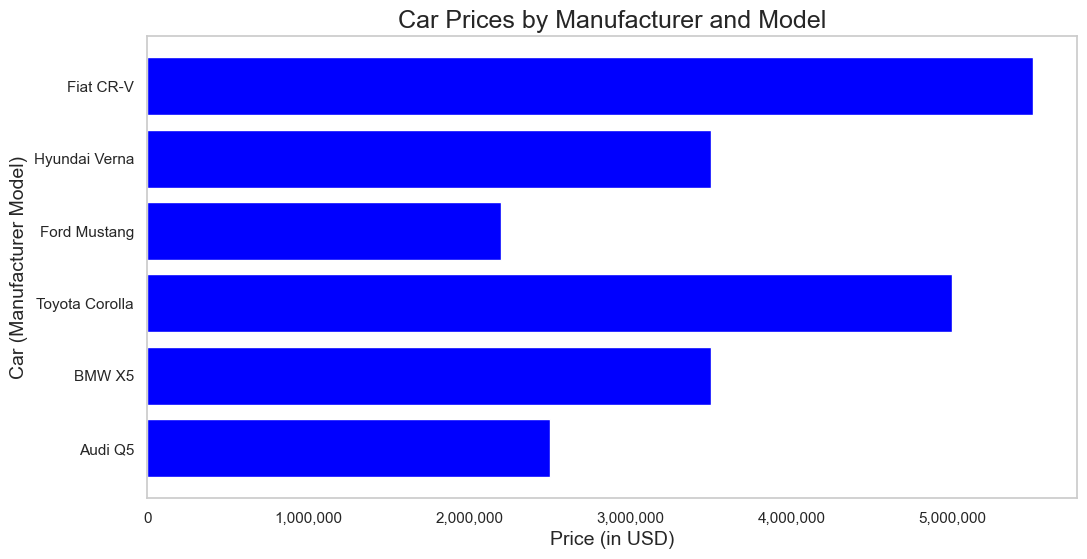

In [97]:
# Plotting the graph
plt.figure(figsize=(12, 6))
plt.barh(df['ManufacturerName'] + ' ' + df['ModelName'], df['Price'], color='Blue')

# Add titles and labels
plt.title('Car Prices by Manufacturer and Model', fontsize=18)
plt.xlabel('Price (in USD)', fontsize=14)
plt.ylabel('Car (Manufacturer Model)', fontsize=14)

# Set the x-axis tick labels to display the full price values
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Prices By Manufacturer and Model.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### 14)Define the query to find the Minimum price of all cars


In [98]:
query14 = "SELECT MIN(Price) FROM Cars;"
cursor.execute(query13)

# Fetch the result
result = cursor.fetchone()

# Extract the maximum price
min_price = result[0]
min_price

Decimal('5500000.00')

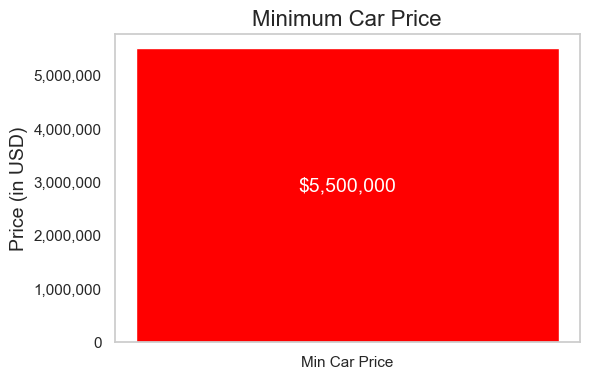

In [99]:
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Min Car Price'], [max_price], color='red')

# Add title and labels
plt.title('Minimum Car Price', fontsize=16)
plt.ylabel('Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the price on top of the bar
plt.text(0, min_price / 2, f'${int(min_price):,}', ha='center', va='bottom', fontsize=14, color='white')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Minimum Car Price.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### query15) Define the query to fetch distinct countries from the Countries table


In [100]:
import pandas as pd

query15= "SELECT DISTINCT(CountryName) FROM Countries;"
cursor.execute(query15)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CountryName
0      Germany
1        Japan
2          USA
3  South Korea
4        Italy

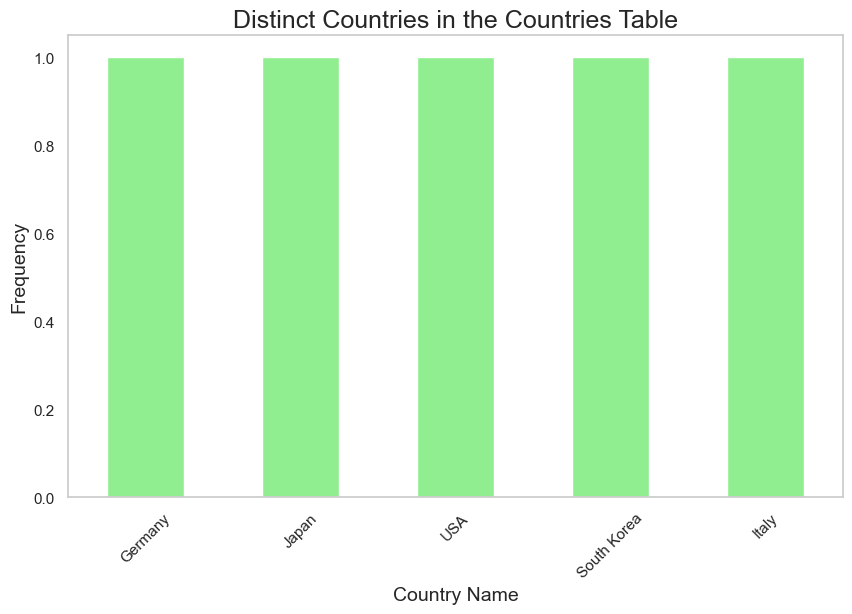

In [101]:
# Count the number of distinct countries
country_counts = df['CountryName'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='lightgreen')

# Add titles and labels
plt.title('Distinct Countries in the Countries Table', fontsize=18)
plt.xlabel('Country Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Distinct Countryy.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### Define the query to find all car models that start with the letter 'C'

In [102]:
query = "SELECT * FROM Models WHERE ModelName LIKE 'C%';"
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ModelID ModelName
0     1003   Corolla
1     1006      CR-V

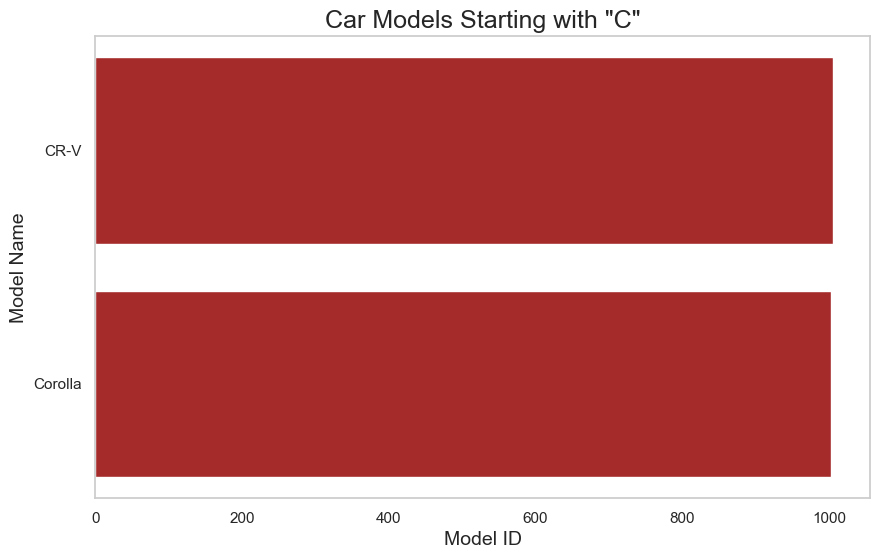

In [103]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(df['ModelName'], df['ModelID'], color='brown')

# Add titles and labels
plt.title('Car Models Starting with "C"', fontsize=18)
plt.xlabel('Model ID', fontsize=14)
plt.ylabel('Model Name', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Models Starting with C.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

### Query16) Car Sales Between '2024-01-01' AND '2024-12-31'

In [104]:
query16 = "SELECT * FROM  Car_Sales WHERE SaleDate BETWEEN '2024-01-01' AND '2024-12-31';"
cursor.execute(query16)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

SaleID  CarID    SaleDate   SalePrice  CountryID
0     221      1  2024-01-15  1900000.00         11
1     222      2  2024-02-20  2900000.00         12
2     223      3  2024-03-10   430000.00         13
3     224      4  2024-01-25  1700000.00         14
4     225      5  2024-02-15  4300000.00         15

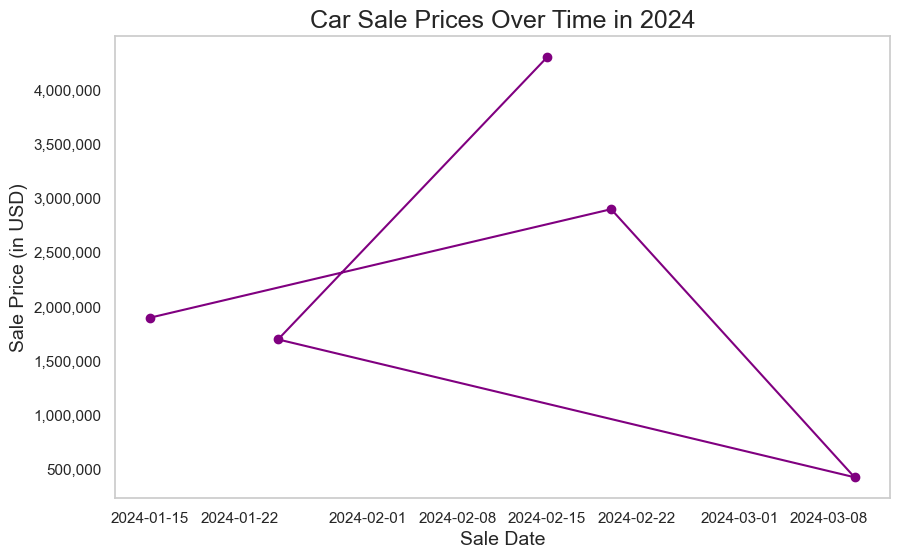

In [105]:
# Plotting the SalePrice over time
plt.figure(figsize=(10, 6))
plt.plot(df['SaleDate'], df['SalePrice'], marker='o', color='purple')

# Add titles and labels
plt.title('Car Sale Prices Over Time in 2024', fontsize=18)
plt.xlabel('Sale Date', fontsize=14)
plt.ylabel('Sale Price (in USD)', fontsize=14)

# Format y-axis to show full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car SAle Prices Over time in 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(False)  # Remove grid lines
plt.show()

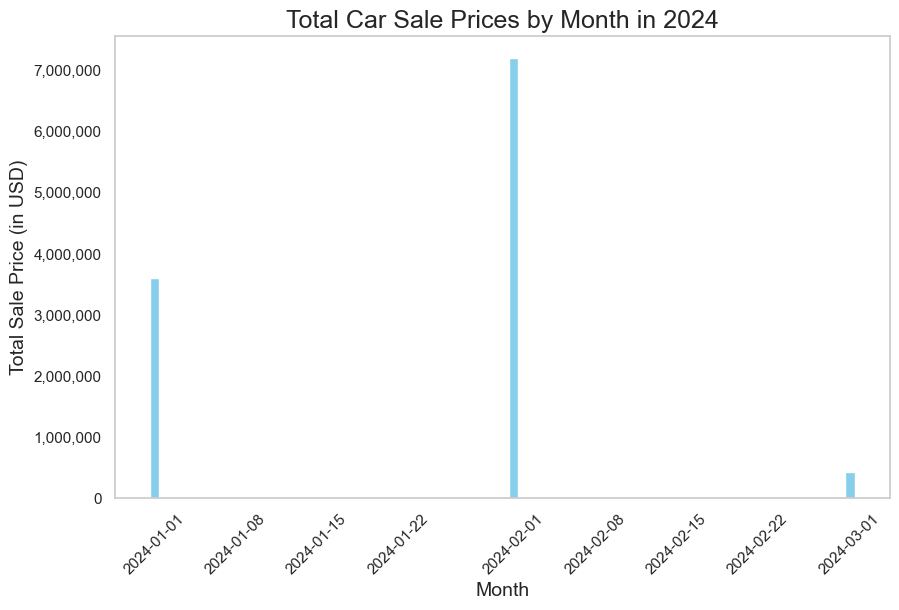

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that SaleDate is in datetime format
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract the month from the SaleDate
df['Month'] = df['SaleDate'].dt.to_period('M')

# Group by month and sum the SalePrice
monthly_sales = df.groupby('Month')['SalePrice'].sum().reset_index()

# Convert 'Month' back to a datetime format for proper plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plotting the total sales per month
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['SalePrice'], color='skyblue')

# Add titles and labels
plt.title('Total Car Sale Prices by Month in 2024', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sale Price (in USD)', fontsize=14)

# Format y-axis to show full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Remove grid lines
plt.grid(False)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Total Car Sale Prices by month In 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()


### -- 17) Count the number of car models by each manufacturer.

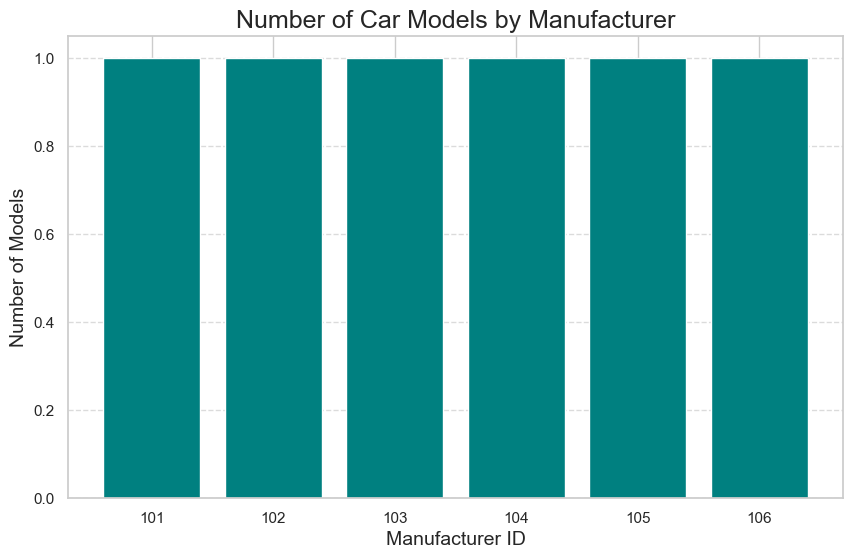

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the query to count the number of car models by each manufacturer
query17 = "SELECT ManufacturerID, COUNT(*) AS ModelCount FROM Cars GROUP BY ManufacturerID;"
cursor.execute(query17)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

# Plotting the number of car models by each manufacturer
plt.figure(figsize=(10, 6))
plt.bar(df['ManufacturerID'].astype(str), df['ModelCount'], color='teal')

# Add titles and labels
plt.title('Number of Car Models by Manufacturer', fontsize=18)
plt.xlabel('Manufacturer ID', fontsize=14)
plt.ylabel('Number of Models', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Number Of Car Models By Manufacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### 17)Total Revenue from Car Sales

In [109]:

query17 = "SELECT SUM(SalePrice) FROM Car_Sales;"
cursor.execute(query17)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

SUM(SalePrice)
0    11230000.00

### 18) Countries Excluding Germany

In [110]:
query18 = "SELECT * FROM Countries WHERE CountryName = 'Germany';"
cursor.execute(query18)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CountryID CountryName
0         11     Germany
1         12     Germany

### 19) First Three Entries from Manufacturers Table

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the query to retrieve the first 3 manufacturers
query19 = "SELECT * FROM Manufacturers LIMIT 3;"
cursor.execute(query19)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ManufacturerID    Name  Country
0             101    Audi  Germany
1             102     BMW  Germany
2             103  Toyota    Japan

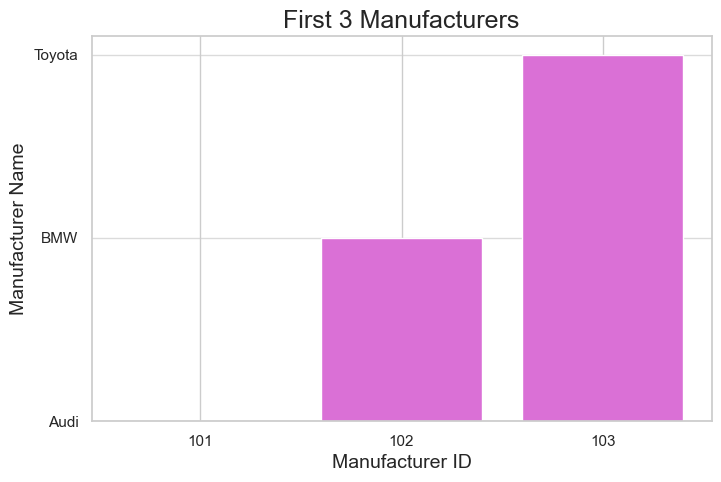

In [114]:
# Plotting the manufacturers (e.g., bar plot showing ManufacturerID vs. Name)
plt.figure(figsize=(8, 5))
plt.bar(df['ManufacturerID'].astype(str), df['Name'], color='orchid')

# Add titles and labels
plt.title('First 3 Manufacturers', fontsize=18)
plt.xlabel('Manufacturer ID', fontsize=14)
plt.ylabel('Manufacturer Name', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'First 3 Manufacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y',  alpha=0.7)
plt.show()

### Manufacturers Listed Alphabetically

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the query to display all manufacturers in alphabetical order
query20 = "SELECT * FROM Manufacturers ORDER BY Name ASC;"
cursor.execute(query20)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ManufacturerID     Name      Country
0             101     Audi      Germany
1             102      BMW      Germany
2             106     Fiat        Italy
3             104     Ford          USA
4             105  Hyundai  South Korea
5             103   Toyota        Japan

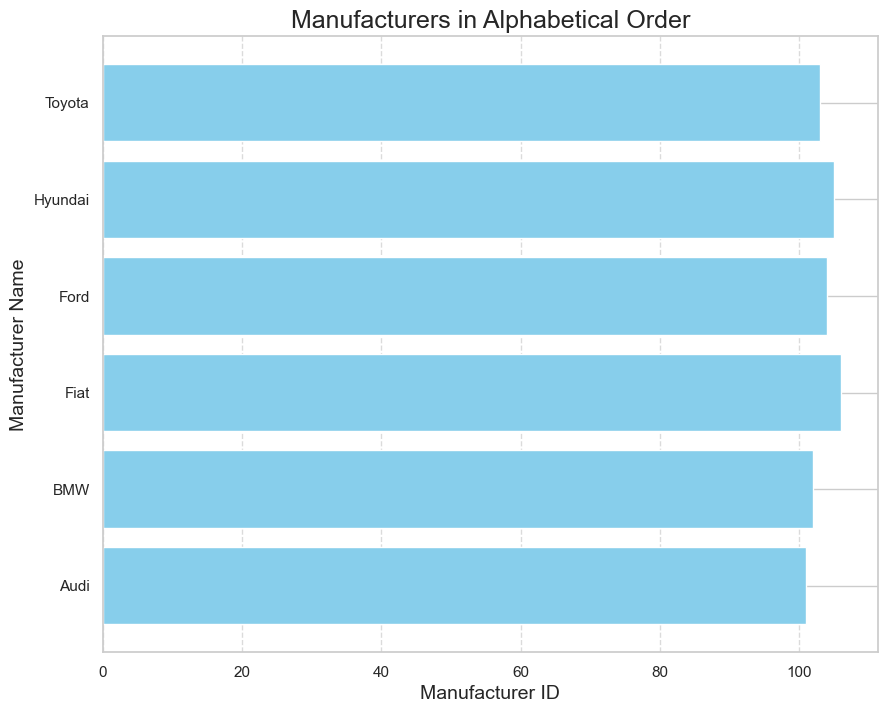

In [116]:
# Plotting the manufacturers (e.g., a horizontal bar plot showing Name vs. ManufacturerID)
plt.figure(figsize=(10, 8))
plt.barh(df['Name'], df['ManufacturerID'], color='skyblue')

# Add titles and labels
plt.title('Manufacturers in Alphabetical Order', fontsize=18)
plt.xlabel('Manufacturer ID', fontsize=14)
plt.ylabel('Manufacturer Name', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Manufacturers in Alphabatic Order.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
# Show the plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

### Average Car Price Rounded to Two Decimal Places

In [117]:
# Define the query to find the average price of cars rounded to 2 decimal places
query21 = "SELECT ROUND(AVG(Price), 2) AS AvgPrice FROM Cars;"
cursor.execute(query21)

# Fetch the result
result = cursor.fetchone()

# Convert the result into a DataFrame
df = pd.DataFrame([result], columns=['AvgPrice'])

# Display the DataFrame
df

AvgPrice
0  3700000.00

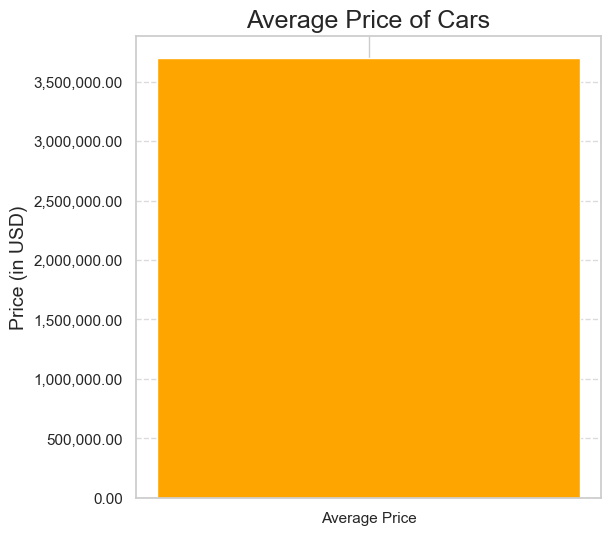

In [118]:
# Plotting the average price (e.g., a bar plot)
plt.figure(figsize=(6, 6))
plt.bar('Average Price', df['AvgPrice'], color='Orange')

# Add titles and labels
plt.title('Average Price of Cars', fontsize=18)
plt.ylabel('Price (in USD)', fontsize=14)

# Set the y-axis tick labels to display the full price values
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Avg Price Of Cars.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Retrieve Car Models with the letter 'a' in their name

In [132]:
# Define the query to retrieve car models with the letter 'a' in their name
query22 = "SELECT * FROM Models WHERE ModelName LIKE '%a%';"
cursor.execute(query22)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Get column names from the cursor description
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ModelID ModelName
0     1003   Corolla
1     1004   Mustang
2     1005     Verna

Index(['ModelID', 'ModelName'], dtype='object')


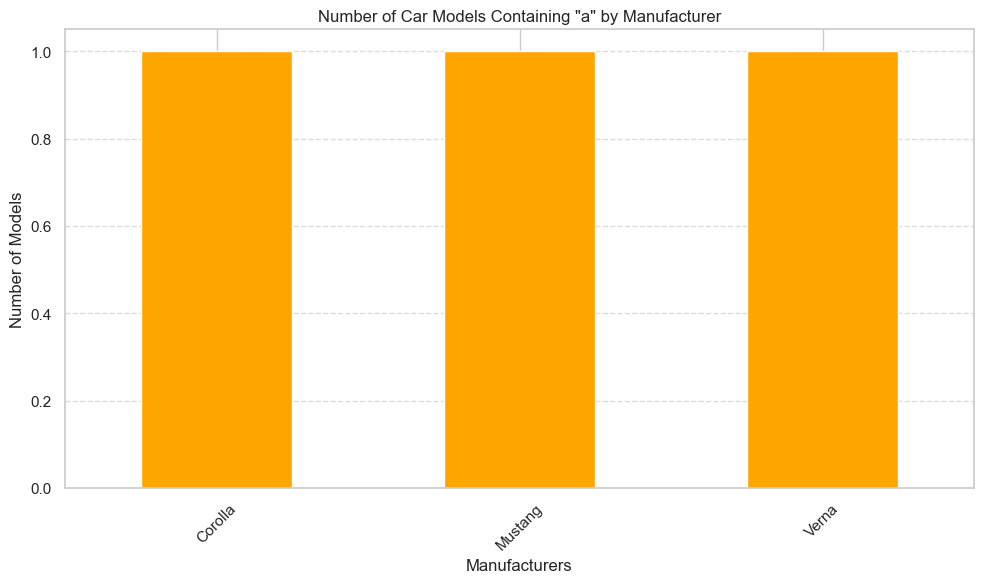

In [136]:
import matplotlib.pyplot as plt

# Check the actual column names
print(df.columns)

# Assuming the correct column name is 'Manufacturer'
model_counts = df['ModelName'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar', color='Orange')
plt.title('Number of Car Models Containing "a" by Manufacturer')
plt.xlabel('Manufacturers')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Number Of Car Models Containing a by Manufacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()


### 23)Number of Cars per Model

In [138]:
# Execute the SQL query to count the number of cars for each model
query23 = "SELECT ModelID, COUNT(*) AS CarCount FROM Cars GROUP BY ModelID;"
cursor.execute(query23)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ModelID  CarCount
0     1001         1
1     1002         1
2     1003         1
3     1004         1
4     1005         1
5     1006         1

###  Define the query to count the number of cars for each model and include the ModelName

In [139]:
query24 = """
SELECT m.ModelID, m.ModelName, COUNT(*) AS CarCount
FROM Cars c
JOIN Models m ON c.ModelID = m.ModelID
GROUP BY m.ModelID, m.ModelName;
"""

# Execute the SQL query
cursor.execute(query24)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ModelID ModelName  CarCount
0     1001        Q5         1
1     1002        X5         1
2     1003   Corolla         1
3     1004   Mustang         1
4     1005     Verna         1
5     1006      CR-V         1

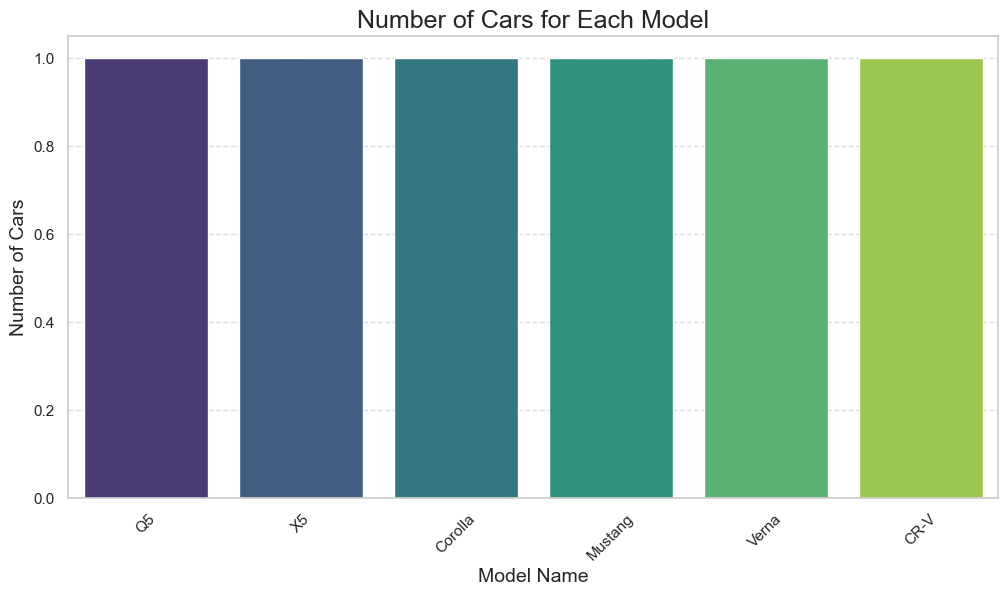

In [140]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='ModelName', y='CarCount', data=df, palette='viridis')

# Add titles and labels
plt.title('Number of Cars for Each Model', fontsize=18)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'NUmber Of Cars for Each Model.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')


# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### Define the SQL query to join Cars and Models tables and get the maximum year for each manufacturer

In [141]:

query25= """
SELECT c.ManufacturerID, m.ModelName, MAX(c.Year) AS LatestYear
FROM Cars c
JOIN Models m ON c.ModelID = m.ModelID
GROUP BY c.ManufacturerID, m.ModelName;
"""

# Execute the SQL query
cursor.execute(query25)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

ManufacturerID ModelName  LatestYear
0             101        Q5        1990
1             102        X5        1987
2             103   Corolla        1965
3             104   Mustang        1999
4             105     Verna        2000
5             106      CR-V        1980

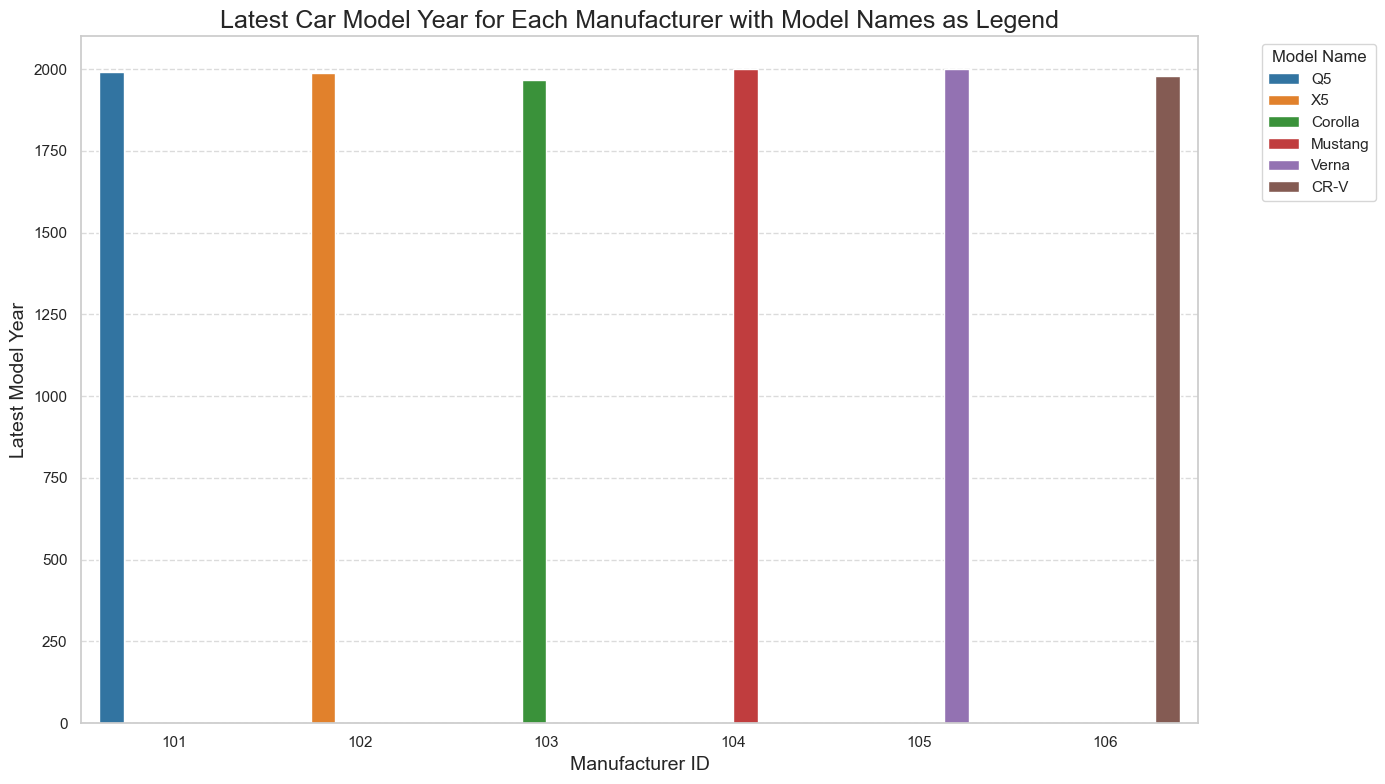

In [142]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Create a bar plot
bar_plot = sns.barplot(x='ManufacturerID', y='LatestYear', hue='ModelName', data=df, palette='tab10')

# Add titles and labels
plt.title('Latest Car Model Year for Each Manufacturer with Model Names as Legend', fontsize=18)
plt.xlabel('Manufacturer ID', fontsize=14)
plt.ylabel('Latest Model Year', fontsize=14)

# Show legend
plt.legend(title='Model Name', bbox_to_anchor=(1.05, 1), loc='upper left')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Latest Car model(Year).jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot with grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Define the SQL query to get cars within the specified price range

In [144]:
query26 = """
SELECT * FROM Cars
WHERE Price BETWEEN 2000000 AND 5000000;
"""

# Execute the SQL query
cursor.execute(query26)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      1             101     1001  1990  2500000.00
1      2             102     1002  1987  3500000.00
2      3             103     1003  1965  5000000.00
3      4             104     1004  1999  2200000.00
4      5             105     1005  2000  3500000.00

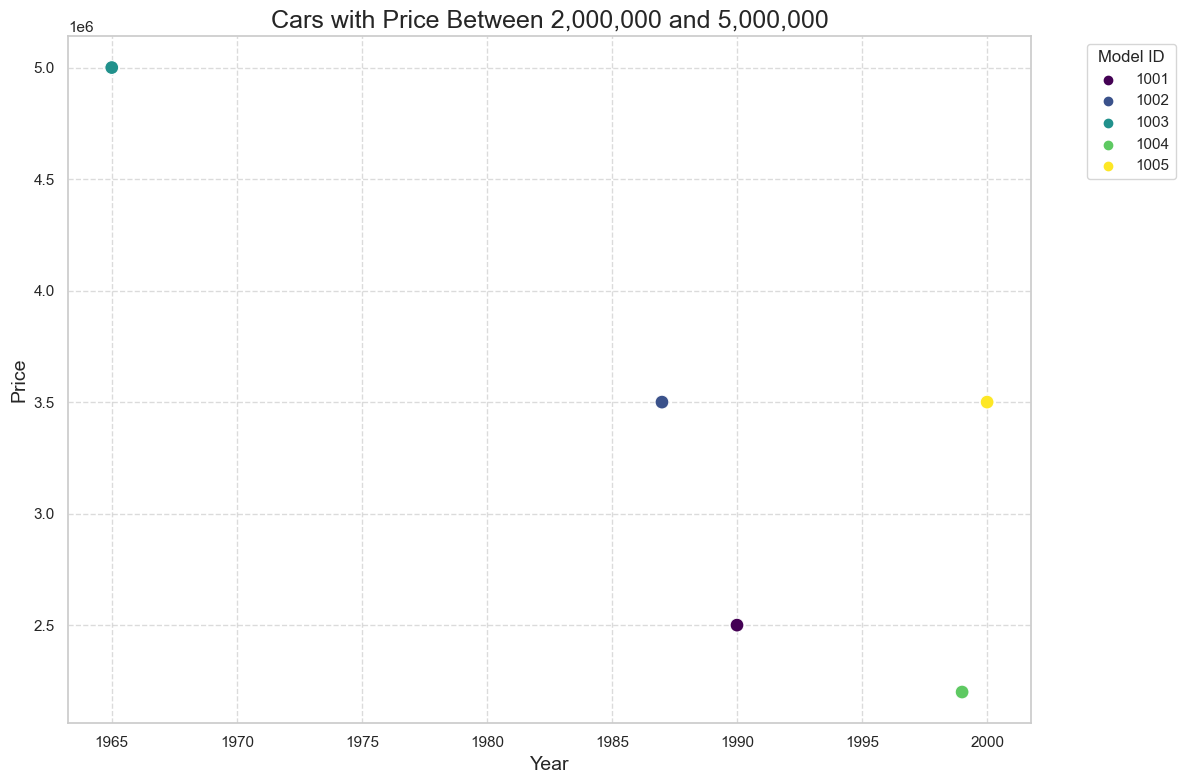

In [145]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Scatter plot to show Price vs Year with ModelID as hue
scatter_plot = sns.scatterplot(data=df, x='Year', y='Price', hue='ModelID', palette='viridis', s=100, edgecolor='w')

# Add titles and labels
plt.title('Cars with Price Between 2,000,000 and 5,000,000', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Show legend
plt.legend(title='Model ID', bbox_to_anchor=(1.05, 1), loc='upper left')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Price Between.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [205]:
# Define the SQL query
query = """
SELECT * FROM Cars
WHERE Price BETWEEN 2000000 AND 5000000;
"""

# Execute the SQL query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      1             101     1001  1990  2500000.00
1      2             102     1002  1987  3500000.00
2      3             103     1003  1965  5000000.00
3      4             104     1004  1999  2200000.00
4      5             105     1005  2000  3500000.00

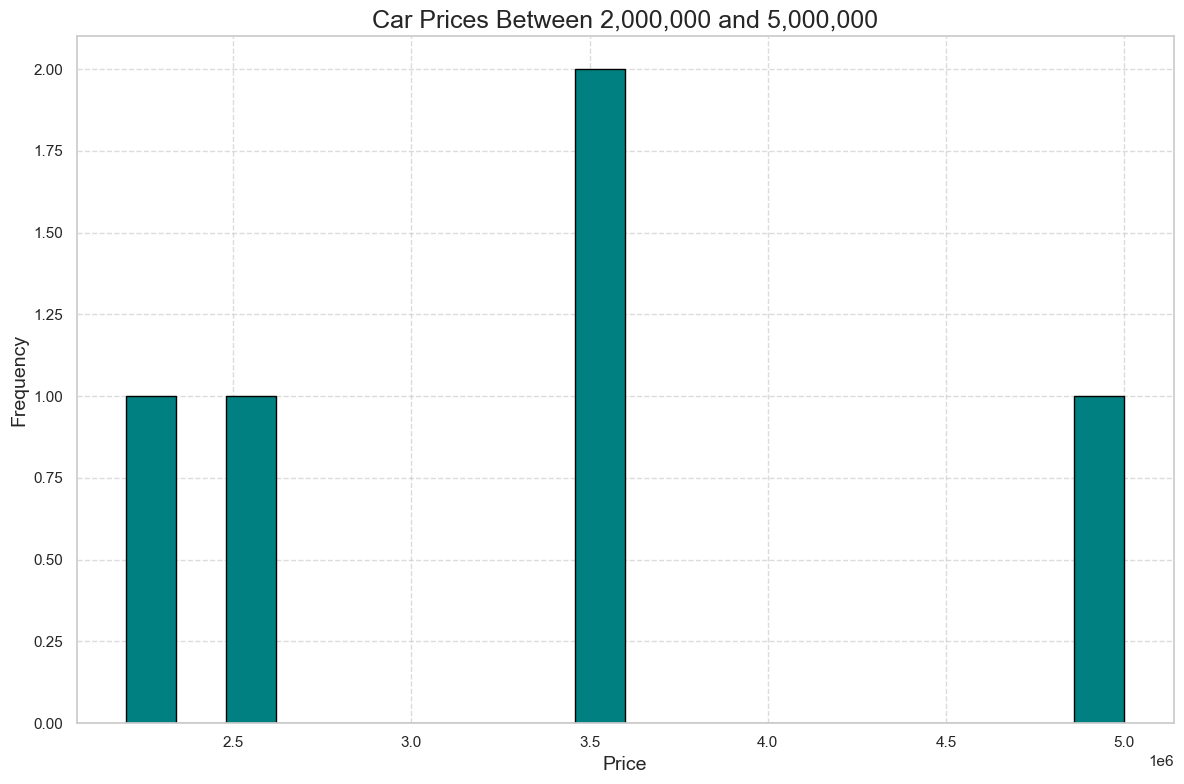

In [207]:
plt.figure(figsize=(12, 8))
plt.hist(df['Price'], bins=20, color='teal', edgecolor='black')

# Add titles and labels
plt.title('Car Prices Between 2,000,000 and 5,000,000', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Car prices B/W 2000000 AND 5000000

In [149]:
query27 = """
SELECT Cars.*, Manufacturers.Name AS ManufacturerName
FROM Cars
JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE Price BETWEEN 2000000 AND 5000000;
"""
# Execute the SQL query
cursor.execute(query27)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price ManufacturerName
0      1             101     1001  1990  2500000.00             Audi
1      2             102     1002  1987  3500000.00              BMW
2      3             103     1003  1965  5000000.00           Toyota
3      4             104     1004  1999  2200000.00             Ford
4      5             105     1005  2000  3500000.00          Hyundai

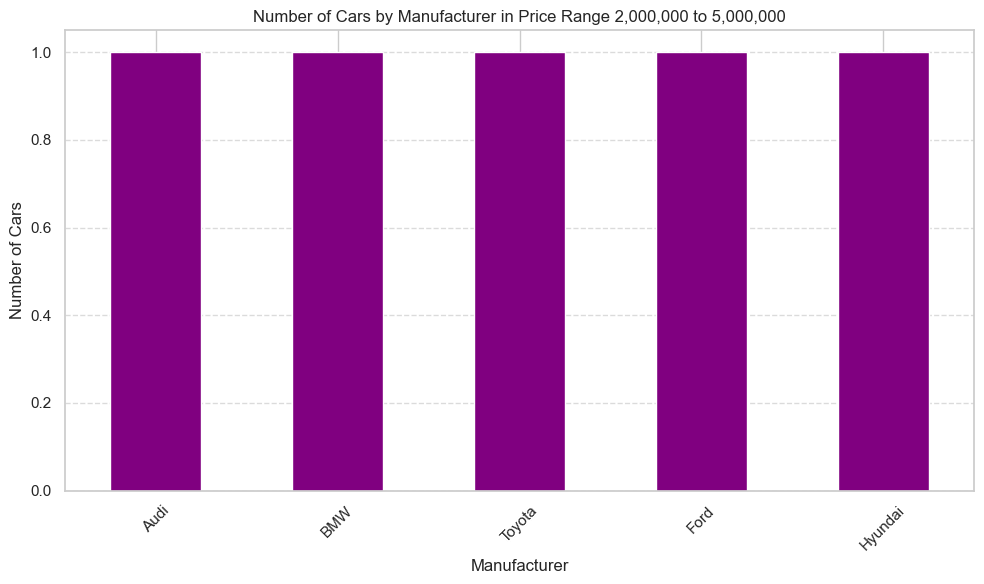

In [150]:
# Create a bar plot
plt.figure(figsize=(10, 6))
car_counts.plot(kind='bar', color='purple')
plt.title('Number of Cars by Manufacturer in Price Range 2,000,000 to 5,000,000')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Define the SQL query Model in Between 1001,1004

In [151]:

query28 = """
SELECT * FROM Cars
WHERE ModelID IN (1001, 1004);
"""

# Execute the SQL query
cursor.execute(query28)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      1             101     1001  1990  2500000.00
1      4             104     1004  1999  2200000.00

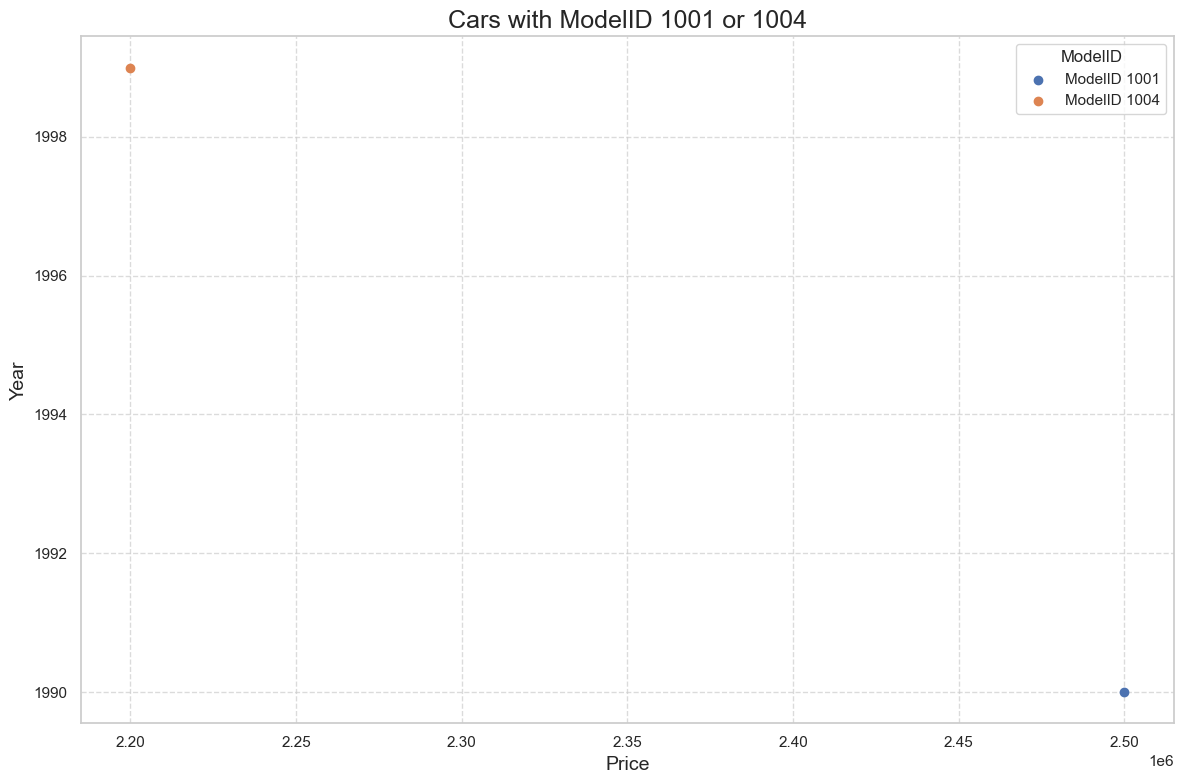

In [153]:
# Plotting the data
plt.figure(figsize=(12, 8))
for model_id in df['ModelID'].unique():
    subset = df[df['ModelID'] == model_id]
    plt.scatter(subset['Price'], subset['Year'], label=f'ModelID {model_id}')

# Add titles and labels
plt.title('Cars with ModelID 1001 or 1004', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.legend(title='ModelID')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Model between 1001 or 1004.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Car Sales Data for January 2024

In [155]:
# Define the SQL query
query29 = """
SELECT * FROM Car_Sales
WHERE MONTH(SaleDate) = 1 AND YEAR(SaleDate) = 2024;
"""

# Execute the SQL query
cursor.execute(query29)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)
df

SaleID  CarID    SaleDate   SalePrice  CountryID
0     221      1  2024-01-15  1900000.00         11
1     224      4  2024-01-25  1700000.00         14

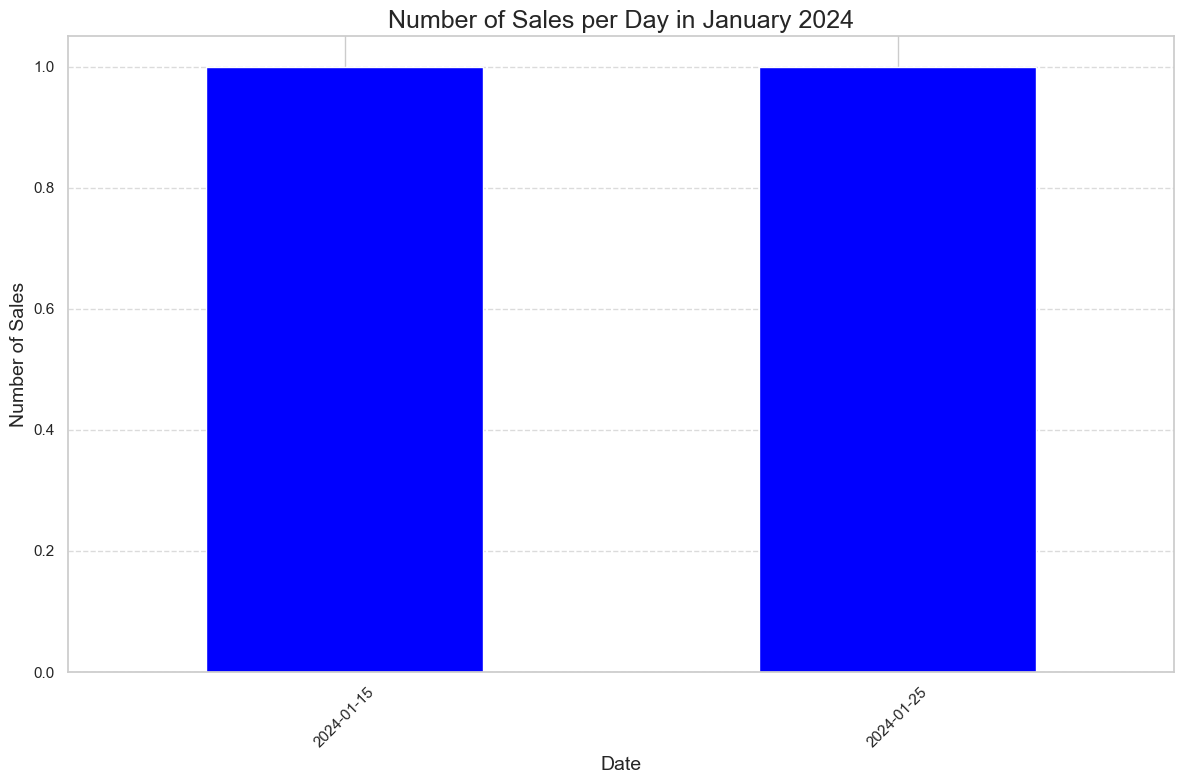

In [156]:
# Convert SaleDate to datetime if it's not already
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Aggregate number of sales by date
sales_by_date = df.groupby(df['SaleDate'].dt.date).size()

# Plotting the data
plt.figure(figsize=(12, 8))
sales_by_date.plot(kind='bar', color='blue')

# Add titles and labels
plt.title('Number of Sales per Day in January 2024', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)


save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Number Of Sales Per Day in Jan2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Define the query to retrieve the details of cars with CarID of 1 or 2


In [158]:
query30 = "SELECT * FROM Cars WHERE CarID IN (1, 2);"
cursor.execute(query30)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      1             101     1001  1990  2500000.00
1      2             102     1002  1987  3500000.00

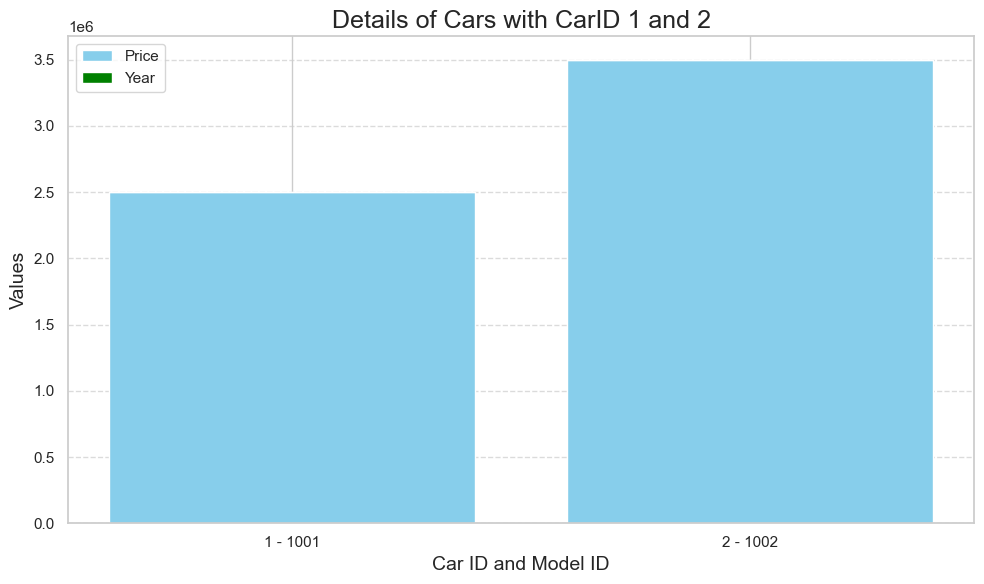

In [159]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Price and Year
plt.bar(df['CarID'].astype(str) + ' - ' + df['ModelID'].astype(str), df['Price'], color='skyblue', label='Price')
plt.bar(df['CarID'].astype(str) + ' - ' + df['ModelID'].astype(str), df['Year'], color='green', bottom=df['Price'], label='Year')

# Add titles and labels
plt.title('Details of Cars with CarID 1 and 2', fontsize=18)
plt.xlabel('Car ID and Model ID', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Add legend
plt.legend()

# Show grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Details of Cars with CarId1 and CarId2.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.tight_layout()
plt.show()

### **"List of Manufacturers Sorted by Country (Descending Order)"**

In [160]:
query31 = "SELECT * FROM Manufacturers ORDER BY Country DESC;"
cursor.execute(query31)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)
df

ManufacturerID     Name      Country
0             104     Ford          USA
1             105  Hyundai  South Korea
2             103   Toyota        Japan
3             106     Fiat        Italy
4             101     Audi      Germany
5             102      BMW      Germany

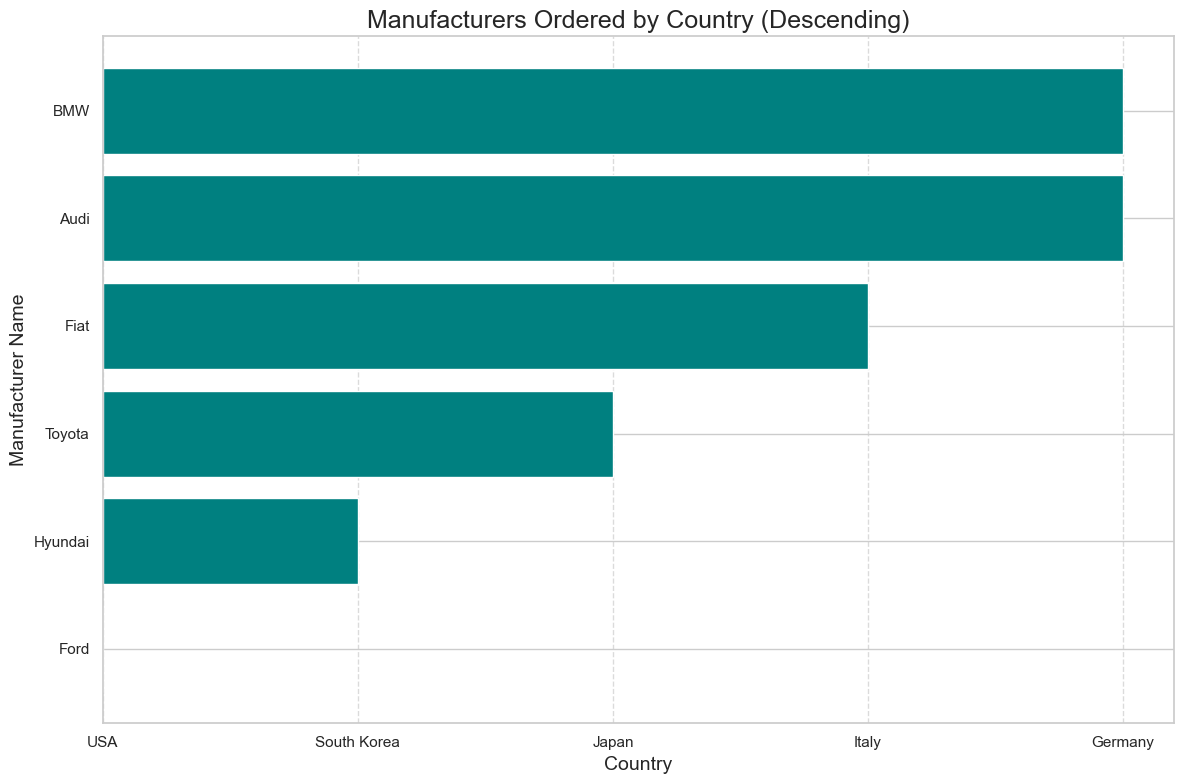

In [162]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Plot manufacturers by country
plt.barh(df['Name'], df['Country'], color='teal')

# Add titles and labels
plt.title('Manufacturers Ordered by Country (Descending)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Manufacturer Name', fontsize=14)

# Show grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Manufacturers Ordered by Country.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.tight_layout()
plt.show()

###   Join the Cars table with the Manufacturers table to show car details along with the manufacturer name.

In [164]:

query32 = """
SELECT Cars.CarID, Cars.ManufacturerID, Cars.ModelID, Cars.Year, Cars.Price,
       Manufacturers.Name as ManufacturerName
FROM Cars
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID;
"""
cursor.execute(query32)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df = pd.DataFrame(results, columns=columns)
df

CarID  ManufacturerID  ModelID  Year       Price ManufacturerName
0      1             101     1001  1990  2500000.00             Audi
1      2             102     1002  1987  3500000.00              BMW
2      3             103     1003  1965  5000000.00           Toyota
3      4             104     1004  1999  2200000.00             Ford
4      5             105     1005  2000  3500000.00          Hyundai
5      6             106     1006  1980  5500000.00             Fiat

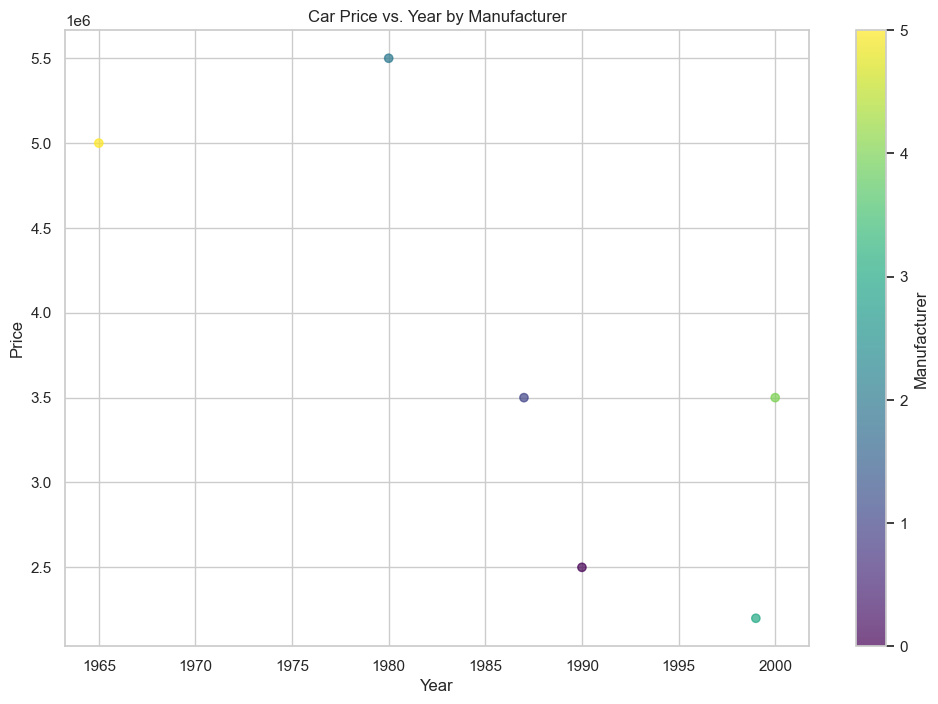

In [166]:
# Plotting the data
plt.figure(figsize=(12, 8))
# Example plot: Scatter plot showing Car Price by Year and Manufacturer
plt.scatter(df['Year'], df['Price'], c=df['ManufacturerName'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.colorbar(label='Manufacturer')
plt.title('Car Price vs. Year by Manufacturer')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Prices Vs Year By Manufactures.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

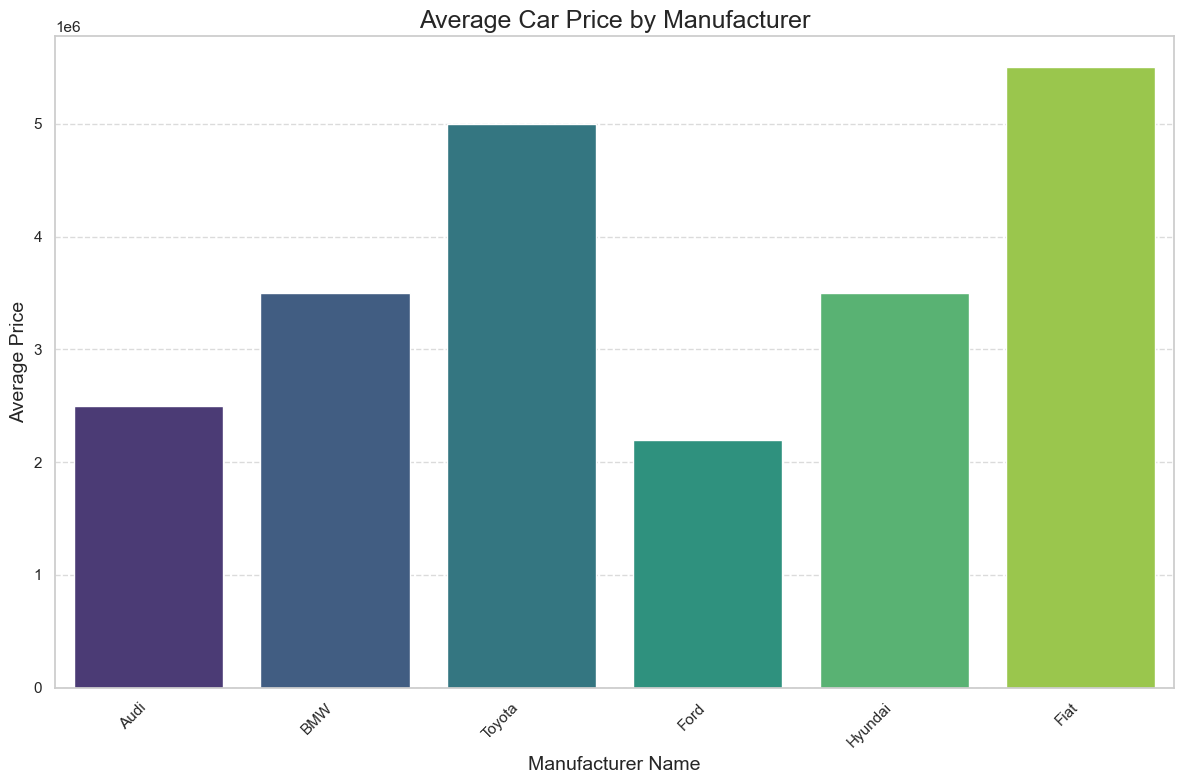

In [167]:
# Plotting the average price of cars by manufacturer
plt.figure(figsize=(12, 8))
sns.barplot(x='ManufacturerName', y='Price', data=df, estimator=lambda x: sum(x) / len(x), palette='viridis')

# Add titles and labels
plt.title('Average Car Price by Manufacturer', fontsize=18)
plt.xlabel('Manufacturer Name', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Avg Car Prices By Manufacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot with grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **"Total Number of Cars by Manufacturer"**

In [168]:
# Assuming `cursor` is already defined and connected to your database
query33 = """
SELECT ManufacturerID, COUNT(CarID) AS TotalNumberOfCars
FROM Cars 
GROUP BY ManufacturerID;
"""
cursor.execute(query33)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

ManufacturerID  TotalNumberOfCars
0             101                  1
1             102                  1
2             103                  1
3             104                  1
4             105                  1
5             106                  1

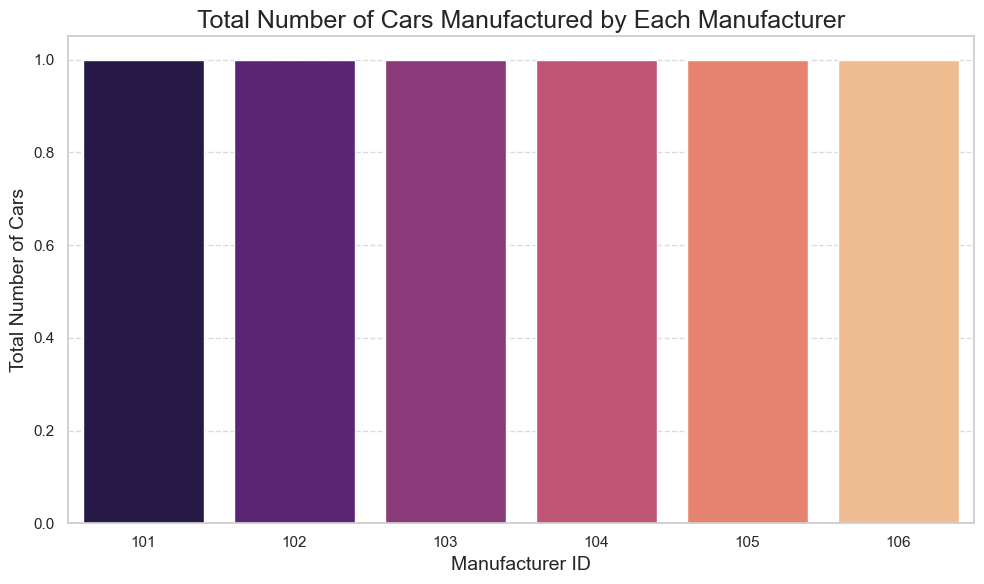

In [169]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='ManufacturerID', y='TotalNumberOfCars', data=df, palette='magma')

# Add titles and labels
plt.title('Total Number of Cars Manufactured by Each Manufacturer', fontsize=18)
plt.xlabel('Manufacturer ID', fontsize=14)
plt.ylabel('Total Number of Cars', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Total number of cars manufactured by each manuacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the SQL query to calculate total sales for each car model
query34 = """
SELECT ModelID, SUM(SalePrice) AS TotalSales
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
GROUP BY ModelID;
"""
cursor.execute(query34)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

ModelID  TotalSales
0     1001  1900000.00
1     1002  2900000.00
2     1003   430000.00
3     1004  1700000.00
4     1005  4300000.00

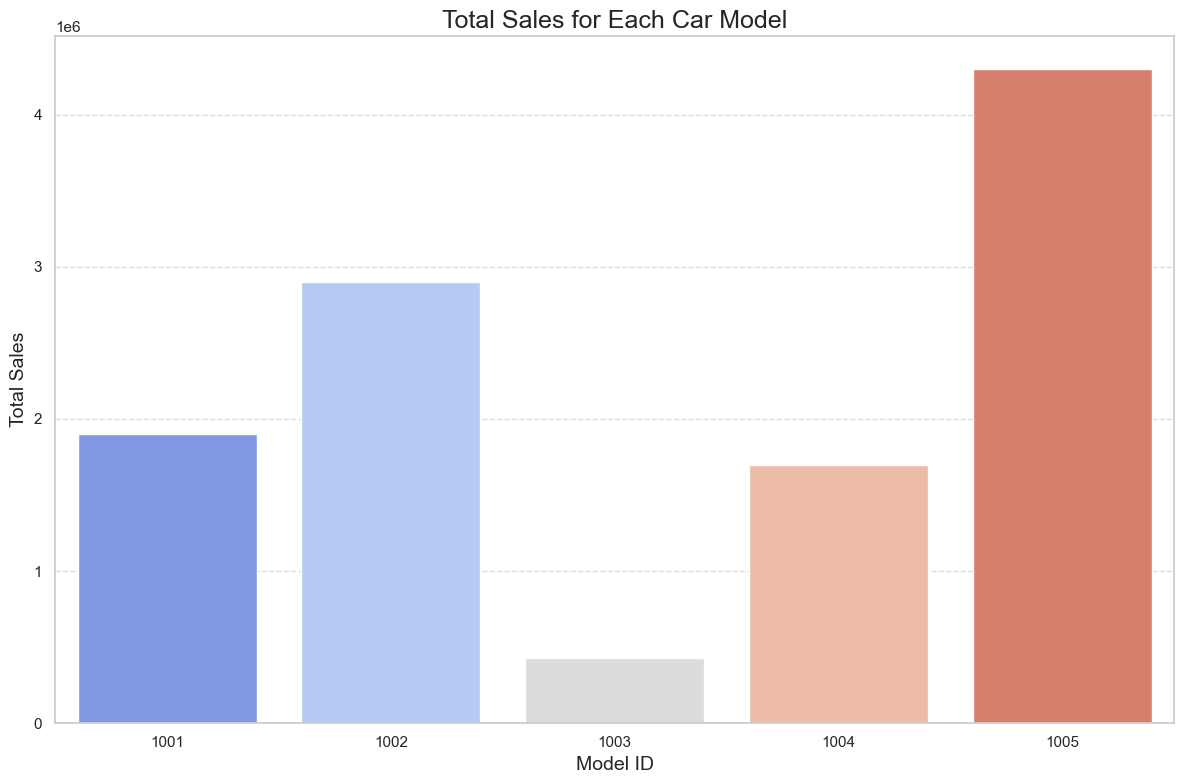

In [174]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='ModelID', y='TotalSales', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Total Sales for Each Car Model', fontsize=18)
plt.xlabel('Model ID', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Total Sales for Each Car Model.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Execute the SQL query to retrieve the most recent sale date for each car


In [175]:
query35 = """
SELECT CarID, MAX(SaleDate) AS LatestSaleDate 
FROM Car_Sales 
GROUP BY CarID;
"""
cursor.execute(query35)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID LatestSaleDate
0      1     2024-01-15
1      2     2024-02-20
2      3     2024-03-10
3      4     2024-01-25
4      5     2024-02-15

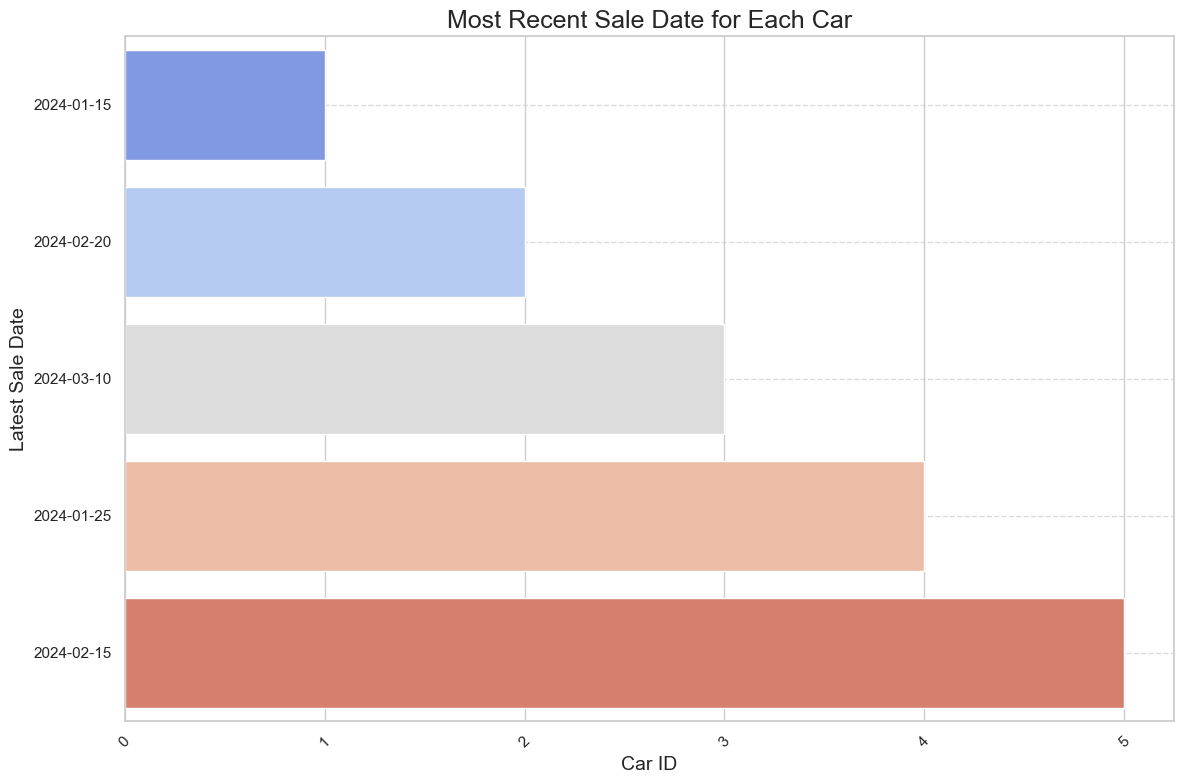

In [176]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='CarID', y='LatestSaleDate', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Most Recent Sale Date for Each Car', fontsize=18)
plt.xlabel('Car ID', fontsize=14)
plt.ylabel('Latest Sale Date', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Most Recent Sale Date for each car.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Retrieve the most recent sale date for each car

In [180]:
# Define the SQL query
query36 = """
SELECT Cars.CarID, Cars.ModelID, MAX(Car_Sales.SaleDate) AS LatestSaleDate, Manufacturers.Name AS CarName
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
GROUP BY Cars.CarID, Cars.ModelID, Manufacturers.Name;
"""

# Execute the SQL query
cursor.execute(query36)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ModelID LatestSaleDate  CarName
0      1     1001     2024-01-15     Audi
1      2     1002     2024-02-20      BMW
2      3     1003     2024-03-10   Toyota
3      4     1004     2024-01-25     Ford
4      5     1005     2024-02-15  Hyundai

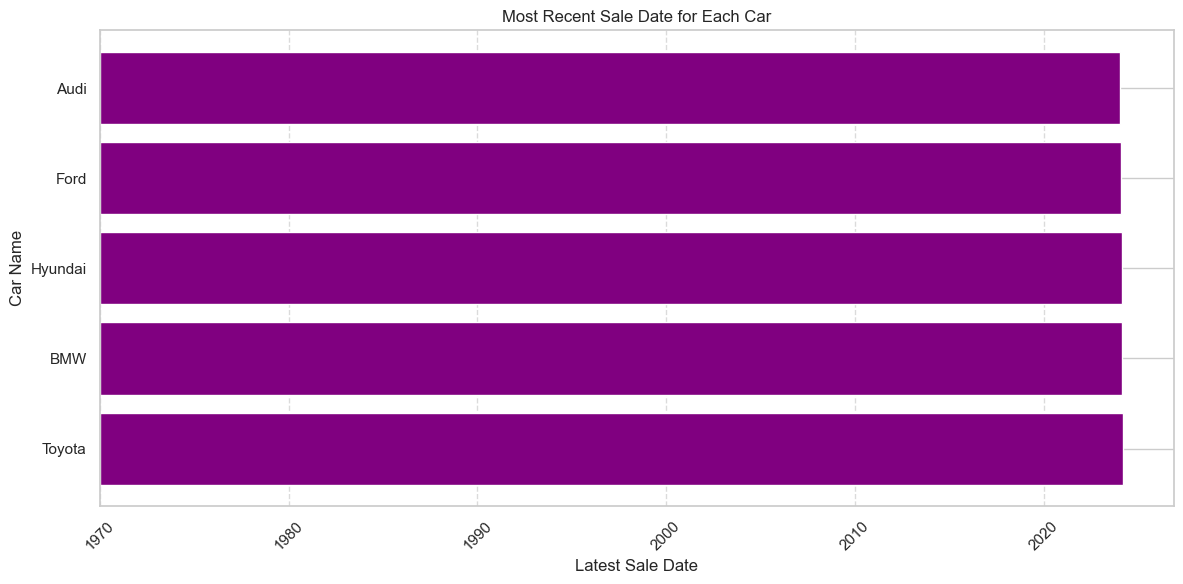

In [182]:
import matplotlib.pyplot as plt

# Convert the 'LatestSaleDate' column to datetime if not already
df['LatestSaleDate'] = pd.to_datetime(df['LatestSaleDate'])

# Sort the DataFrame by the 'LatestSaleDate'
df_sorted = df.sort_values(by='LatestSaleDate', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(df_sorted['CarName'], df_sorted['LatestSaleDate'].dt.date, color='purple')
plt.title('Most Recent Sale Date for Each Car')
plt.xlabel('Latest Sale Date')
plt.ylabel('Car Name')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Recent most sales date for each car')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

In [184]:
query37 = """
SELECT * FROM Cars
WHERE CarID NOT IN 
(SELECT CarID FROM Car_Sales);
"""
cursor.execute(query37)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

CarID  ManufacturerID  ModelID  Year       Price
0      6             106     1006  1980  5500000.00

### Execute the SQL query to find the average sale price for each country


In [185]:
query37 = "SELECT CountryID, ROUND(AVG(SalePrice),2) AS AvgSalePrice FROM Car_Sales GROUP BY CountryID;"
cursor.execute(query37)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df_avg_sale_price = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df_avg_sale_price

CountryID AvgSalePrice
0         11   1900000.00
1         12   2900000.00
2         13    430000.00
3         14   1700000.00
4         15   4300000.00

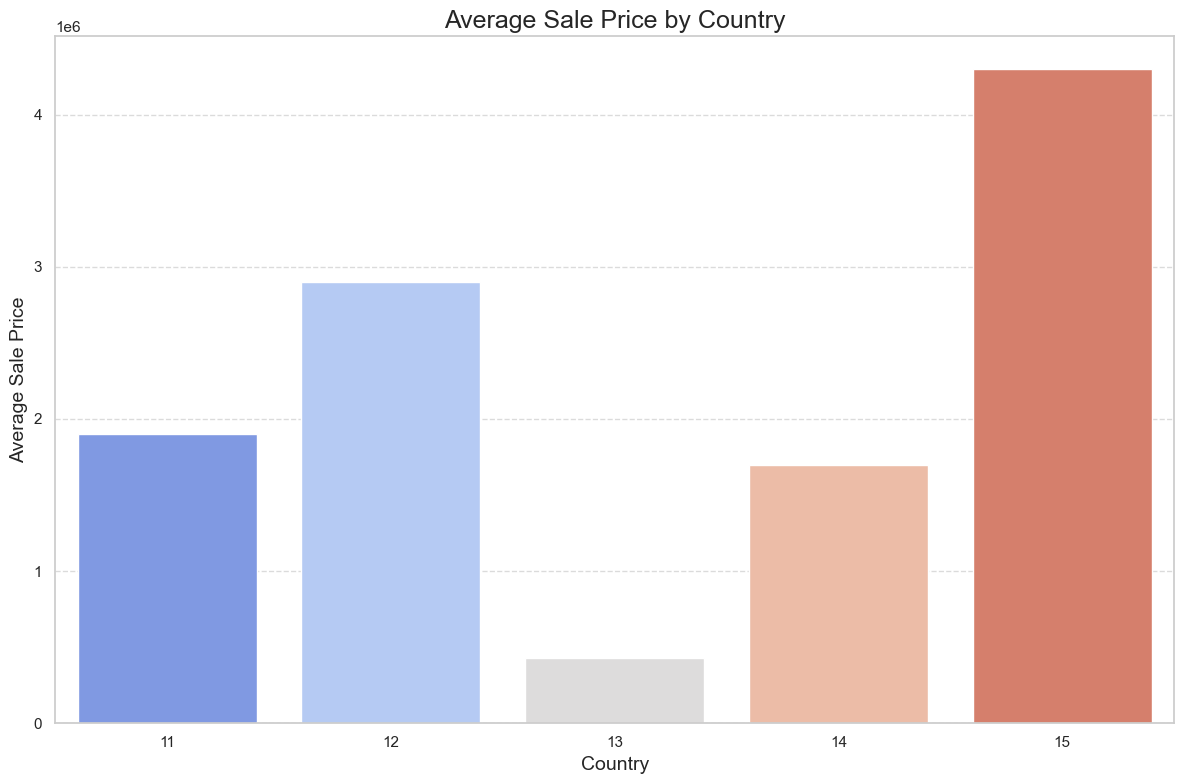

In [186]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_avg_sale_price, x='CountryID', y='AvgSalePrice', palette='coolwarm')

# Add titles and labels
plt.title('Average Sale Price by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Average Sale Price by Country.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Execute the SQL query to find the average sale price for each country, including the country name


In [187]:
query38 = """
SELECT Countries.CountryName, ROUND(AVG(Car_Sales.SalePrice), 2) AS AvgSalePrice
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY Countries.CountryName;
"""
cursor.execute(query38)

# Fetch the results
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]  # Fetch column names
df_avg_sale_price = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df_avg_sale_price

CountryName AvgSalePrice
0      Germany   2400000.00
1        Japan    430000.00
2          USA   1700000.00
3  South Korea   4300000.00

Text(122.74999999999999, 0.5, 'Average Sale Price')

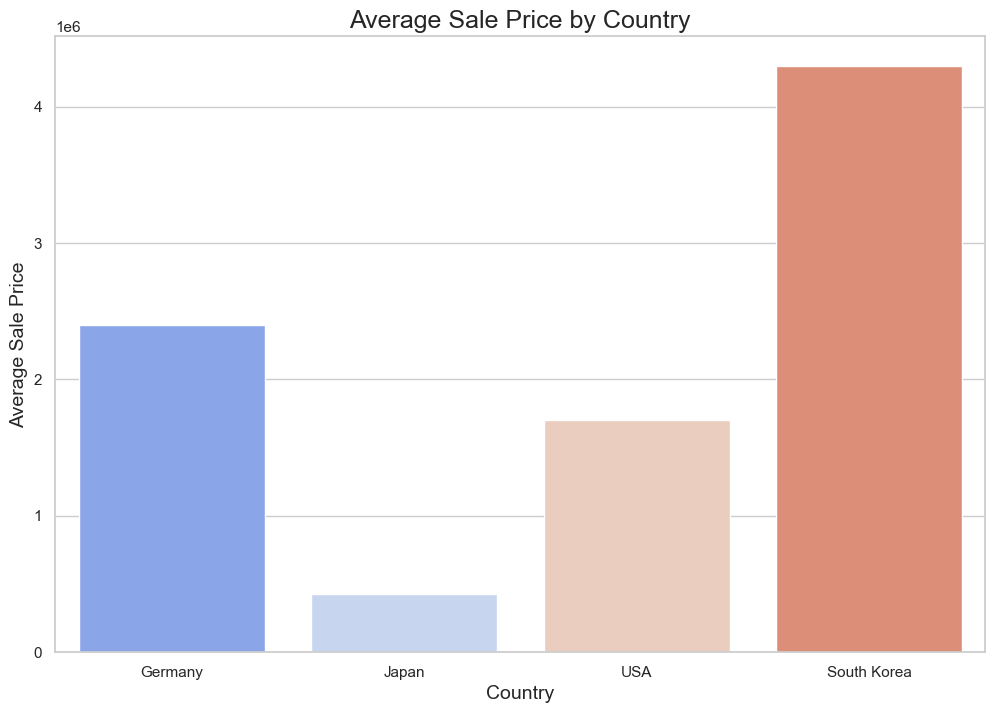

In [188]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_avg_sale_price, x='CountryName', y='AvgSalePrice', palette='coolwarm')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Avg Sale Price  by Countryy.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Add titles and labels
plt.title('Average Sale Price by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)

### Country Name with Maximum Sale Price.

In [192]:
# Execute the SQL query
query39 = """
SELECT Countries.CountryName, 
       MAX(Car_Sales.SalePrice) AS MaxSalePrice
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY Countries.CountryName;
"""
cursor.execute(query39)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_max_sales = pd.DataFrame(results, columns=columns)

In [193]:
df_max_sales

CountryName MaxSalePrice
0      Germany   2900000.00
1        Japan    430000.00
2          USA   1700000.00
3  South Korea   4300000.00

In [194]:
# Execute the SQL query
query40 = """
SELECT Countries.CountryName, 
       MAX(Car_Sales.SalePrice) AS MaxSalePrice
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY Countries.CountryName;
"""
cursor.execute(query40)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_max_sales = pd.DataFrame(results, columns=columns)
df_max_sales

CountryName MaxSalePrice
0      Germany   2900000.00
1        Japan    430000.00
2          USA   1700000.00
3  South Korea   4300000.00

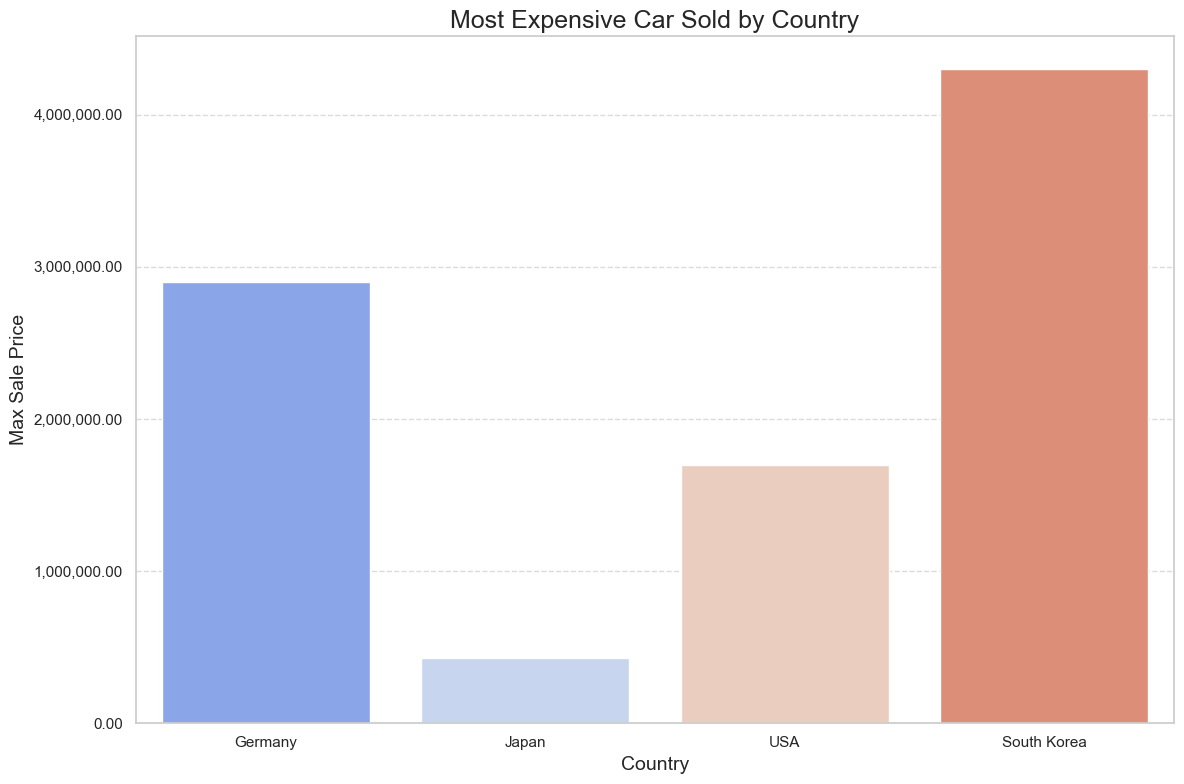

In [195]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df_max_sales, x='CountryName', y='MaxSalePrice', palette='coolwarm')

# Formatting the y-axis to show full price values with two decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add titles and labels
plt.title('Most Expensive Car Sold by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Max Sale Price', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Most Expensive by Countryy.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### "Highest Car Sale Price by Country and Car Manufacturer"

In [196]:
query41 = """
SELECT Countries.CountryName, 
       MAX(Car_Sales.SalePrice) AS MaxSalePrice,
       Manufacturers.Name AS CarName
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY Countries.CountryName, Manufacturers.Name;
"""
cursor.execute(query41)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_max_sales = pd.DataFrame(results, columns=columns)
df_max_sales

CountryName MaxSalePrice  CarName
0      Germany   1900000.00     Audi
1      Germany   2900000.00      BMW
2        Japan    430000.00   Toyota
3          USA   1700000.00     Ford
4  South Korea   4300000.00  Hyundai

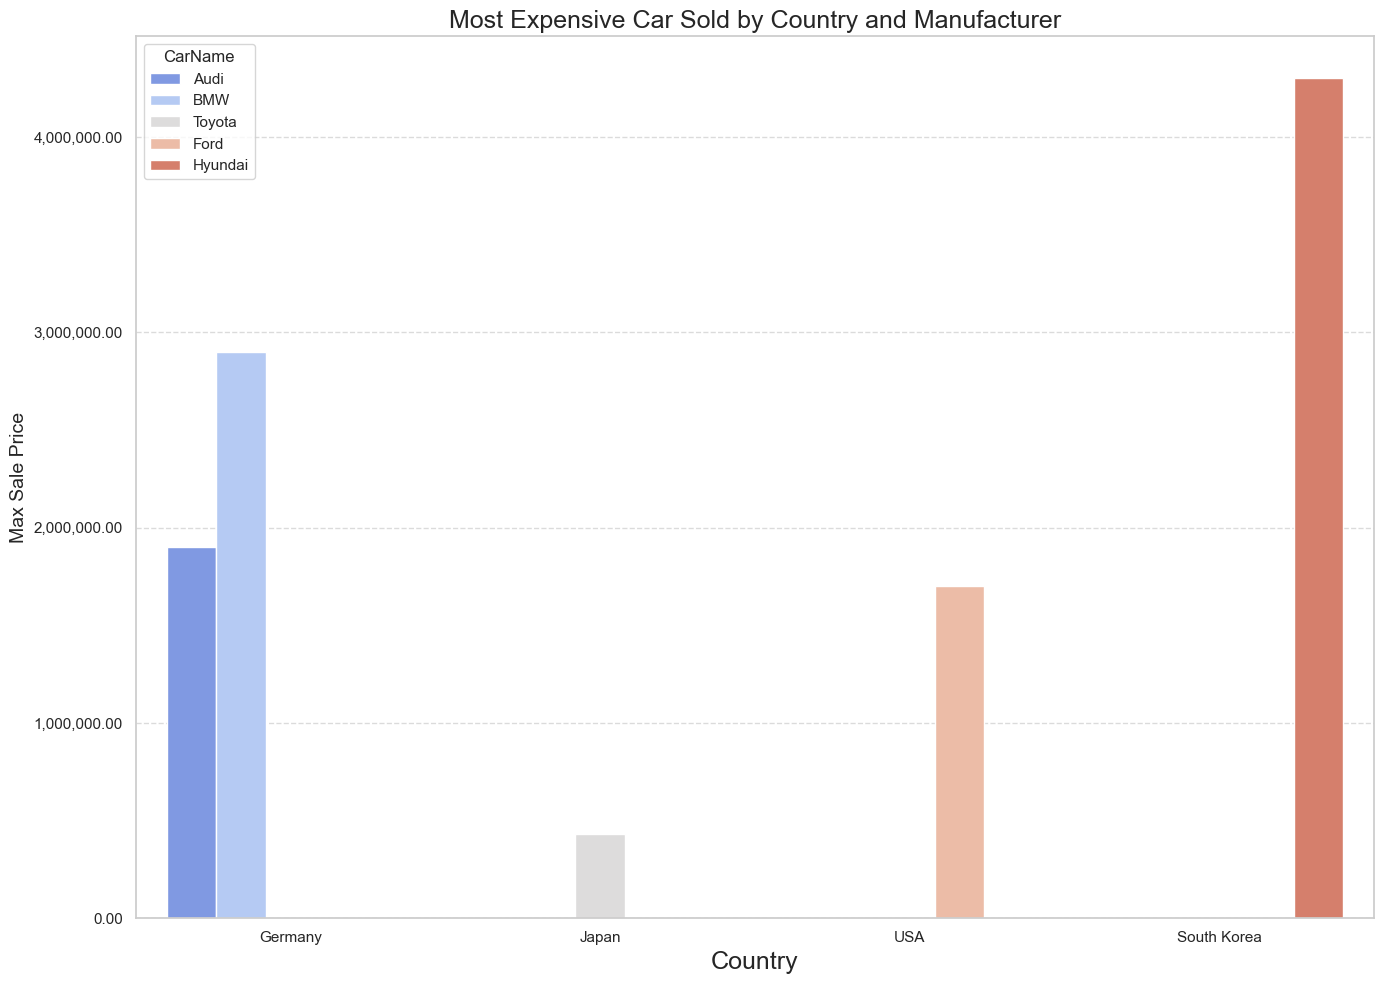

In [197]:
# Plotting the data
plt.figure(figsize=(14, 10))
sns.barplot(data=df_max_sales, x='CountryName', y='MaxSalePrice', hue='CarName', palette='coolwarm')

# Formatting the y-axis to show full price values with two decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add titles and labels
plt.title('Most Expensive Car Sold by Country and Manufacturer', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Max Sale Price', fontsize=14)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Highest Car Sale Price by Country and Car Manufacturer.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')


# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Join the Car_Sales table with Countries to show sales details along with the country name.


In [198]:
query42 = """
SELECT 
    Car_Sales.SaleID, 
    Car_Sales.CarID, 
    Car_Sales.SaleDate, 
    Car_Sales.SalePrice, 
    Car_Sales.CountryID, 
    Countries.CountryName
FROM 
    Car_Sales
INNER JOIN 
    Countries 
ON 
    Car_Sales.CountryID = Countries.CountryID;
"""
cursor.execute(query42)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_sales_country = pd.DataFrame(results, columns=columns)
df_sales_country

SaleID  CarID    SaleDate   SalePrice  CountryID  CountryName
0     221      1  2024-01-15  1900000.00         11      Germany
1     222      2  2024-02-20  2900000.00         12      Germany
2     223      3  2024-03-10   430000.00         13        Japan
3     224      4  2024-01-25  1700000.00         14          USA
4     225      5  2024-02-15  4300000.00         15  South Korea

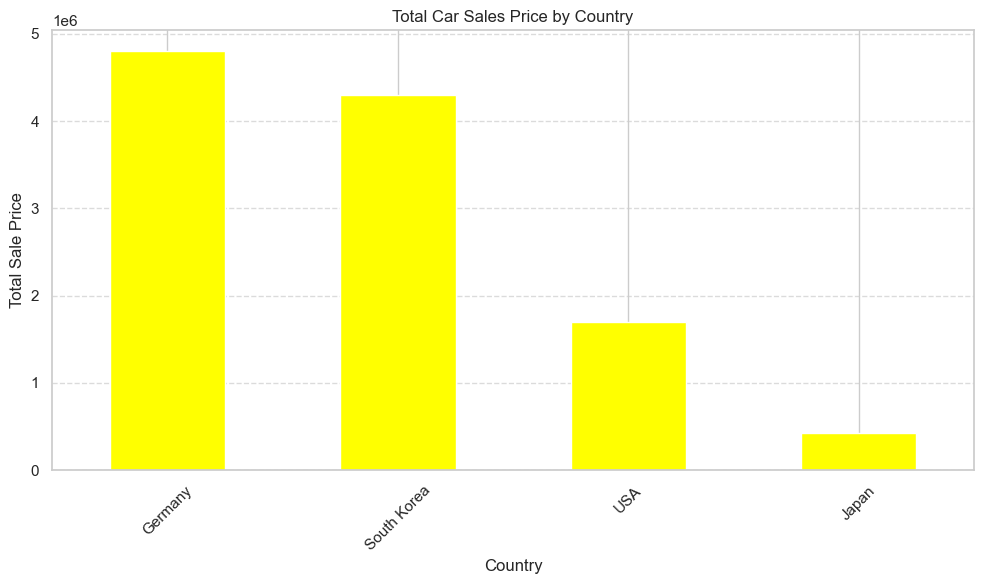

In [204]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that SalePrice is treated as numeric
df_sales_country['SalePrice'] = pd.to_numeric(df_sales_country['SalePrice'], errors='coerce')

# Group the data by 'CountryName' and calculate the total sale price for each country
total_sales_by_country = df_sales_country.groupby('CountryName')['SalePrice'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
total_sales_by_country.plot(kind='bar', color='yellow')
plt.title('Total Car Sales Price by Country')
plt.xlabel('Country')
plt.ylabel('Total Sale Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Total Car Sales Price by country.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

In [206]:
query43 = """
SELECT Models.ModelName, Manufacturers.Name AS ManufacturerName
FROM Models
INNER JOIN Cars ON Models.ModelID = Cars.ModelID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID;
"""
cursor.execute(query43)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
Manfactur = pd.DataFrame(results, columns=columns)
Manfactur

ModelName ManufacturerName
0        Q5             Audi
1        X5              BMW
2   Corolla           Toyota
3   Mustang             Ford
4     Verna          Hyundai
5      CR-V             Fiat

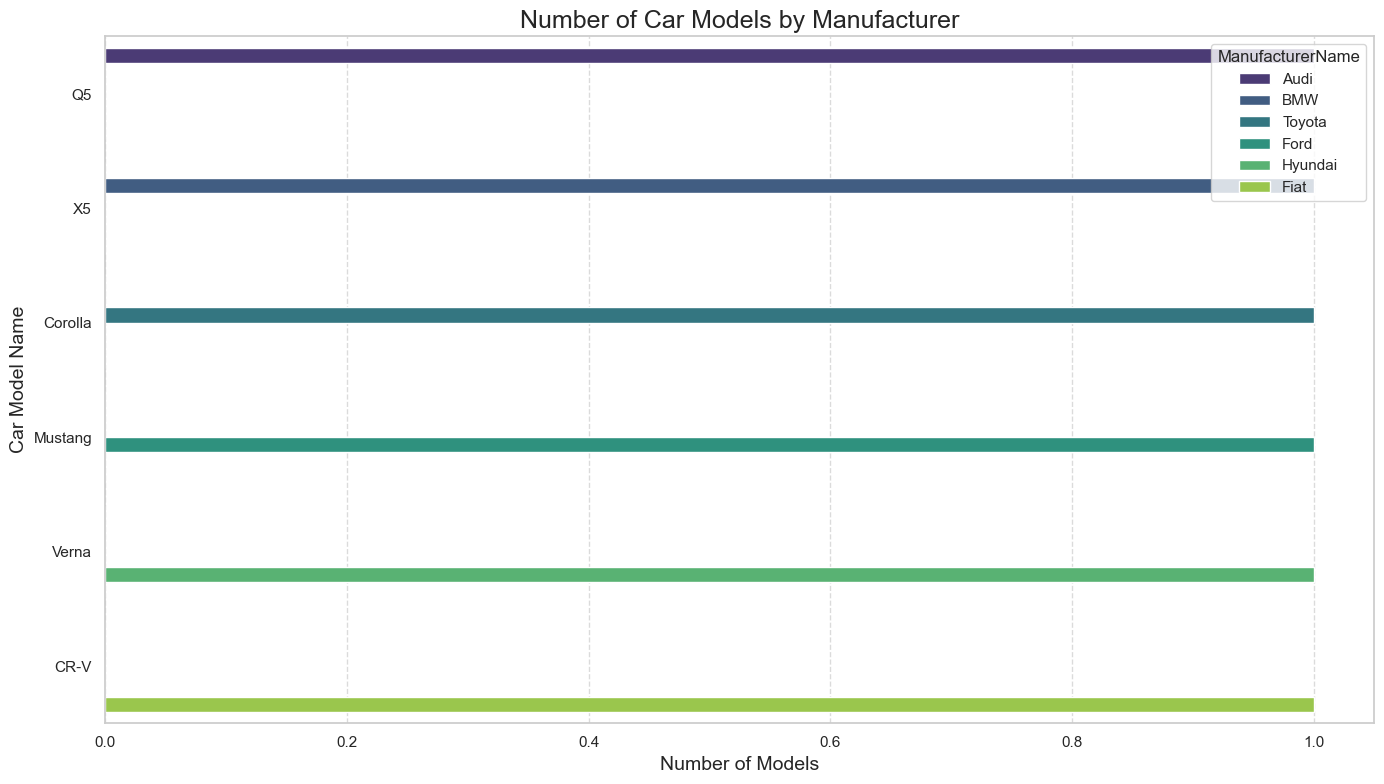

In [207]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Create a count plot
sns.countplot(data=Manfactur, y='ModelName', hue='ManufacturerName', palette='viridis')

# Add titles and labels
plt.title('Number of Car Models by Manufacturer', fontsize=18)
plt.xlabel('Number of Models', fontsize=14)
plt.ylabel('Car Model Name', fontsize=14)

# Show grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Number Of Car Models by Manufacturer.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### Display all car sales where the sale price is higher than the car's original price.


In [215]:
query44 = """
SELECT 
    Car_Sales.SaleID, 
    Car_Sales.SalePrice, 
    Cars.Price, 
    Manufacturers.Name AS CarName
FROM 
    Car_Sales
INNER JOIN 
    Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN 
    Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE 
    Car_Sales.SalePrice > Cars.Price;
"""
# Execute the updated SQL query
cursor.execute(query44)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_sales_above_original = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df_sales_above_original


SaleID   SalePrice       Price  CarName
0     225  4300000.00  3500000.00  Hyundai

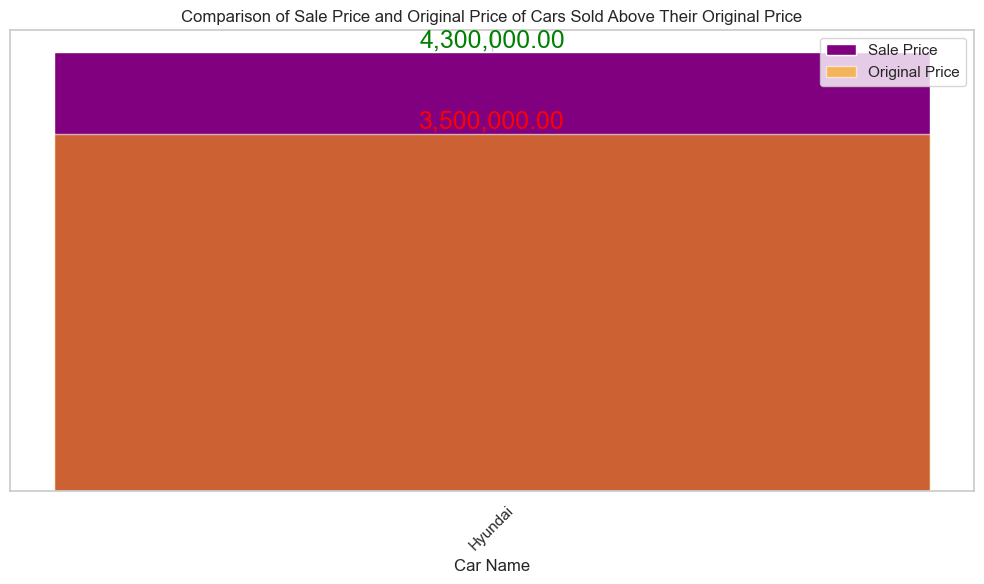

In [229]:
# Plot the data
plt.figure(figsize=(10, 6))
bar1 = plt.bar(df_sales_above_original['CarName'], df_sales_above_original['SalePrice'], color='purple', label='Sale Price')
bar2 = plt.bar(df_sales_above_original['CarName'], df_sales_above_original['Price'], color='orange', alpha=0.6, label='Original Price')

plt.title('Comparison of Sale Price and Original Price of Cars Sold Above Their Original Price')
plt.xlabel('Car Name')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove y-axis
plt.yticks([])

# Annotate each bar with the real values
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=18, color='green')

for bar in bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=18, color='Red')

plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Comparison Of Sale Price and Original Price Of Cars above their original Prie.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### Manufacturer with Most Car Models

In [231]:
# Execute the query
query45 = """
SELECT 
    Cars.ManufacturerID, 
    COUNT(Cars.ModelID) AS `Manufacturers with Most Car Models`, 
    Manufacturers.Name As `Manufacturer Name`
FROM 
    Cars
INNER JOIN 
    Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
GROUP BY 
    Cars.ManufacturerID, Manufacturers.Name
ORDER BY 
    `Manufacturers with Most Car Models` DESC
LIMIT 1;
"""
cursor.execute(query45)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_manufacturer_models = pd.DataFrame(results, columns=columns)
df_manufacturer_models


ManufacturerID  Manufacturers with Most Car Models Manufacturer Name
0             101                                   1              Audi

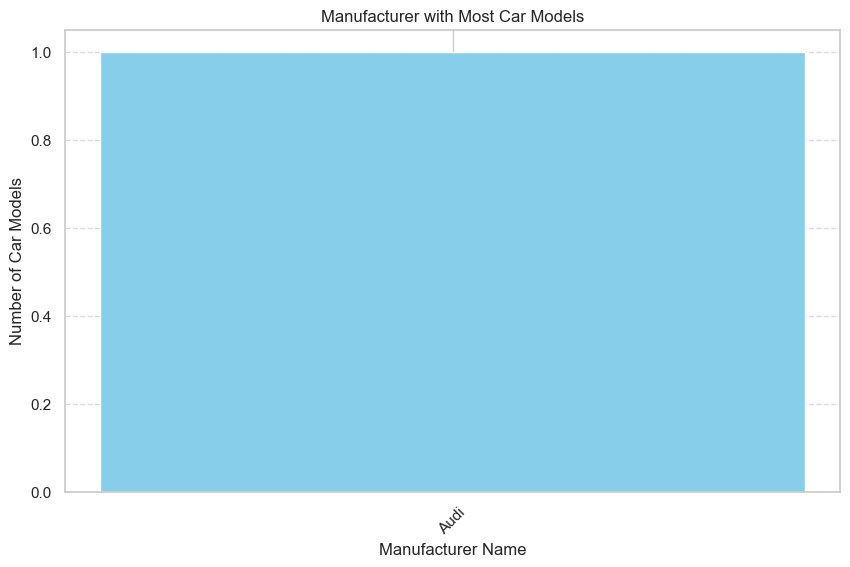

In [233]:
# Plotting the data
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_manufacturer_models is already created as shown in your code

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_manufacturer_models['Manufacturer Name'], df_manufacturer_models['Manufacturers with Most Car Models'], color='skyblue')
plt.xlabel('Manufacturer Name')
plt.ylabel('Number of Car Models')
plt.title('Manufacturer with Most Car Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Manufacturers with most car Models.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')


# Display the plot
plt.show()

### Top Manufacturer by Number of Car Models

In [235]:
# Execute the query
query46 = """
SELECT Manufacturers.Name AS ManufacturerName, COUNT(Cars.ModelID) AS `Number of Car Models`
FROM Cars
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
GROUP BY Manufacturers.ManufacturerID
ORDER BY `Number of Car Models` DESC
LIMIT 1;
"""
cursor.execute(query46)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_manufacturer_models = pd.DataFrame(results, columns=columns)
df_manufacturer_models

ManufacturerName  Number of Car Models
0             Audi                     1

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



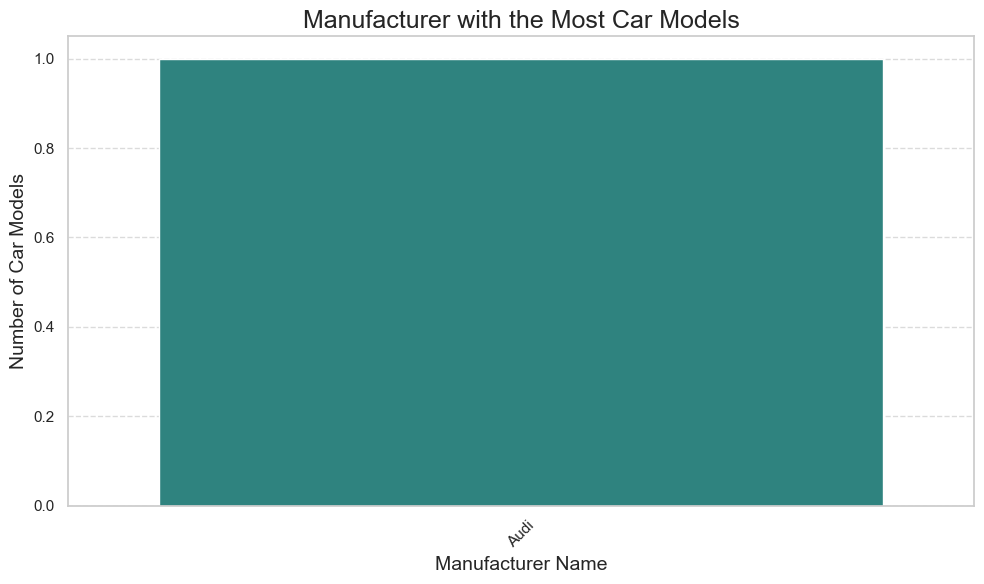

In [236]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(data=df_manufacturer_models, x='ManufacturerName', y='Number of Car Models', palette='viridis')

# Add titles and labels
plt.title('Manufacturer with the Most Car Models', fontsize=18)
plt.xlabel('Manufacturer Name', fontsize=14)
plt.ylabel('Number of Car Models', fontsize=14)

# Show grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Manufacturers with most car_modelss.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### Car Models with Multiple Sales

In [237]:
# Execute the query
query47 = """
SELECT Cars.ModelID, Models.ModelName, COUNT(Car_Sales.SaleID) AS SaleCount
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Models ON Cars.ModelID = Models.ModelID
GROUP BY Cars.ModelID, Models.ModelName
HAVING COUNT(Car_Sales.SaleID) > 1;
"""
cursor.execute(query47)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_sold_models = pd.DataFrame(results, columns=columns)
df_sold_models

Empty DataFrame
Columns: [ModelID, ModelName, SaleCount]
Index: []

### Car Sales In Germany Model and Manufacturer

In [240]:

query48 = """
SELECT Models.ModelName, Countries.CountryName,Manufacturers.Name As `Car Name`
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Models ON Cars.ModelID = Models.ModelID
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE Countries.CountryName = 'Germany';
"""
cursor.execute(query48)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_germany_sales = pd.DataFrame(results, columns=columns)
df_germany_sales

ModelName CountryName Car Name
0        Q5     Germany     Audi
1        X5     Germany      BMW

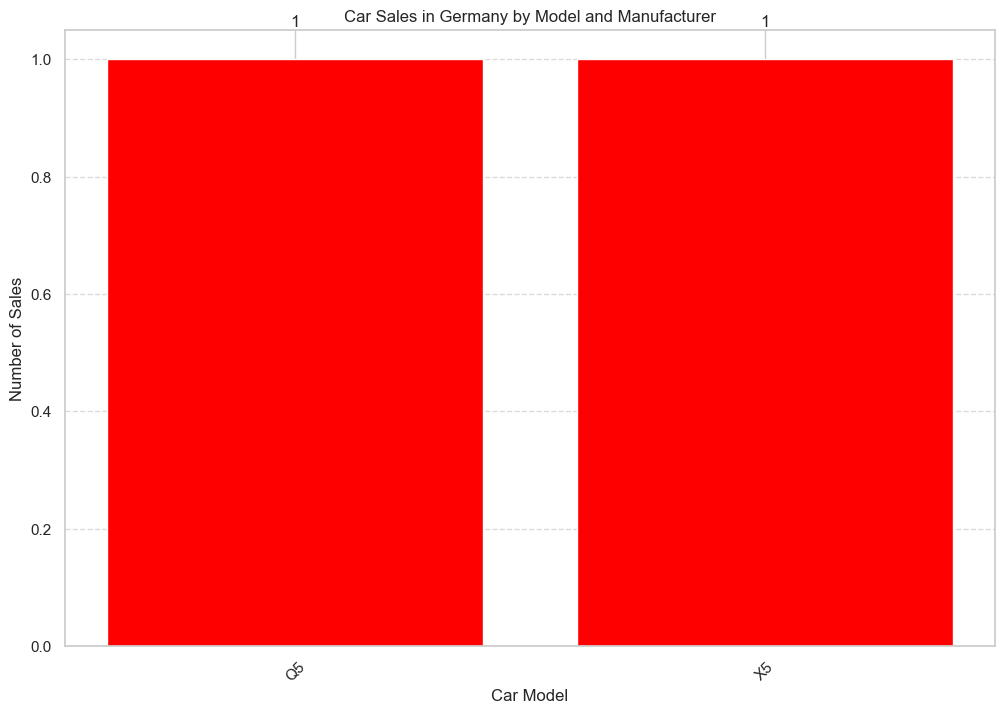

In [246]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_germany_sales is already created as shown in your code

# Count the number of sales for each car model
sales_count = df_germany_sales['ModelName'].value_counts()

# Create a new DataFrame for plotting
df_sales_count = sales_count.reset_index()
df_sales_count.columns = ['ModelName', 'SaleCount']

# Plotting the data
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sales_count['ModelName'],  df_sales_count['SaleCount'], color='REd')

# Add count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

# Additional plot settings
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.title('Car Sales in Germany by Model and Manufacturer')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car sales in Germany.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Display the plot
plt.show()

### Total Revenu in Year 2024

In [248]:
# Execute the query
query49 = """
SELECT YEAR(SaleDate) AS SaleYear, SUM(SalePrice) AS TotalRevenue
FROM Car_Sales
GROUP BY YEAR(SaleDate)
ORDER BY SaleYear;
"""
cursor.execute(query49)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_revenue_per_year = pd.DataFrame(results, columns=columns)
df_revenue_per_year

SaleYear TotalRevenue
0      2024  11230000.00

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



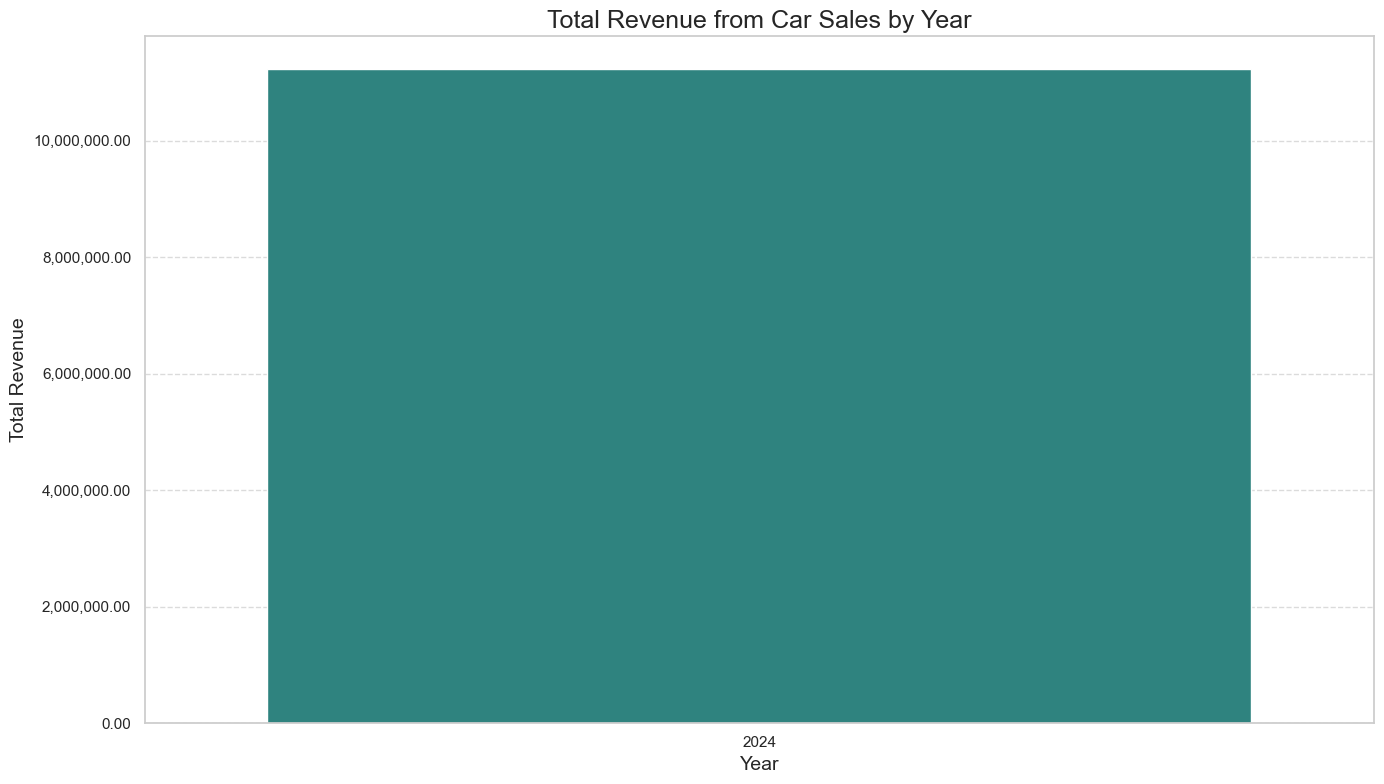

In [254]:
# Plotting the data
plt.figure(figsize=(14, 8))

# Create a bar plot for the total revenue per year
sns.barplot(data=df_revenue_per_year, x='SaleYear', y='TotalRevenue', palette='viridis')

# Add titles and labels
plt.title('Total Revenue from Car Sales by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)

# Format the y-axis to show full price values with two decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Show grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Total Revnue from Car sales.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### Find all manufacturers that have produced cars in the year 2000.


In [255]:
query50 = """
SELECT DISTINCT Manufacturers.Name AS ManufacturerName, Cars.Year
FROM Cars
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE Cars.Year = 2000;
"""
cursor.execute(query50)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_manufacturers_2000 = pd.DataFrame(results, columns=columns)
df_manufacturers_2000

ManufacturerName  Year
0          Hyundai  2000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



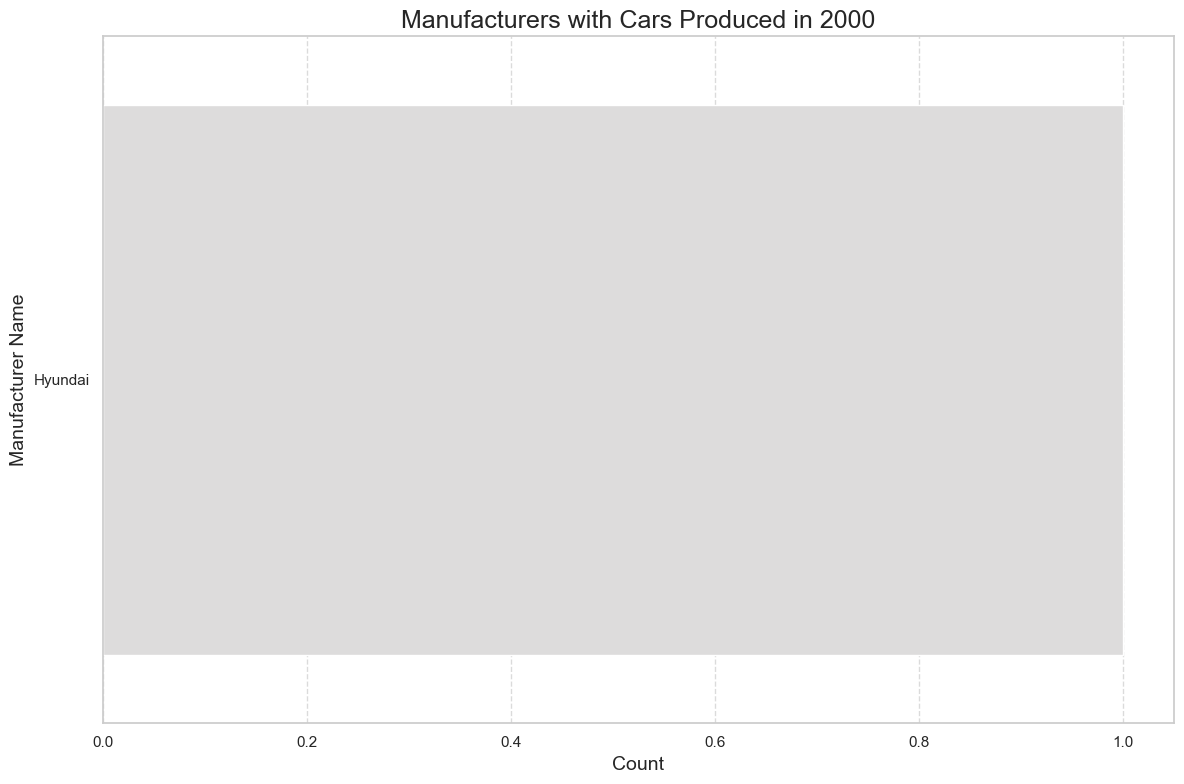

In [256]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Create a count plot for the manufacturers
sns.countplot(data=df_manufacturers_2000, y='ManufacturerName', palette='coolwarm')

# Add titles and labels
plt.title('Manufacturers with Cars Produced in 2000', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Manufacturer Name', fontsize=14)

# Show grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Car Produced in 2000.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### Total Cars sold in Year 2024

In [257]:
# Execute the query
query51 = """
SELECT YEAR(SaleDate) AS SaleYear, COUNT(CarID) AS TotalCarsSold
FROM Car_Sales
GROUP BY YEAR(SaleDate);
"""
cursor.execute(query51)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_cars_sold_per_year = pd.DataFrame(results, columns=columns)
df_cars_sold_per_year

SaleYear  TotalCarsSold
0      2024              5

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



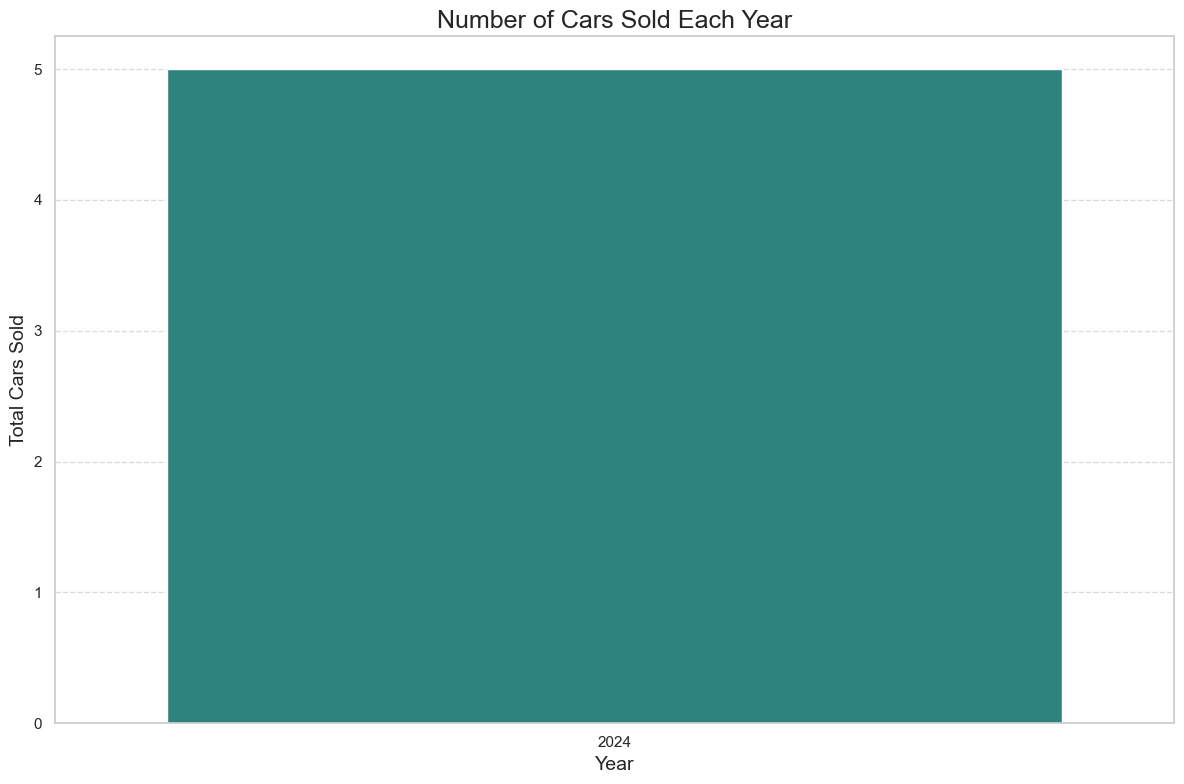

In [258]:
# Plotting the data
plt.figure(figsize=(12, 8))

# Create a bar plot for the number of cars sold each year
sns.barplot(data=df_cars_sold_per_year, x='SaleYear', y='TotalCarsSold', palette='viridis')

# Add titles and labels
plt.title('Number of Cars Sold Each Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cars Sold', fontsize=14)

# Show grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Number of Car solds each year.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### Annual Revenue Overview

In [259]:
# Execute the query
query52 = """
SELECT Models.ModelName, COUNT(DISTINCT Countries.CountryID) AS CountryCount
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Models ON Cars.ModelID = Models.ModelID
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY Models.ModelName
HAVING COUNT(DISTINCT Countries.CountryID) > 1;
"""
cursor.execute(query52)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_models_sold_multiple_countries = pd.DataFrame(results, columns=columns)

In [260]:
df_models_sold_multiple_countries

Empty DataFrame
Columns: [ModelName, CountryCount]
Index: []

###  List all sales with the price higher than the average price of that model.


In [261]:
query53 = """
SELECT Car_Sales.SaleID, Car_Sales.SalePrice, ROUND(AVG(Cars.Price),2) AS AveragePrice
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
GROUP BY Car_Sales.SaleID
HAVING Car_Sales.SalePrice > AVG(Cars.Price);
"""
cursor.execute(query53)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

SaleID   SalePrice AveragePrice
0     225  4300000.00   3500000.00

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



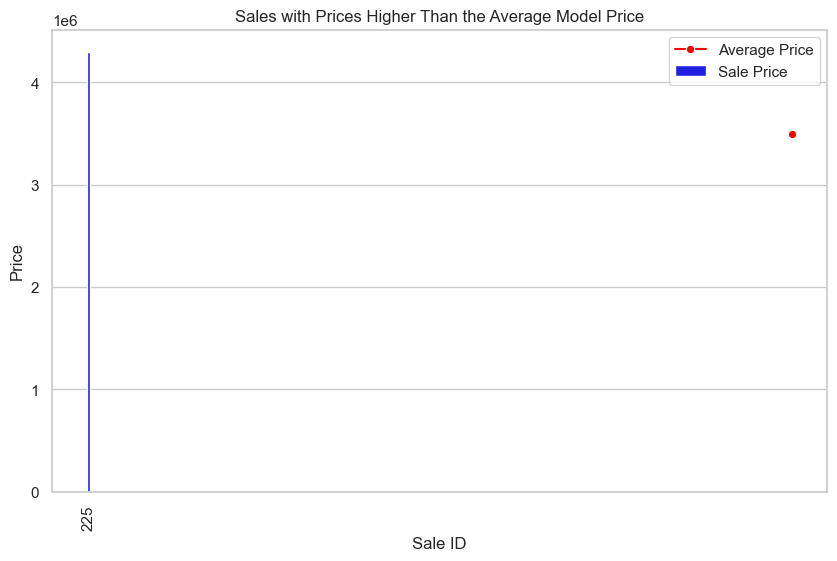

In [262]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='SaleID', y='SalePrice', data=df, color='blue', label='Sale Price')
sns.lineplot(x='SaleID', y='AveragePrice', data=df, color='red', label='Average Price', marker='o')

# Customizing the plot
plt.title("Sales with Prices Higher Than the Average Model Price")
plt.xlabel("Sale ID")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Sales Price Higher then avg model price .jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Cars Count per Manufacturer Since 2010

In [263]:
# Execute the query
query54 = '''
SELECT ManufacturerID, COUNT(CarID) AS TotalCars
FROM Cars
WHERE Year > 2010
GROUP BY ManufacturerID;
'''
cursor.execute(query54)
results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df_total_cars = pd.DataFrame(results, columns=columns)
df_total_cars

Empty DataFrame
Columns: [ManufacturerID, TotalCars]
Index: []

### Find the number of cars sold by each manufacturer in 2024.


In [264]:
query55 = """
SELECT Manufacturers.Name, COUNT(Car_Sales.CarID) AS CarsSold
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE YEAR(Car_Sales.SaleDate) = 2024
GROUP BY Manufacturers.Name;
"""
cursor.execute(query55)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

Name  CarsSold
0     Audi         1
1      BMW         1
2   Toyota         1
3     Ford         1
4  Hyundai         1

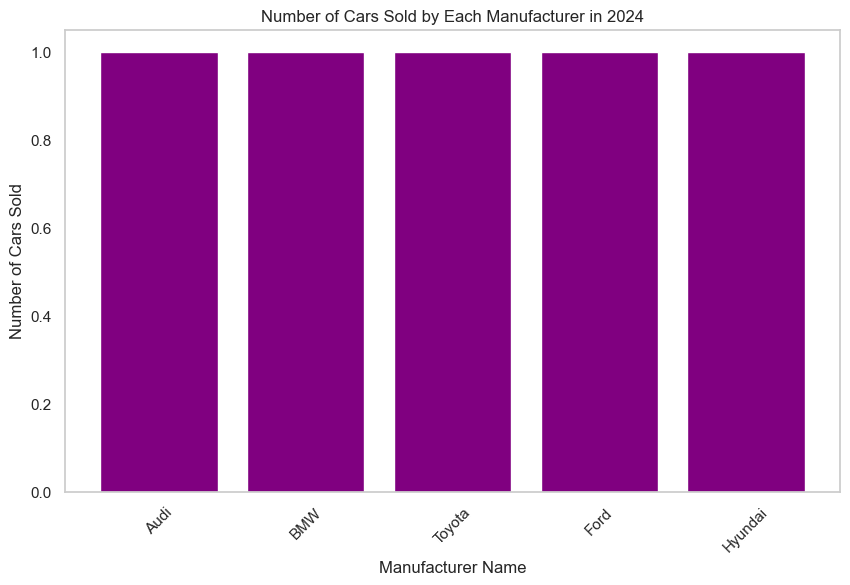

In [265]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['CarsSold'], color='purple')
plt.xlabel('Manufacturer Name')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Each Manufacturer in 2024')
plt.xticks(rotation=45)
plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'No of cars sold by each manufacturer in 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Display the highest and lowest sale prices for each manufacturer.


In [266]:
query56 = """
SELECT Manufacturers.Name AS `Manufacture Name`, 
MAX(Car_Sales.SalePrice) AS `Highest Sale Price`,
MIN(Car_Sales.SalePrice) AS `Lowest Sale Price`
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
GROUP BY `Manufacture Name`;
"""
cursor.execute(query56)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

Manufacture Name Highest Sale Price Lowest Sale Price
0             Audi         1900000.00        1900000.00
1              BMW         2900000.00        2900000.00
2           Toyota          430000.00         430000.00
3             Ford         1700000.00        1700000.00
4          Hyundai         4300000.00        4300000.00

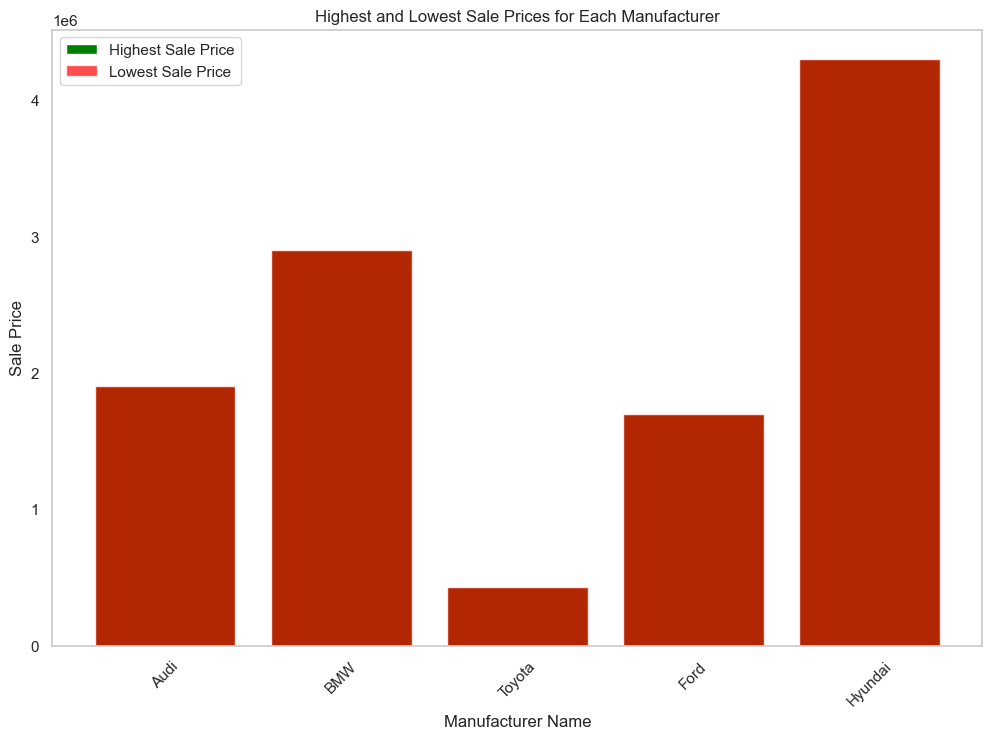

In [267]:
# Plot the graph
plt.figure(figsize=(12, 8))

# Plotting highest sale price
plt.bar(df['Manufacture Name'], df['Highest Sale Price'], color='green', label='Highest Sale Price')

# Plotting lowest sale price
plt.bar(df['Manufacture Name'], df['Lowest Sale Price'], color='red', label='Lowest Sale Price', alpha=0.7)

plt.xlabel('Manufacturer Name')
plt.ylabel('Sale Price')
plt.title('Highest and Lowest Sale Prices for Each Manufacturer')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Highest and Lowest Sale Prices for Each Manufacturers.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### # -- 57) List all cars that have a higher sale price than the maximum price of any car manufactured by the same manufacturer.


In [269]:

query57 = """
SELECT Car_Sales.SaleID, Car_Sales.SalePrice, Manufacturers.Name
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE Car_Sales.SalePrice > (
    SELECT MAX(C.Price)
    FROM Cars C
    WHERE C.ManufacturerID = Cars.ManufacturerID
);
"""
cursor.execute(query57)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

SaleID   SalePrice     Name
0     225  4300000.00  Hyundai

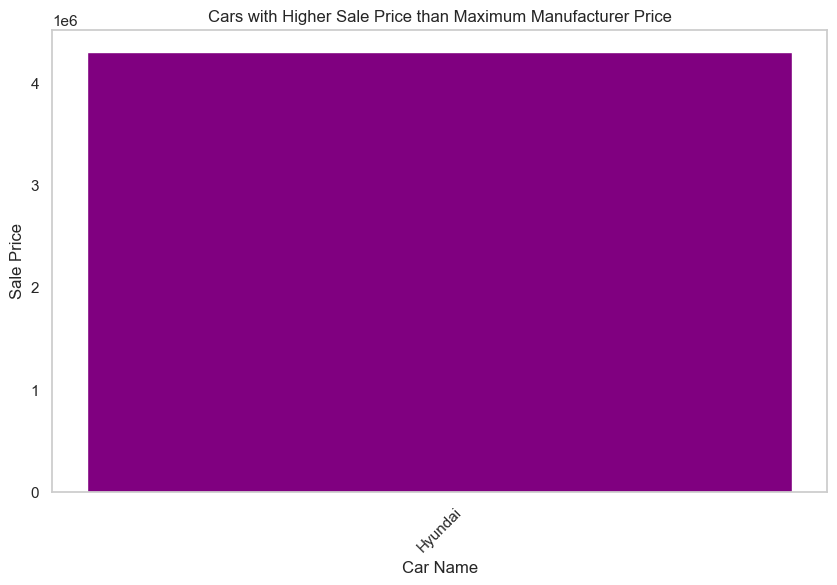

In [271]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(df['Name'].astype(str), df['SalePrice'], color='purple')
plt.xlabel('Car Name')
plt.ylabel('Sale Price')
plt.title('Cars with Higher Sale Price than Maximum Manufacturer Price')
plt.xticks(rotation=45)
plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Cars with Higher Sale Price than Maximum Manufacturer Price.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

In [272]:
# Execute the updated query
query58 = """
SELECT Car_Sales.SaleID, Car_Sales.SalePrice, Manufacturers.Name
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
WHERE Car_Sales.SalePrice > (
    SELECT MAX(C.Price)
    FROM Cars C
    WHERE C.ManufacturerID = Cars.ManufacturerID
);
"""
cursor.execute(query58)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

SaleID   SalePrice     Name
0     225  4300000.00  Hyundai

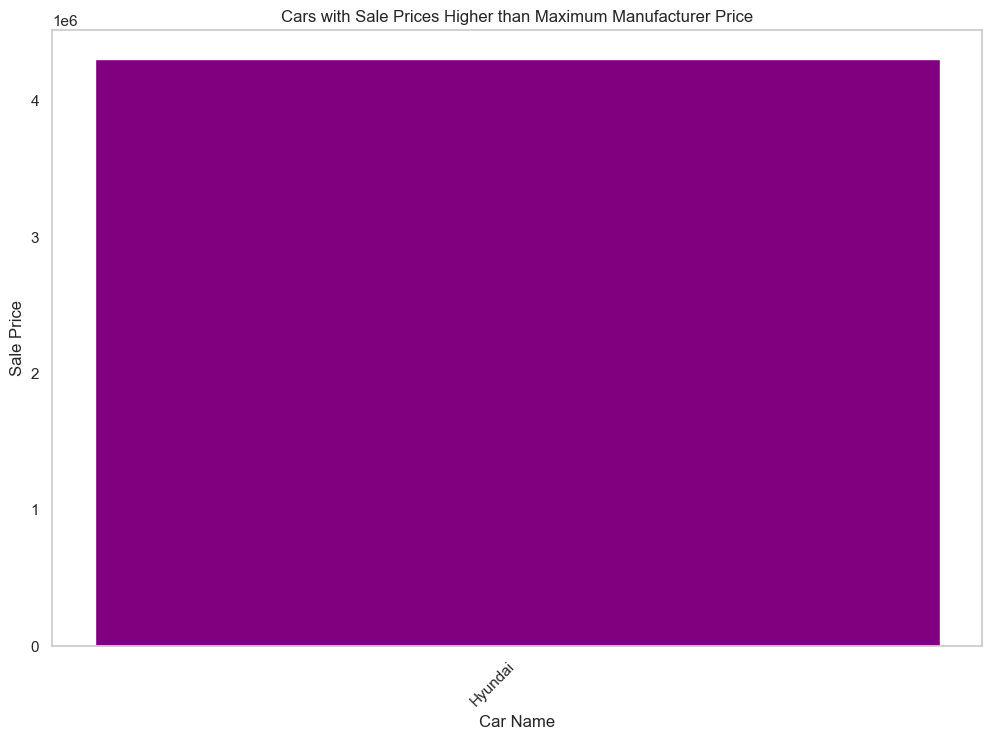

In [273]:
# Plot the graph
plt.figure(figsize=(12, 8))
plt.bar(df['Name'], df['SalePrice'], color='purple')
plt.xlabel('Car Name')
plt.ylabel('Sale Price')
plt.title('Cars with Sale Prices Higher than Maximum Manufacturer Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(False)  # Removing the grid lines as per your preference
plt.show()

### List the top 3 car models with the highest total sales revenue.

In [274]:

query59 = """
SELECT Models.ModelName, SUM(Car_Sales.SalePrice) AS TotalRevenue
FROM Car_Sales
INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
INNER JOIN Models ON Cars.ModelID = Models.ModelID
GROUP BY Models.ModelName
ORDER BY TotalRevenue DESC
LIMIT 3;
"""
cursor.execute(query59)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

ModelName TotalRevenue
0     Verna   4300000.00
1        X5   2900000.00
2        Q5   1900000.00

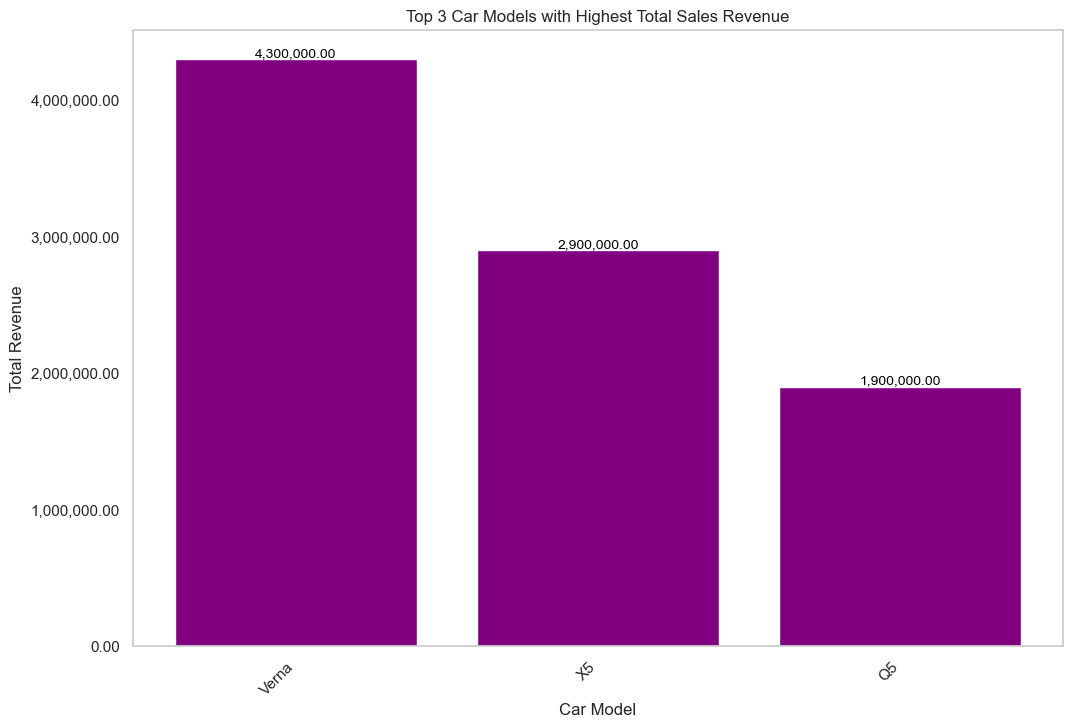

In [275]:
# Plot the graph
plt.figure(figsize=(12, 8))
bars = plt.bar(df['ModelName'], df['TotalRevenue'], color='purple')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Car Model')
plt.ylabel('Total Revenue')
plt.title('Top 3 Car Models with Highest Total Sales Revenue')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize y-axis to show full decimal precision
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Top 3 Car Models with Highest total sales revenue.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')


plt.show()

### Find out Salescount in each country name.

In [276]:
# Execute the query
query60 = """
SELECT Countries.CountryName, COUNT(Car_Sales.SaleID) AS SalesCount
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
WHERE YEAR(Car_Sales.SaleDate) = 2024
GROUP BY Countries.CountryName
ORDER BY SalesCount DESC
LIMIT 5;
"""
cursor.execute(query60)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryName  SalesCount
0      Germany           2
1        Japan           1
2          USA           1
3  South Korea           1

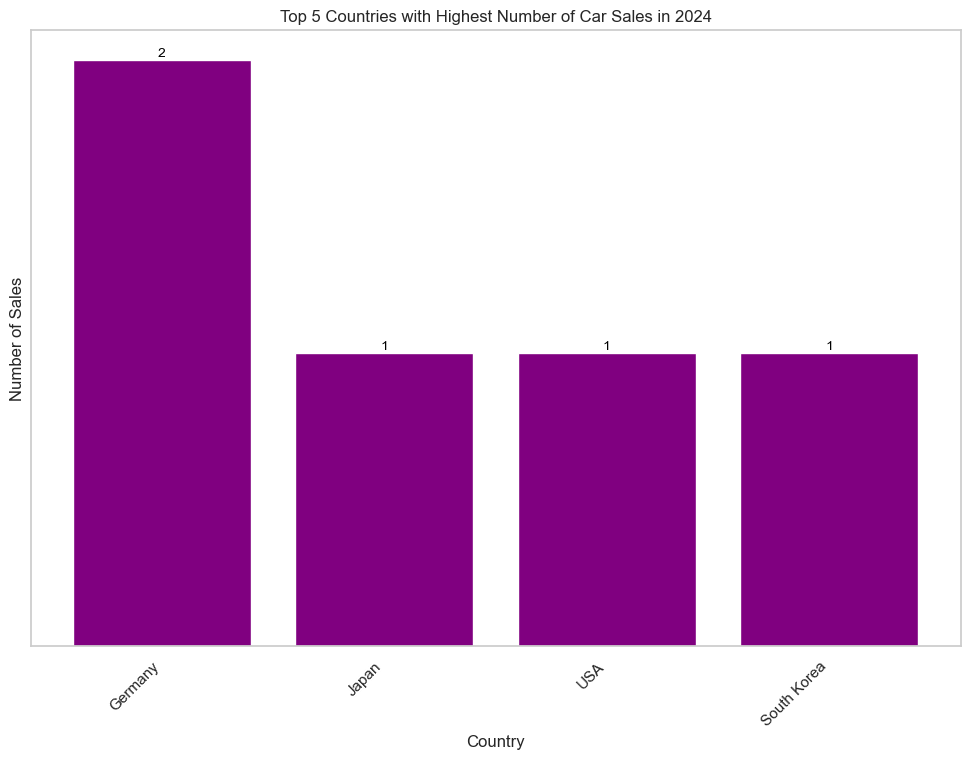

In [277]:
# Plot the graph
plt.figure(figsize=(12, 8))
bars = plt.bar(df['CountryName'], df['SalesCount'], color='purple')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.title('Top 5 Countries with Highest Number of Car Sales in 2024')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove y-axis values (ticks)
plt.yticks([])

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Top 5 Countries with Highest number of car sales in 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.grid(False)  # Removing the grid lines as per your preference
plt.show()

### Calculate the average sale price for each manufacturer in 2024 and compare it to the average sale price across all manufacturers.


In [279]:
query61 = """
WITH ManufacturerAvg AS (
    SELECT Manufacturers.Name, ROUND(AVG(Car_Sales.SalePrice), 2) AS AvgSalePrice
    FROM Car_Sales
    INNER JOIN Cars ON Car_Sales.CarID = Cars.CarID
    INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
    WHERE YEAR(Car_Sales.SaleDate) = 2024
    GROUP BY Manufacturers.Name
)
SELECT Name, AvgSalePrice,
    (SELECT ROUND(AVG(Car_Sales.SalePrice), 2) FROM Car_Sales WHERE YEAR(SaleDate) = 2024) AS OverallAvg
FROM ManufacturerAvg;
"""
cursor.execute(query61)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

Name AvgSalePrice  OverallAvg
0     Audi   1900000.00  2246000.00
1      BMW   2900000.00  2246000.00
2   Toyota    430000.00  2246000.00
3     Ford   1700000.00  2246000.00
4  Hyundai   4300000.00  2246000.00

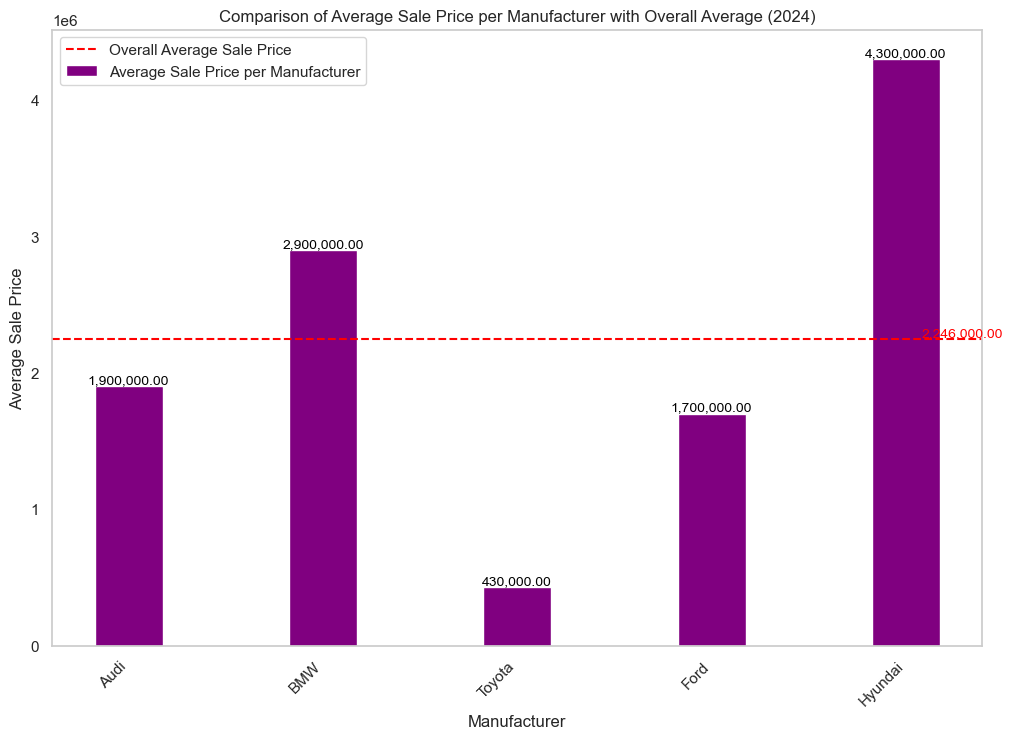

In [280]:
# Calculate the average sale price for each manufacturer in 2024 and compare it to the average sale price across all manufacturers.
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(df))

# Bar chart for average sale price per manufacturer
bars = plt.bar(index, df['AvgSalePrice'], bar_width, label='Average Sale Price per Manufacturer', color='purple')

# Line chart for overall average
plt.axhline(y=df['OverallAvg'][0], color='red', linestyle='--', label='Overall Average Sale Price')

# Add value annotations on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add value annotation for the overall average
plt.text(len(df) - 0.5, df['OverallAvg'][0], f'{df["OverallAvg"][0]:,.2f}', 
         ha='right', va='bottom', fontsize=10, color='red')

plt.xlabel('Manufacturer')
plt.ylabel('Average Sale Price')
plt.title('Comparison of Average Sale Price per Manufacturer with Overall Average (2024)')
plt.xticks(index, df['Name'], rotation=45, ha='right')
plt.legend()
plt.grid(False)  # Removing the grid lines as per your preference


save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Compaision Of avg sale.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### -- 62) List the top 3 manufacturers by the total number of cars produced, with each manufacturer having at least one car sold in 2024.


In [281]:

query62 = """
SELECT Manufacturers.Name, COUNT(Cars.CarID) AS TotalCarsProduced
FROM Manufacturers
INNER JOIN Cars ON Manufacturers.ManufacturerID = Cars.ManufacturerID
INNER JOIN Car_Sales ON Cars.CarID = Car_Sales.CarID AND YEAR(Car_Sales.SaleDate) = 2024
GROUP BY Manufacturers.Name
HAVING COUNT(Car_Sales.CarID) > 0
ORDER BY TotalCarsProduced DESC
LIMIT 3;
"""
cursor.execute(query62)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

Name  TotalCarsProduced
0    Audi                  1
1     BMW                  1
2  Toyota                  1

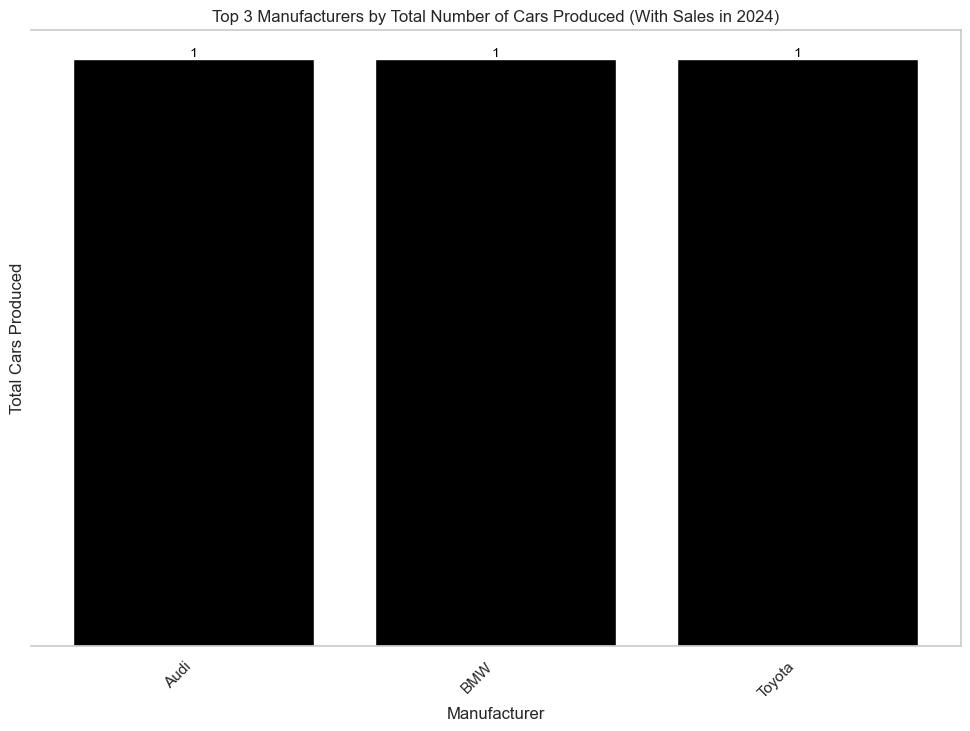

In [282]:
# Plot the graph
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Name'], df['TotalCarsProduced'], color='black')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Manufacturer')
plt.ylabel('Total Cars Produced')
plt.title('Top 3 Manufacturers by Total Number of Cars Produced (With Sales in 2024)')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and labels
plt.yticks([])
plt.gca().spines['left'].set_visible(False)  # Hide the left spine
plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Top3 Manufacturers by Total Number of cars.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Identify the month in 2024 with the highest average sale price.


In [283]:
query63 = """
SELECT MONTH(SaleDate) AS SaleMonth, ROUND(AVG(SalePrice),2) AS AverageSalePrice
FROM Car_Sales
WHERE YEAR(SaleDate) = 2024
GROUP BY MONTH(SaleDate)
ORDER BY AverageSalePrice DESC
LIMIT 1;
"""
cursor.execute(query63)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

SaleMonth AverageSalePrice
0          2       3600000.00

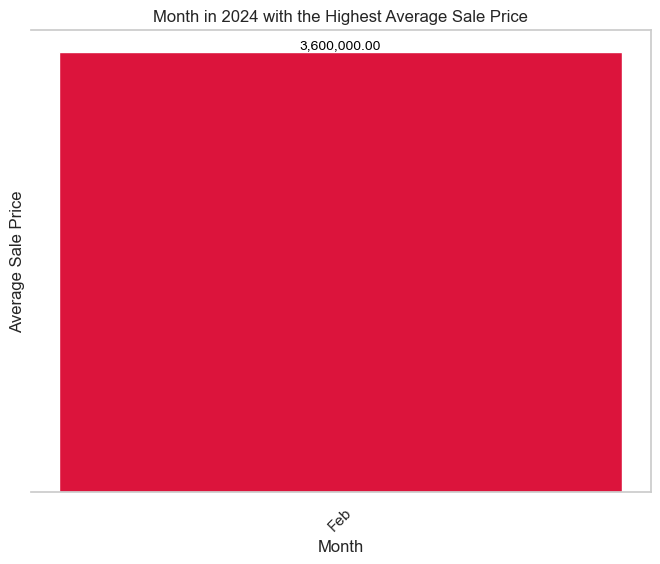

In [284]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(df['SaleMonth'], df['AverageSalePrice'], color='crimson')

# Add label to the bar
for index, row in df.iterrows():
    plt.text(row['SaleMonth'], row['AverageSalePrice'], f'{row["AverageSalePrice"]:,}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.title('Month in 2024 with the Highest Average Sale Price')

# Customize x-axis labels to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(df['SaleMonth'], [month_names[i - 1] for i in df['SaleMonth']], rotation=45)

# Remove y-axis ticks and labels
plt.yticks([])
plt.gca().spines['left'].set_visible(False)  # Hide the left spine

plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Month in 2024 with ighest avg sale price.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Identify the top 3 manufacturers that have the highest percentage of cars sold in 2024 relative to their total production.


In [285]:
query64 = """
WITH ManufacturerSales AS (
    SELECT Manufacturers.ManufacturerID, COUNT(Cars.CarID) AS TotalCarsProduced,
    SUM(CASE WHEN YEAR(Car_Sales.SaleDate) = 2024 THEN 1 ELSE 0 END) AS CarsSoldIn2024
    FROM Manufacturers
    INNER JOIN Cars ON Manufacturers.ManufacturerID = Cars.ManufacturerID
    LEFT JOIN Car_Sales ON Cars.CarID = Car_Sales.CarID
    GROUP BY Manufacturers.ManufacturerID
)
SELECT Manufacturers.Name, (CarsSoldIn2024 / TotalCarsProduced) * 100 AS SalesPercentage
FROM ManufacturerSales
INNER JOIN Manufacturers ON ManufacturerSales.ManufacturerID = Manufacturers.ManufacturerID
ORDER BY SalesPercentage DESC
LIMIT 3;
"""
cursor.execute(query64)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

Name SalesPercentage
0    Audi        100.0000
1     BMW        100.0000
2  Toyota        100.0000

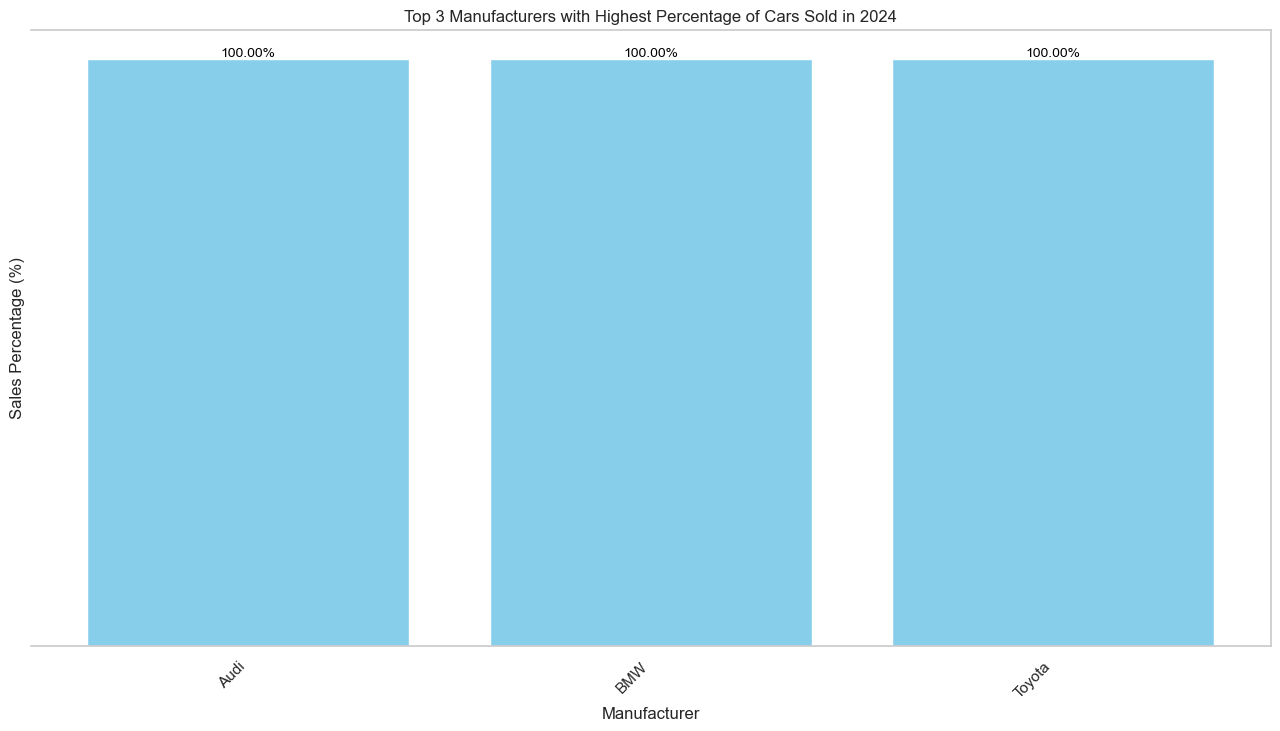

In [288]:
# Plot the graph
plt.figure(figsize=(16, 8))
bars = plt.bar(df['Name'], df['SalesPercentage'], color='skyblue')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Manufacturer')
plt.ylabel('Sales Percentage (%)')
plt.title('Top 3 Manufacturers with Highest Percentage of Cars Sold in 2024')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and labels
plt.yticks([])
plt.gca().spines['left'].set_visible(False)  # Hide the left spine

plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Top 3 Manufacturers with highest % of cars sold in 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### 65) Find the country that has the most significant increase in total car sales from 2023 to 2024.

In [294]:

query65 = """
WITH Sales2023 AS (
    SELECT CountryID, COUNT(SaleID) AS SalesCount2023
    FROM Car_Sales
    WHERE YEAR(SaleDate) = 2023
    GROUP BY CountryID
),
Sales2024 AS (
    SELECT CountryID, COUNT(SaleID) AS SalesCount2024
    FROM Car_Sales
    WHERE YEAR(SaleDate) = 2024
    GROUP BY CountryID
)
SELECT Sales2024.CountryID, Countries.CountryName, 
       (SalesCount2024 - COALESCE(SalesCount2023, 0)) AS SalesIncrease
FROM Sales2024
LEFT JOIN Sales2023 ON Sales2024.CountryID = Sales2023.CountryID
INNER JOIN Countries ON Sales2024.CountryID = Countries.CountryID
ORDER BY SalesIncrease DESC
LIMIT 1;
"""
cursor.execute(query65)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryID CountryName  SalesIncrease
0         11     Germany              1

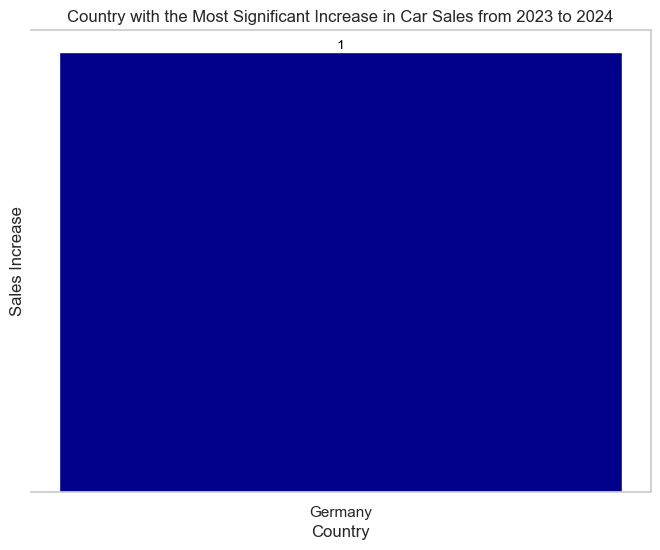

In [295]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(df['CountryName'], df['SalesIncrease'], color='darkblue')

# Add label to the bar
for index, row in df.iterrows():
    plt.text(row['CountryName'], row['SalesIncrease'], f'{row["SalesIncrease"]:,}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Country')
plt.ylabel('Sales Increase')
plt.title('Country with the Most Significant Increase in Car Sales from 2023 to 2024')

# Remove y-axis ticks and labels
plt.yticks([])
plt.gca().spines['left'].set_visible(False)  # Hide the left spine
plt.grid(False)  # Removing the grid lines as per your preference


save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Find the country that has the most significant increase in total car sales from 2023 to 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### Country with Highest avg sale price in 2024

In [296]:
# Execute the query
query66 = """
SELECT Countries.CountryName, ROUND(AVG(Car_Sales.SalePrice), 2) AS AverageSalePrice
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
WHERE YEAR(Car_Sales.SaleDate) = 2024
GROUP BY Countries.CountryName
ORDER BY AverageSalePrice DESC
LIMIT 1;
"""
cursor.execute(query66)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryName AverageSalePrice
0  South Korea       4300000.00

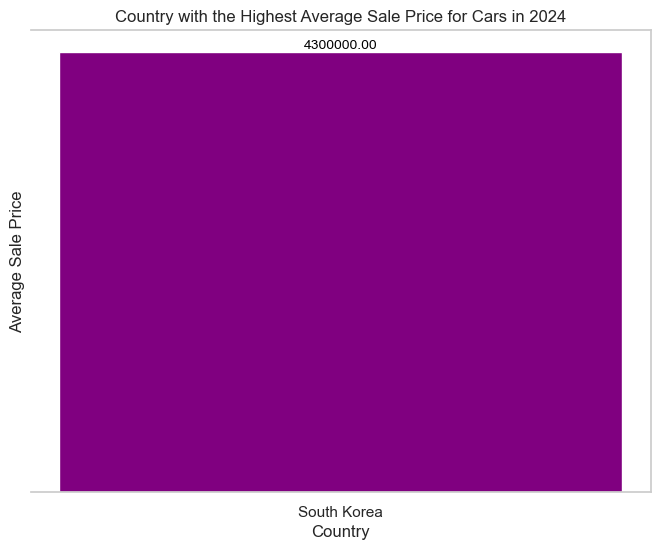

In [297]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(df['CountryName'], df['AverageSalePrice'], color='purple')

# Add label to the bar
for index, row in df.iterrows():
    plt.text(row['CountryName'], row['AverageSalePrice'], f'{row["AverageSalePrice"]:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Country')
plt.ylabel('Average Sale Price')
plt.title('Country with the Highest Average Sale Price for Cars in 2024')

# Remove y-axis ticks and labels
plt.yticks([])
plt.gca().spines['left'].set_visible(False)  # Hide the left spine

plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Country with Highest avg sale price in 2024.jpg')
# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### Top 5 Countries with Highest sales prrice in 2024

In [298]:
# Execute the query
query67 = """
SELECT Countries.CountryName, ROUND(AVG(Car_Sales.SalePrice), 2) AS AverageSalePrice
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
WHERE YEAR(Car_Sales.SaleDate) = 2024
GROUP BY Countries.CountryName
ORDER BY AverageSalePrice DESC
LIMIT 5;
"""
cursor.execute(query67)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryName AverageSalePrice
0  South Korea       4300000.00
1      Germany       2400000.00
2          USA       1700000.00
3        Japan        430000.00

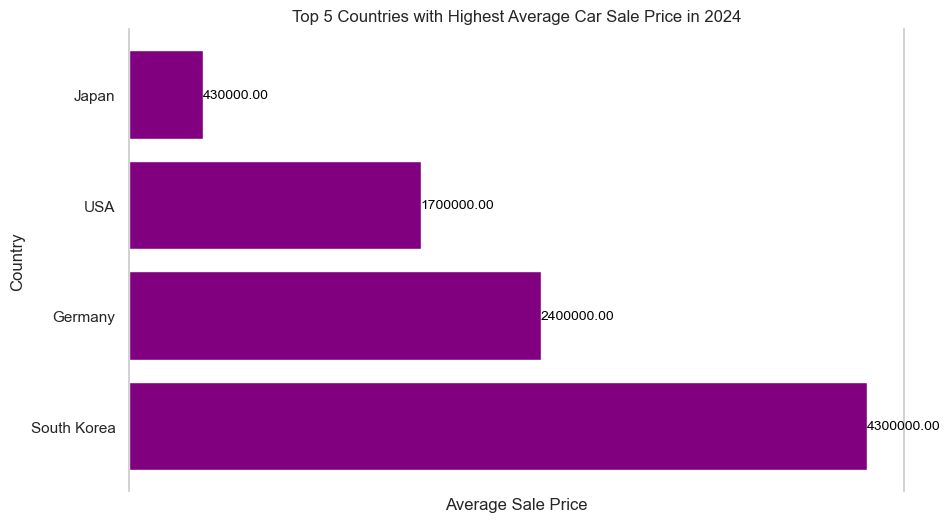

In [299]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.barh(df['CountryName'], df['AverageSalePrice'], color='purple')

# Add labels to the bars
for index, row in df.iterrows():
    plt.text(row['AverageSalePrice'], index, f'{row["AverageSalePrice"]:.2f}', 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Average Sale Price')
plt.ylabel('Country')
plt.title('Top 5 Countries with Highest Average Car Sale Price in 2024')

# Remove x-axis ticks and labels
plt.xticks([])
plt.gca().spines['top'].set_visible(False)  # Hide the top spine
plt.gca().spines['bottom'].set_visible(False)  # Hide the bottom spine

plt.grid(False)  # Removing the grid lines as per your preference

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Top 5 Countries with Highest sales prrice in 2024.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### Cocatinate the Car details

In [7]:

# Define the query
query68 = """
SELECT CONCAT(Manufacturers.Name, ' ', Models.ModelName, ' (', Countries.CountryName, ')') AS CarDetails, COUNT(*) AS Count
FROM Cars
INNER JOIN Manufacturers ON Cars.ManufacturerID = Manufacturers.ManufacturerID
INNER JOIN Models ON Cars.ModelID = Models.ModelID
INNER JOIN Car_Sales ON Cars.CarID = Car_Sales.CarID
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY CarDetails
ORDER BY Count DESC;
"""

# Execute the query and fetch the results
df = pd.read_sql_query(query68, connection)  # Replace 'connection' with your actual connection object
df

C:\Users\Gouthum\AppData\Local\Temp\ipykernel_19332\581557074.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query68, connection)  # Replace 'connection' with your actual connection object


CarDetails  Count
0            Audi Q5 (Germany)      3
1             BMW X5 (Germany)      1
2       Toyota Corolla (Japan)      1
3           Ford Mustang (USA)      1
4  Hyundai Verna (South Korea)      1

### SQL query to fetch bucket ranges, rounded counts, and their frequencies

In [23]:

# Define the SQL query
# Define the SQL query
query69 = """
SELECT ROUND(SalePrice, -4) AS bucket, 
       COUNT(*) AS count,
       RPAD('', COUNT(*), '*') AS bar 
FROM Car_Sales
GROUP BY bucket
ORDER BY bucket;
"""

# Execute the query
cursor.execute(query69)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

bucket  count bar
0   430000      1   *
1  1700000      1   *
2  1900000      1   *
3  2500000      2  **
4  2900000      1   *
5  4300000      1   *

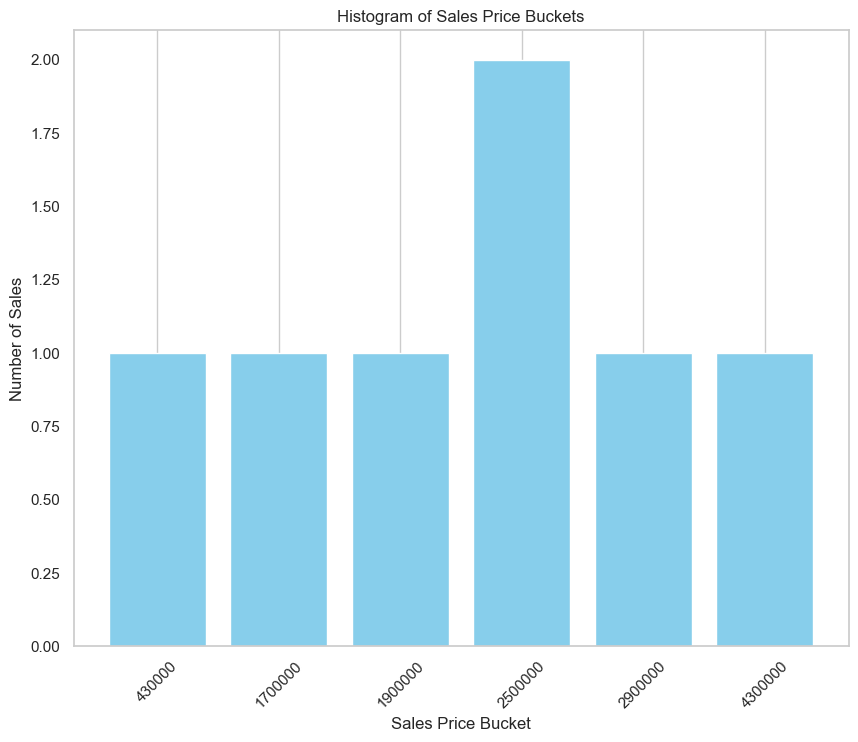

In [25]:
# Plotting
plt.figure(figsize=(10, 8))
plt.bar(df['bucket'].astype(str), df['count'], color='skyblue')
plt.xlabel('Sales Price Bucket')
plt.ylabel('Number of Sales')
plt.title('Histogram of Sales Price Buckets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Histogram Of Sale Price Buckets.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### 70) Distribution of Car Sales Across Price Ranges(Using Case)

In [26]:
# Assuming you have already connected to the database and have a cursor object
query70 = """
SELECT 
    CASE
        WHEN SalePrice < 10000 THEN 'Below 10K'
        WHEN SalePrice BETWEEN 10000 AND 50000 THEN '10K-50K'
        WHEN SalePrice BETWEEN 50001 AND 100000 THEN '50K-100K'
        WHEN SalePrice BETWEEN 100001 AND 200000 THEN '100K-200K'
        ELSE 'Above 200K'
    END AS price_range,
    COUNT(*) AS count
FROM Car_Sales
GROUP BY price_range
ORDER BY count DESC;
"""

# Execute the query
cursor.execute(query70)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

price_range  count
0  Above 200K      7

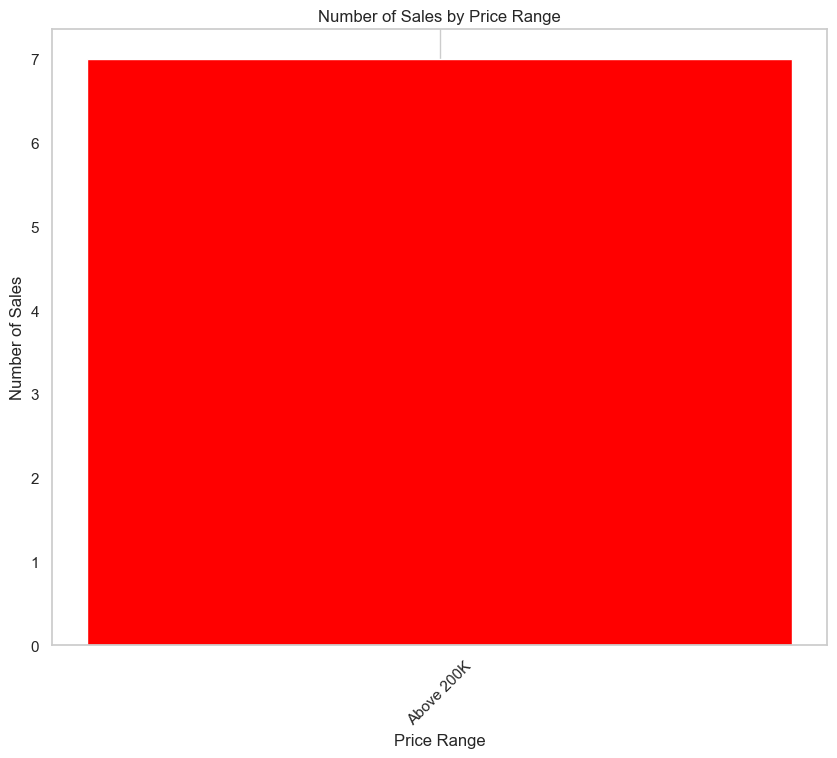

In [29]:
# Plotting
plt.figure(figsize=(10, 8))
plt.bar(df['price_range'], df['count'], color='Red')
plt.xlabel('Price Range')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Price Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Number of Sales by price range.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

# Show the plot
plt.show()

### "Car Sales Revenue by Country: Highlighting Sales Above $50,000"

In [30]:
query71 = """
SELECT Countries.CountryName, SUM(Car_Sales.SalePrice) AS TotalSales
FROM Car_Sales
INNER JOIN Countries ON Car_Sales.CountryID = Countries.CountryID
GROUP BY Countries.CountryName
HAVING SUM(Car_Sales.SalePrice) > 50000;
"""

# Execute the query
cursor.execute(query71)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryName  TotalSales
0      Germany  9800000.00
1        Japan   430000.00
2          USA  1700000.00
3  South Korea  4300000.00

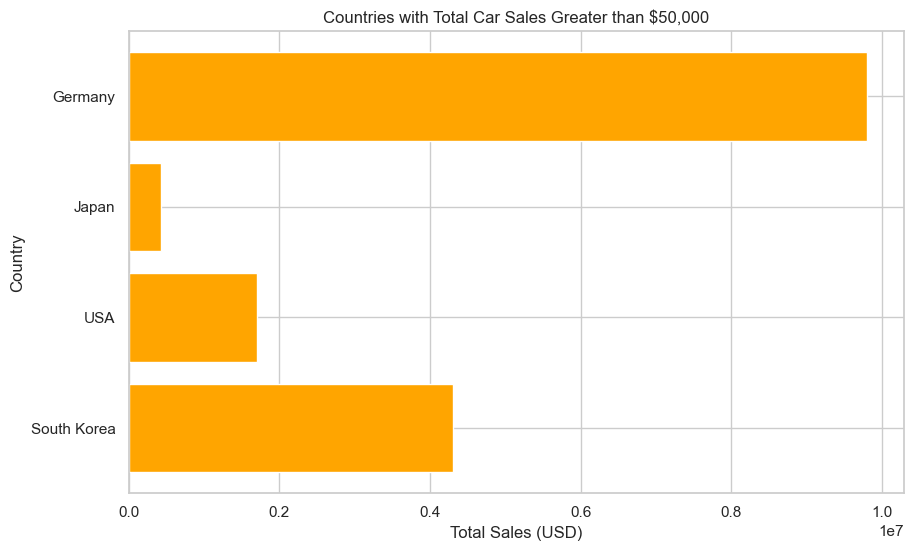

In [33]:
# Plot the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df['CountryName'], df['TotalSales'], color='Orange')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Country')
plt.title('Countries with Total Car Sales Greater than $50,000')
plt.gca().invert_yaxis()  # To have the highest sales on top

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Countries with total car sales.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### 72)Window Function (Total Sales Per Country)

In [34]:
# SQL query with window function
window_query = """
SELECT 
    CountryID,
    SalePrice,
    COUNT(*) OVER (PARTITION BY CountryID) AS TotalSalesPerCountry,
    SUM(SalePrice) OVER (PARTITION BY CountryID) AS TotalRevenuePerCountry,
    ROW_NUMBER() OVER (PARTITION BY CountryID ORDER BY SaleDate DESC) AS SaleRank
FROM 
    Car_Sales;
"""

# Execute the query
cursor.execute(window_query)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a DataFrame
columns = [col[0] for col in cursor.description]
df_window = pd.DataFrame(results, columns=columns)


In [35]:
df_window

CountryID   SalePrice  TotalSalesPerCountry TotalRevenuePerCountry  \
0         11  1900000.00                     1             1900000.00   
1         12  2500000.00                     3             7900000.00   
2         12  2500000.00                     3             7900000.00   
3         12  2900000.00                     3             7900000.00   
4         13   430000.00                     1              430000.00   
5         14  1700000.00                     1             1700000.00   
6         15  4300000.00                     1             4300000.00   

   SaleRank  
0         1  
1         1  
2         2  
3         3  
4         1  
5         1  
6         1

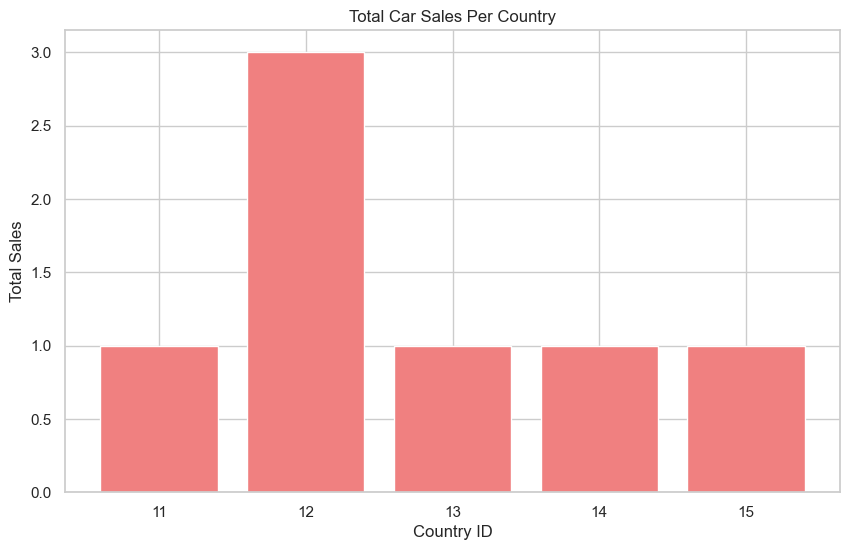

In [36]:
# Plot Total Sales Per Country using a bar chart
plt.figure(figsize=(10, 6))
df_sales = df_window.groupby('CountryID')['TotalSalesPerCountry'].mean().reset_index()

plt.bar(df_sales['CountryID'], df_sales['TotalSalesPerCountry'], color='lightcoral')
plt.xlabel('Country ID')
plt.ylabel('Total Sales')
plt.title('Total Car Sales Per Country')
plt.show()

### RANK FUNCTION

In [41]:
# Execute the SQL query to get the ranked data
query_rank = """
SELECT 
    CountryID, 
    SalePrice, 
    RANK() OVER(PARTITION BY CountryID ORDER BY SalePrice DESC)
FROM 
    Car_Sales;
"""

# Execute the query
cursor.execute(query_rank)

# Fetch the results and create a DataFrame
results = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryID   SalePrice  \
0         11  1900000.00   
1         12  2900000.00   
2         12  2500000.00   
3         12  2500000.00   
4         13   430000.00   
5         14  1700000.00   
6         15  4300000.00   

   RANK() OVER(PARTITION BY CountryID ORDER BY SalePrice DESC)  
0                                                  1            
1                                                  1            
2                                                  2            
3                                                  2            
4                                                  1            
5                                                  1            
6                                                  1

### DENSE RANK

In [46]:
# SQL query to fetch dense rank data
query_dense_rank = """
SELECT 
    CountryID, 
    SalePrice, 
    DENSE_RANK() OVER(PARTITION BY CountryID ORDER BY SalePrice DESC) AS DenseRank
FROM 
    Car_Sales;
"""

# Execute the query
cursor.execute(query_dense_rank)

# Fetch the results and create a DataFrame
results = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryID   SalePrice  DenseRank
0         11  1900000.00          1
1         12  2900000.00          1
2         12  2500000.00          2
3         12  2500000.00          2
4         13   430000.00          1
5         14  1700000.00          1
6         15  4300000.00          1

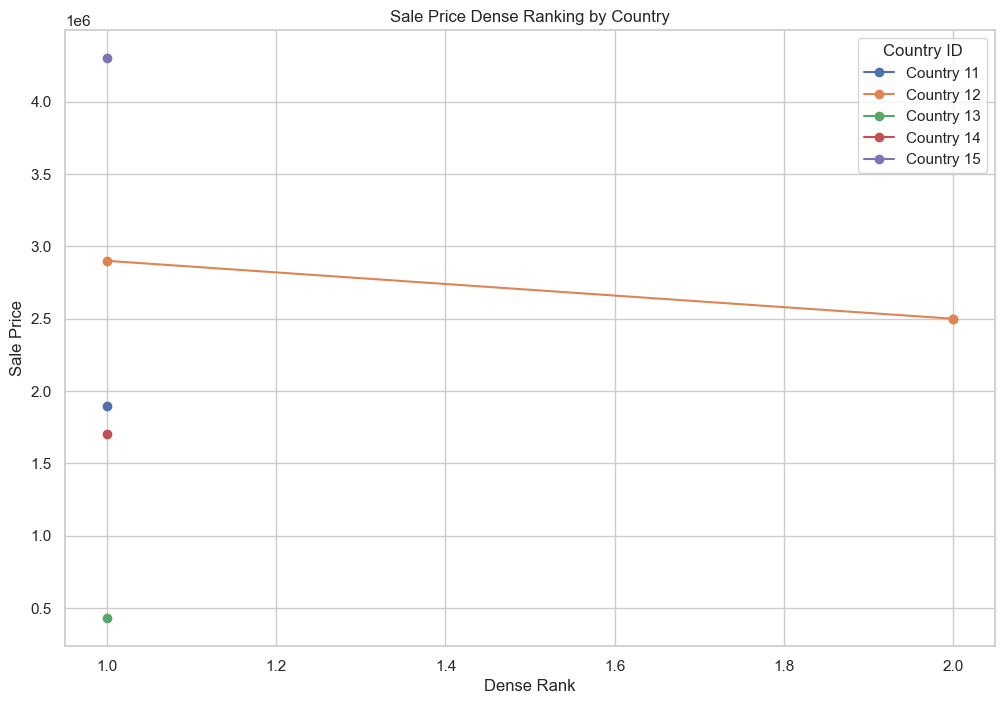

In [48]:
# Plotting the Dense Rank graph
plt.figure(figsize=(12, 8))
for country in df['CountryID'].unique():
    country_data = df[df['CountryID'] == country]
    plt.plot(country_data['DenseRank'], country_data['SalePrice'], marker='o', label=f'Country {country}')

# Adding labels and title
plt.xlabel('Dense Rank')
plt.ylabel('Sale Price')
plt.title('Sale Price Dense Ranking by Country')
plt.legend(title='Country ID')
plt.grid(True)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Sale Price Dense Ranking by country.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### Moving Average

In [49]:
# SQL query to calculate moving average for the last 5 rows
query_moving_avg = """
SELECT 
    SaleDate, 
    SalePrice, 
    AVG(SalePrice) OVER (ORDER BY SaleDate ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) AS MovingAverage
FROM 
    Car_Sales;
"""

# Execute the query
cursor.execute(query_moving_avg)

# Fetch the results and create a DataFrame
results = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Convert SaleDate to datetime for better plotting
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
df

SaleDate   SalePrice   MovingAverage
0 2024-01-15  1900000.00  1900000.000000
1 2024-01-25  1700000.00  1800000.000000
2 2024-02-15  4300000.00  2633333.333333
3 2024-02-20  2900000.00  2700000.000000
4 2024-03-10   430000.00  2246000.000000
5 2024-08-30  2500000.00  2288333.333333
6 2024-08-30  2500000.00  2388333.333333

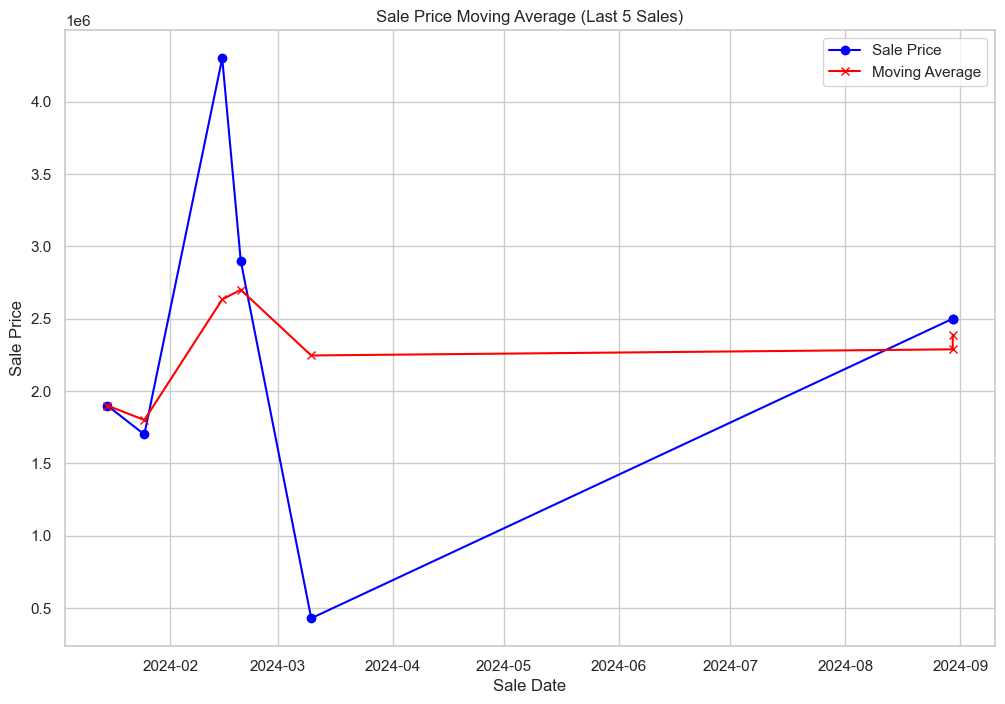

In [51]:
# Plotting the SalePrice and Moving Average
plt.figure(figsize=(12, 8))

# Plot the actual sale prices
plt.plot(df['SaleDate'], df['SalePrice'], marker='o', label='Sale Price', color='blue')

# Plot the moving average
plt.plot(df['SaleDate'], df['MovingAverage'], marker='x', label='Moving Average', color='red')

# Adding labels and title
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.title('Sale Price Moving Average (Last 5 Sales)')
plt.legend()
plt.grid(True)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Sales Price Moving Averages Last 5 sales.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')


plt.show()

### RegExp

In [57]:
queryreg = """
SELECT 
    SaleID, 
    REGEXP_REPLACE(SaleID, '[^0-9]', '') AS NumericPart 
FROM 
    Car_Sales;
"""

# Execute the query
cursor.execute(queryreg)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a pandas DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

SaleID NumericPart
0     221         221
1     226         226
2     227         227
3     222         222
4     223         223
5     224         224
6     225         225

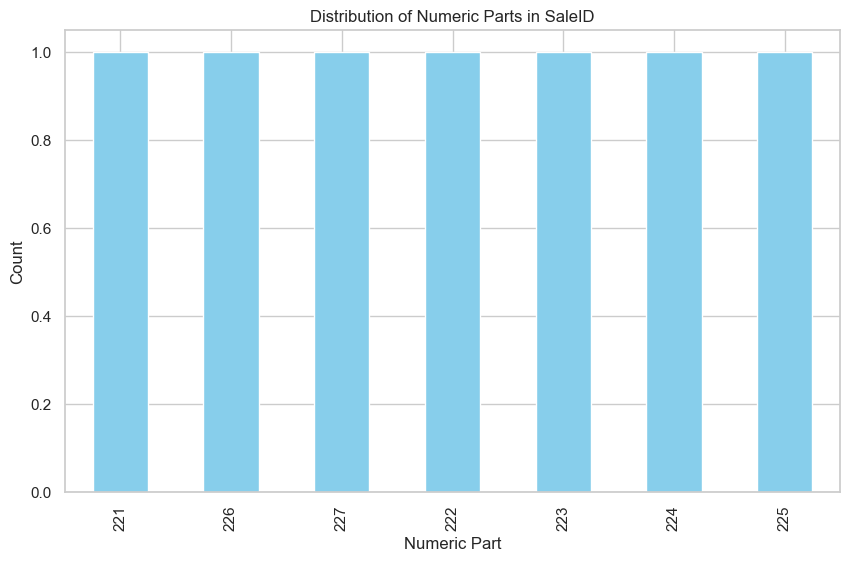

In [58]:
# Plotting (if needed, e.g., count of numeric parts)
import matplotlib.pyplot as plt

# Example plot: counting occurrences of numeric parts
plt.figure(figsize=(10, 6))
df['NumericPart'] = df['NumericPart'].astype(str)  # Ensure NumericPart is treated as string
df['NumericPart'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Numeric Part')
plt.ylabel('Count')
plt.title('Distribution of Numeric Parts in SaleID')
plt.grid(True)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'RegularExpression.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

In [59]:
queryrl = """
SELECT 
    SaleID, 
    LEFT(RIGHT(REGEXP_REPLACE(SaleID, '[^0-9]', ''), 10), 3) AS ExtractedCode 
FROM 
    Car_Sales;
"""

# Execute the query
cursor.execute(queryrl)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a pandas DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

SaleID ExtractedCode
0     221           221
1     226           226
2     227           227
3     222           222
4     223           223
5     224           224
6     225           225

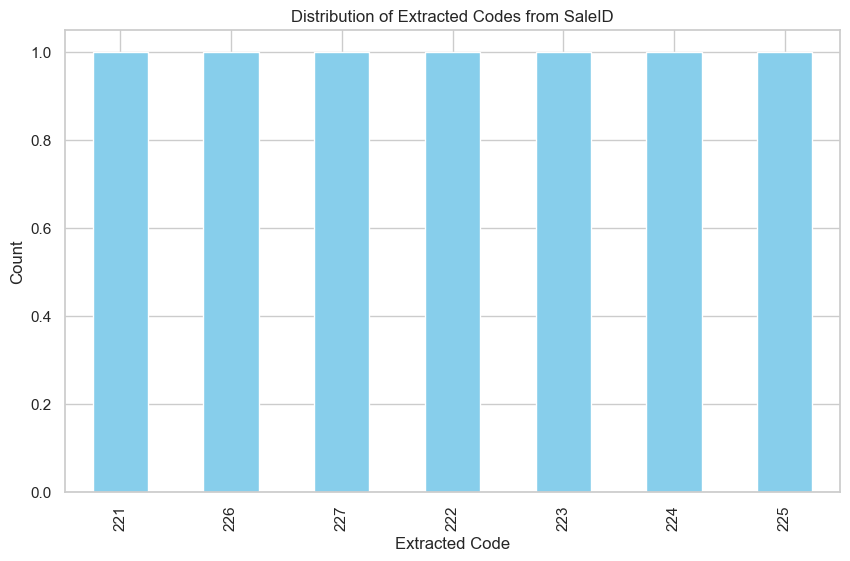

In [60]:
# Plotting the results
import matplotlib.pyplot as plt

# Example plot: Distribution of extracted codes
plt.figure(figsize=(10, 6))
df['ExtractedCode'] = df['ExtractedCode'].astype(str)  # Ensure ExtractedCode is treated as string
df['ExtractedCode'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Extracted Code')
plt.ylabel('Count')
plt.title('Distribution of Extracted Codes from SaleID')
plt.grid(True)


save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'RegularExpressionRL.jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')
plt.show()

### Sub Queries

In [61]:

Squery = """
SELECT CountryID
FROM Car_Sales
GROUP BY CountryID
HAVING AVG(SalePrice) > 100000;
"""

# Execute the query
cursor.execute(Squery)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a pandas DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)
df

CountryID
0         11
1         12
2         13
3         14
4         15

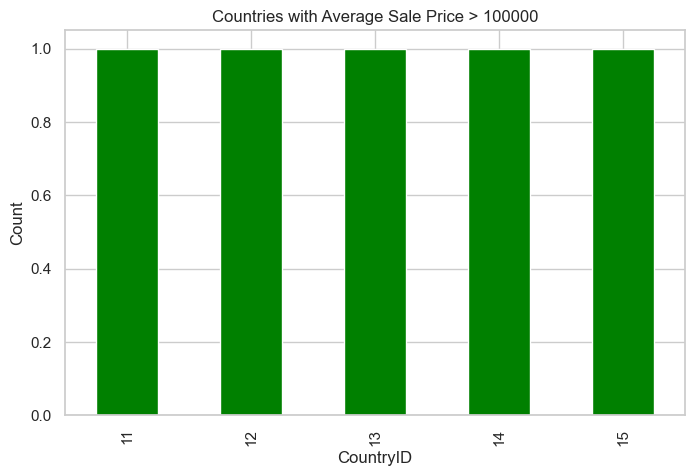

In [63]:
# Example plot: Number of countries with avg SalePrice > 100000
plt.figure(figsize=(8, 5))
df['CountryID'].value_counts().plot(kind='bar', color='green')
plt.xlabel('CountryID')
plt.ylabel('Count')
plt.title('Countries with Average Sale Price > 100000')
plt.grid(True)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'avg sale .jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

In [64]:
# SQL query with subquery and HAVING clause
Subquery = """
SELECT * 
FROM Car_Sales
WHERE CountryID IN 
(SELECT CountryID 
 FROM Car_Sales
 GROUP BY CountryID
 HAVING AVG(SalePrice) > 100000);
"""

# Execute the query
cursor.execute(Subquery)

# Fetch the results
results = cursor.fetchall()

# Convert the results to a pandas DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
df

SaleID  CarID    SaleDate   SalePrice  CountryID
0     221      1  2024-01-15  1900000.00         11
1     222      2  2024-02-20  2900000.00         12
2     223      3  2024-03-10   430000.00         13
3     224      4  2024-01-25  1700000.00         14
4     225      5  2024-02-15  4300000.00         15
5     226      1  2024-08-30  2500000.00         12
6     227      1  2024-08-30  2500000.00         12

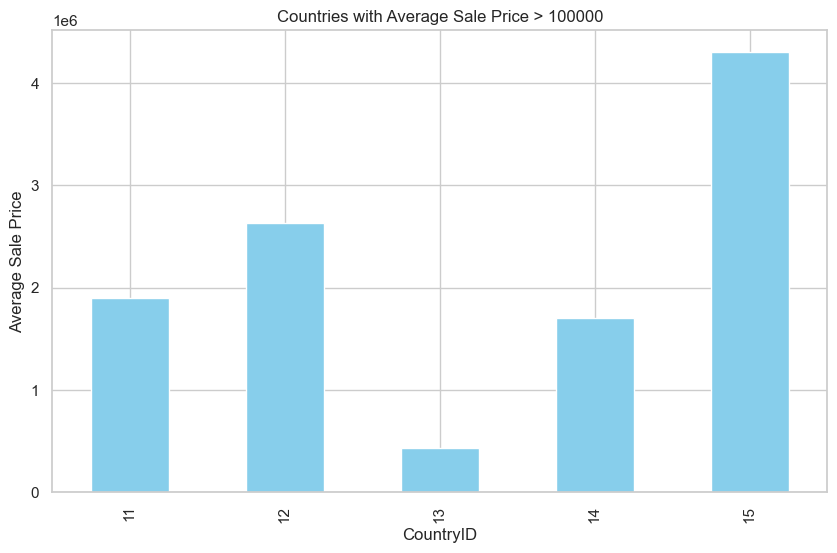

In [66]:
# Plotting the results
import matplotlib.pyplot as plt

# Example plot: Sale prices for countries with avg SalePrice > 100000
plt.figure(figsize=(10, 6))
df.groupby('CountryID')['SalePrice'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('CountryID')
plt.ylabel('Average Sale Price')
plt.title('Countries with Average Sale Price > 100000')
plt.grid(True)

save_directory = r'C:\Users\Gouthum\Downloads\SQL(Projects)\Images'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)  # Create the directory if it does not exist

# Full path for the image file
image_path = os.path.join(save_directory, 'Countries with AVg sale price(Sub query).jpg')

# Save the plot as an image file
plt.savefig(image_path, format='jpg')

plt.show()

### View Query

In [68]:
# SQL query to create the view
create_view_query = """
CREATE VIEW high_priced_cars_by_countsry AS
SELECT CountryID 
FROM Car_Sales
GROUP BY CountryID
HAVING AVG(SalePrice) > 3000000;
"""

# Execute the query to create the view
cursor.execute(create_view_query)
connection.commit()

print("View 'high_priced_cars_by_country' created successfully.")

View 'high_priced_cars_by_country' created successfully.


In [69]:
# SQL query to view the data in the view
view_query = "SELECT * FROM high_priced_cars_by_country;"

# Execute the query
cursor.execute(view_query)

# Fetch the results
view_results = cursor.fetchall()

# Convert the results to a DataFrame for better readability
import pandas as pd
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(view_results, columns=columns)

# Display the DataFrame
df

CountryID
0         15

### Stored Procedure

In [73]:
# SQL query to get all routines from information_schema
routines_query = "SELECT * FROM information_schema.routines;"

# Execute the query
cursor.execute(routines_query)

# Fetch the results
routines_results = cursor.fetchall()

# Convert the results into a DataFrame
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(routines_results, columns=columns)

# Display the DataFrame
df

SPECIFIC_NAME ROUTINE_CATALOG    ROUTINE_SCHEMA  \
0         extract_schema_from_file_name             def               sys   
1          extract_table_from_file_name             def               sys   
2                          format_bytes             def               sys   
3                           format_path             def               sys   
4                      format_statement             def               sys   
5                           format_time             def               sys   
6                              list_add             def               sys   
7                             list_drop             def               sys   
8                 ps_is_account_enabled             def               sys   
9                ps_is_consumer_enabled             def               sys   
10     ps_is_instrument_default_enabled             def               sys   
11       ps_is_instrument_default_timed             def               sys   
12            ps_is_thread_instrumented             def               sys   
13                         ps_thread_id             def               sys   
14                    ps_thread_account             def               sys   
15                      ps_thread_stack             def               sys   
16                   ps_thread_trx_info             def               sys   
17                     quote_identifier             def               sys   
18                       sys_get_config             def               sys   
19                        version_major             def               sys   
20                        version_minor             def               sys   
21                        version_patch             def               sys   
22                    create_synonym_db             def               sys   
23                execute_prepared_stmt             def               sys   
24                          diagnostics             def               sys   
25   ps_statement_avg_latency_histogram             def               sys   
26            ps_trace_statement_digest             def               sys   
27                      ps_trace_thread             def               sys   
28  ps_setup_disable_background_threads             def               sys   
29            ps_setup_disable_consumer             def               sys   
30          ps_setup_disable_instrument             def               sys   
31              ps_setup_disable_thread             def               sys   
32   ps_setup_enable_background_threads             def               sys   
33             ps_setup_enable_consumer             def               sys   
34           ps_setup_enable_instrument             def               sys   
35               ps_setup_enable_thread             def               sys   
36                ps_setup_reload_saved             def               sys   
37            ps_setup_reset_to_default             def               sys   
38                        ps_setup_save             def               sys   
39               ps_setup_show_disabled             def               sys   
40     ps_setup_show_disabled_consumers             def               sys   
41   ps_setup_show_disabled_instruments             def               sys   
42                ps_setup_show_enabled             def               sys   
43      ps_setup_show_enabled_consumers             def               sys   
44    ps_setup_show_enabled_instruments             def               sys   
45               ps_truncate_all_tables             def               sys   
46       statement_performance_analyzer             def               sys   
47                         table_exists             def               sys   
48                       rewards_report             def            sakila   
49                 get_customer_balance             def            sakila   
50                        film_in_stock             def            sakila   
51                    

# Conclusion:
This SQL-based car sales database project provided a structured approach to managing and analyzing data related to car manufacturers, models, and sales. Through the use of various SQL queries and techniques, valuable business insights were drawn from the dataset. The project showcased how databases can be effectively used to store large amounts of structured data and how querying this data can assist in decision-making processes for businesses.